In [88]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KernelDensity
#from sklearn.impute import KNNImputer
import pandas as pd
import seaborn as sns
import numpy as np

In [89]:
df = pd.read_csv (r'C:\Users\tomeral\Desktop\PENSION_CHURN_DP_FINAL_TABLE_03052021.csv')
#df.describe()

In [90]:
df = df.drop(columns=['PN8746_IND','PN8749_IND','VALIDITY_DATE','PN8746_EMPLR_INR_ID','GM54693_IND',
                'PN_XFER_DATA_PUB_DB_PERM_IND','IDENTIFICATION_DOC_NUMBER','ID_DOC_TYPE'])

In [4]:
objects = df.select_dtypes(np.object)

In [5]:
numeric = df.select_dtypes(np.number)

In [6]:
for col in objects.columns:
    print(col)

PN8746_POLICYHOLDER_STATUS_NAM
LF_LAST_REQ_CNT
PN8746_INDUSTRY_NAME
WEST_COUNTRIES_IMMIGRANT_SCALE
RUSSIAN_IMMIGRANTS_RATE
ARAB_COUNTRIES_IMMIGRANT_SCALE
ORTHODOX_SCALE
RELIGIOUS_SCALE
ETHIOPIAN_IMMIGRANTS_SCALE
DOMINANT_POP_SECTOR_DESC
OCCUPATION_TYPE
RESIDENCE_AREA
POLICYHOLDER_STATUS_ID_MMI
MGT_FEES_PREM_GRP
MGT_FEES_SVG_GRP
MGT_FEES_AGREEMENT_TYPE
EMPLR_REPORT_STATUS
EMPLR_REPORT_STATUS_9MONTHS
EMPLR_REPORT_STATUS_6MONTHS
EMPLR_REPORT_STATUS_4MONTHS
OPERATING_SYSTEM
MOBILE_TYPE
DEVICE_TYPE
BROWSER_TYPE
MONTHS_GAP_LAST_SALARY_PN8749
MONTHS_GAP_LAST_SALARY_GM109
MONTHS_GAP_LAST_SALARY_GM182
MONTHS_GAP_LAST_WITHDR_PN8746
GN_CALC_LAST_REQ_STATUS_LABEL
GN_CALC_LAST_REQ_STT_RSN_LABEL
GN_CALC_LAST_REQ_SUBJ_NAME
GN_CALC_LST_REQ_SUBJ_SUB_NAME
GN_CLC_LAST_REQ_REQR_NAT_LABEL
GN_CALC_LST_REQ_COMM_MED_LABEL
PG_CALC_LAST_REQ_SUBJ_NAME
PG_CLC_LAST_REQ_REQR_NAT_LABEL
PG_CALC_P_LAST_REQ_SUBJ_NAME
PG_CALC_PLAST_REQ_REQR_NAT_ID
PG_CLC_PLAST_REQ_STT_RSN_LABEL
PG_CLC_PLAST_REQ_COM_MED_LABEL
LF_CALC_LAS

In [7]:
df['LF_CALC_LAST_REQ_SUBJ_NAME'].value_counts(normalize=True,dropna=False) * 100

לא ידוע         81.612121
ביטול פוליסה     7.378788
מידע             4.369697
אחר              3.903030
חוזר צירוף       2.736364
Name: LF_CALC_LAST_REQ_SUBJ_NAME, dtype: float64

In [8]:
############################  REPLACING LOW FERQUENCY VALUES ########################

In [9]:
df['MONTHS_GAP_LAST_WITHDR_PN8746'].value_counts(normalize=True,dropna=False) * 100

.         73.678788
>18       19.687879
יול-18     3.978788
0-6        2.654545
Name: MONTHS_GAP_LAST_WITHDR_PN8746, dtype: float64

In [10]:
df['RUSSIAN_IMMIGRANTS_RATE'] = df['RUSSIAN_IMMIGRANTS_RATE'].replace(['גבוה מאוד'],['גבוה'])

In [11]:
df['ARAB_COUNTRIES_IMMIGRANT_SCALE'] = df['ARAB_COUNTRIES_IMMIGRANT_SCALE'].replace(['בינוני','גבוה מאוד'],['חלש','גבוה'])

In [12]:
df['ETHIOPIAN_IMMIGRANTS_SCALE'] = df['ETHIOPIAN_IMMIGRANTS_SCALE'].replace(['גבוה מאוד','בינוני'],['גבוה','גבוה'])

In [13]:
df['POLICYHOLDER_STATUS_ID_MMI'] = df['POLICYHOLDER_STATUS_ID_MMI'].astype(str).replace(['-1'],['-2'])

In [14]:
df['MGT_FEES_PREM_GRP'] = df['MGT_FEES_PREM_GRP'].replace(['0'],['0.01-1'])

In [15]:
df['EMPLR_REPORT_STATUS_9MONTHS'] = df['EMPLR_REPORT_STATUS_9MONTHS'].replace(['היעדר שכר'],['אחר'])

In [16]:
df['EMPLR_REPORT_STATUS_6MONTHS'] = df['EMPLR_REPORT_STATUS_6MONTHS'].replace(['היעדר שכר'],['אחר'])

In [17]:
df['EMPLR_REPORT_STATUS_4MONTHS'] = df['EMPLR_REPORT_STATUS_4MONTHS'].replace(['היעדר שכר','חופשה ללא תשלום'],['אחר','אחר'])

In [18]:
df['MOBILE_TYPE'] = df['MOBILE_TYPE'].replace(dict.fromkeys(['Samsung','XiaoMi','LG'],'Other'),regex=True)

In [19]:
df['BROWSER_TYPE'] = df['BROWSER_TYPE'].replace(['Firefox'],['Other'])

In [20]:
################ ASK
#df['GN_CALC_LAST_REQ'] = ['סגור' if x == 'סגור' else 'אחר' for x in df['GN_CALC_LAST_REQ_STATUS_LABEL']]
#df['GN_CALC_LAST_REQ'].value_counts(normalize=True,dropna=False) * 100

In [21]:
#df['GN_CALC_LAST_REQ'] = [if "סגור" not in x:
#                          'אחר' for x in df['GN_CALC_LAST_REQ_STATUS_LABEL']]

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['PN8746_INDUSTRY_NUM'] = label_encoder.fit_transform(df['PN8746_INDUSTRY_NAME'])

In [23]:
industry=df['PN8746_INDUSTRY_NUM'].value_counts(normalize=True,dropna=False) * 100
with pd.option_context('display.max_rows', None):
    print(industry)

32    26.645455
18    12.463636
0     10.909091
63     7.624242
59     6.563636
62     3.475758
46     2.651515
48     2.621212
35     1.890909
68     1.809091
47     1.727273
65     1.675758
74     1.545455
77     1.469697
25     1.233333
21     1.124242
2      1.012121
38     0.975758
41     0.927273
1      0.796970
58     0.796970
43     0.772727
8      0.712121
37     0.630303
30     0.563636
60     0.533333
33     0.500000
34     0.406061
57     0.354545
7      0.318182
3      0.312121
14     0.312121
24     0.296970
19     0.260606
5      0.254545
69     0.251515
23     0.248485
13     0.239394
36     0.236364
54     0.209091
20     0.206061
44     0.196970
49     0.187879
76     0.187879
67     0.160606
71     0.142424
4      0.139394
51     0.124242
42     0.121212
29     0.112121
11     0.112121
55     0.106061
27     0.106061
22     0.075758
70     0.072727
16     0.066667
10     0.066667
72     0.051515
26     0.048485
31     0.048485
45     0.036364
53     0.036364
39     0

In [24]:
df['PN8746_INDUSTRY_NUM']=df['PN8746_INDUSTRY_NUM'].replace(dict.fromkeys(
    [52,9,38,41,1,58,43,8,37,30,60,33,34,57,7,3,14,24,19,5,69,23,13,36,
    54,20,44,49,76,67,71,4,51,42,29,11,55,27,22,70,16,10,72,26,
    31,45,53,39,28,66,61,6,40,75,529,73,56,15,50,17,64,12],[-1]))
df['PN8746_INDUSTRY_NUM'].value_counts(normalize=True,dropna=False) * 100

 32    26.645455
-1     13.557576
 18    12.463636
 0     10.909091
 63     7.624242
 59     6.563636
 62     3.475758
 46     2.651515
 48     2.621212
 35     1.890909
 68     1.809091
 47     1.727273
 65     1.675758
 74     1.545455
 77     1.469697
 25     1.233333
 21     1.124242
 2      1.012121
Name: PN8746_INDUSTRY_NUM, dtype: float64

In [25]:
#######################   CATEGORIAL FEATURES ENCODER   ########################
cat_features=[x for x in df.columns if df[x].dtype=="object"]
label_encoder = LabelEncoder()
for col in cat_features:
    if col in df.columns:
        i = df.columns.get_loc(col)
        df.iloc[:,i] = df.apply(lambda i:label_encoder.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [26]:
df

PN8746_POLICYHOLDER_STATUS_NAM  TARGET  AGENT_REPLACED_IND  \
0                                   1       0                   0   
1                                   1       0                   0   
2                                   0       1                   0   
3                                   0       0                   0   
4                                   1       0                   0   
...                               ...     ...                 ...   
32995                               1       0                   0   
32996                               0       0                   0   
32997                               0       0                   0   
32998                               1       0                   0   
32999                               1       0                   0   

       SEGMENTATION_MODEL_SCORE  COUNT_opp  COUNT_of_meetings  \
0                           NaN        NaN                NaN   
1                           4.0        NaN                NaN   
2                           NaN        NaN                2.0   
3                           NaN        NaN                NaN   
4                           NaN        NaN                NaN   
...                         ...        ...                ...   
32995                       NaN        NaN                NaN   
32996                       NaN        NaN                NaN   
32997                       NaN        NaN                NaN   
32998                       NaN        NaN                NaN   
32999                       NaN        NaN                NaN   

       COUNT_meeting_sales  GM109_IND  GM182_IND  GM51237_IND  ...  \
0                      NaN          0          1            0  ...   
1                      NaN          0          0            0  ...   
2                      NaN          0          0            0  ...   
3                      NaN          0          0            0  ...   
4                      NaN          0          0            0  ...   
...                    ...        ...        ...          ...  ...   
32995                  NaN          0          1            0  ...   
32996                  NaN          0          0            0  ...   
32997                  NaN          0          0            0  ...   
32998                  NaN          0          1            0  ...   
32999                  NaN          0          0            0  ...   

       PG_CALC_P_LAST_REQ_SUBJ_NAME  PG_CALC_PLAST_REQ_REQR_NAT_ID  \
0                                 6                              1   
1                                 1                              3   
2                                 6                              1   
3                                 8                              3   
4                                 6                              1   
...                             ...                            ...   
32995                             6                              1   
32996                             6                              1   
32997                             6                              1   
32998                             6                              1   
32999                             6                              1   

       PG_CLC_PLAST_REQ_STT_RSN_LABEL  PG_CLC_PLAST_REQ_COM_MED_LABEL  \
0                                   2                               0   
1                                   1                               0   
2                                   2                               0   
3                                   1                               0   
4                                   2                               0   
...                               ...                             ...   
32995                               2                               0   
32996                               2                               0   
32997                               2                     

In [27]:
##################  ONE HOT ENCODING  ###################

In [28]:
#N=df
#N=pd.get_dummies(N,columns=['SOCIO_ECONOMIC_RATE_POINTS'])

In [29]:
df['LF_CLC_LAST_REQ_REQR_NAT_LABEL'].value_counts(normalize=True,dropna=False) * 100

1    81.612121
2    12.884848
0     5.503030
Name: LF_CLC_LAST_REQ_REQR_NAT_LABEL, dtype: float64

In [30]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 89 columns):
TARGET                              33000 non-null int64
AGENT_REPLACED_IND                  33000 non-null int64
SEGMENTATION_MODEL_SCORE            20142 non-null float64
COUNT_opp                           9639 non-null float64
COUNT_of_meetings                   14927 non-null float64
COUNT_meeting_sales                 5334 non-null float64
GM109_IND                           33000 non-null int64
GM182_IND                           33000 non-null int64
GM51237_IND                         33000 non-null int64
Count4Prod                          33000 non-null int64
PN8746_AGENT_IND                    33000 non-null int64
GENDER_ID                           33000 non-null int64
SITE_ENTRY_3MONTHS_IND              33000 non-null int64
SMOKE_IND                           33000 non-null int64
MARITAL_STATUS                      33000 non-null int64
TEL_MOBILE_IND                

In [31]:
df['NET_MGT_FEES_SVG_RATE'].value_counts(normalize=True,dropna=False) * 100

 NaN         26.609091
-1.609438    14.903030
-1.386294    13.539394
-0.693147    11.051515
-1.660731     6.090909
               ...    
-0.843970     0.003030
-1.537117     0.003030
-0.999672     0.003030
-1.237874     0.003030
-0.994252     0.003030
Name: NET_MGT_FEES_SVG_RATE, Length: 66, dtype: float64

In [32]:
df['SEGMENTATION_MODEL_SCORE'] = df['SEGMENTATION_MODEL_SCORE'].replace([1],[2])

In [33]:
df['COUNT_opp'] = df['COUNT_opp'].replace(dict.fromkeys([7,6,5,4],3))

In [34]:
df['COUNT_of_meetings'] = df['COUNT_of_meetings'].replace(dict.fromkeys([7,6,8,9,10,11,12,13,14,15],5))

In [35]:
df['COUNT_meeting_sales'] = df['COUNT_meeting_sales'].replace(dict.fromkeys([7,6,5,4,3],2))

In [36]:
df['Count4Prod'] = df['Count4Prod'].replace([4],[3])

In [37]:
df['GENDER_ID'] = df['GENDER_ID'].replace([-2],[np.nan])

In [38]:
df['SMOKE_IND'] = df['SMOKE_IND'].replace([-2],[np.nan])

In [39]:
df['Count4Prod'] = df['Count4Prod'].replace([1],[3])

In [40]:
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].replace([1],[3])

In [41]:
df['SOCIO_ECONOMIC_RATE_POINTS'] = df['SOCIO_ECONOMIC_RATE_POINTS'].replace([0,1],[np.nan,2])

In [42]:
df['COUNT_OF_MISLAKOT_LAST_YEAR'] = df['COUNT_OF_MISLAKOT_LAST_YEAR'].replace(dict.fromkeys([7,6,8,9,10,11,4,5],3))

In [43]:
df['EFFECTIVE_TALK_COUNT'] = df['EFFECTIVE_TALK_COUNT'].replace(dict.fromkeys([7,6,8,5],4))

In [44]:
df['PAST_SALES_IND'] = df['PAST_SALES_IND'].replace([np.nan],[0])

In [45]:
df['MISLAKA_LOB_ID'] = df['MISLAKA_LOB_ID'].replace([5],[6])

In [46]:
df['COUNT_OF_MISLAKOT_LAST_YEAR_INS'] = df['COUNT_OF_MISLAKOT_LAST_YEAR_INS'].replace(dict.fromkeys([7,6,8,5,4,9,10,11],3))

In [47]:
df['NIUD_HSHTLMT_5YR_IND'] = df['NIUD_HSHTLMT_5YR_IND'].replace([np.nan],[0])

In [48]:
df['NIUD_HSHTLMT_1YR_IND'] = df['NIUD_HSHTLMT_1YR_IND'].replace([np.nan],[0])

In [49]:
df['NIUD_GML_5YR_IND'] = df['NIUD_GML_5YR_IND'].replace([np.nan],[0])

In [50]:
df['DGTL_PN_RDMPTN_END_9M_IND'] = df['DGTL_PN_RDMPTN_END_9M_IND'].replace([np.nan],[0])

In [51]:
df['DGTL_PN_RDMPTN_STRT_6M_IND'] = df['DGTL_PN_RDMPTN_STRT_6M_IND'].replace([np.nan],[0])

In [52]:
df['DGTL_PN_RDMPTN_STRT_1YR_IND'] = df['DGTL_PN_RDMPTN_STRT_1YR_IND'].replace([np.nan],[0])

In [53]:
df['DGTL_CAR_OFFER_1YR_IND'] = df['DGTL_CAR_OFFER_1YR_IND'].replace([np.nan],[0])

In [54]:
df['DGTL_GML_RDMPTN_4M_IND'] = df['DGTL_GML_RDMPTN_4M_IND'].replace([np.nan],[0])

In [55]:
####################   LOG TRANSFORMATION   #####################

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


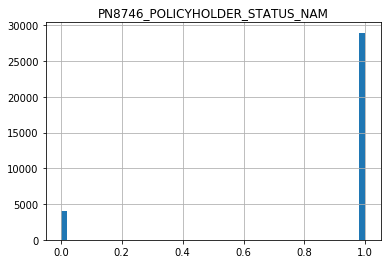

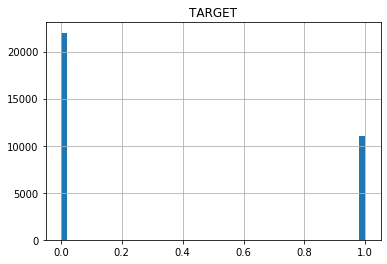

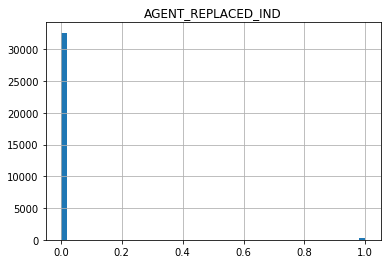

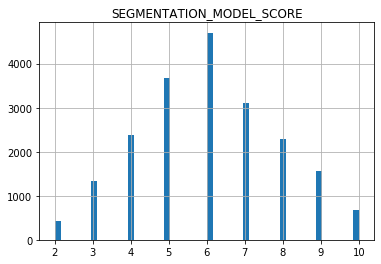

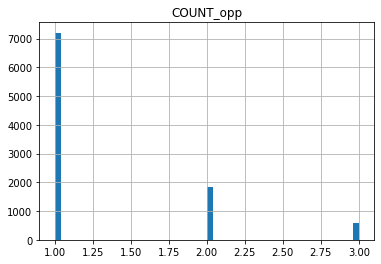

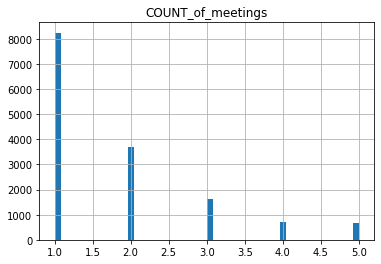

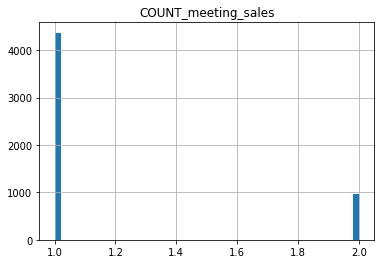

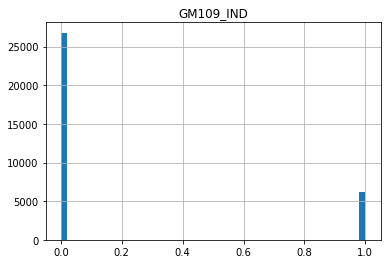

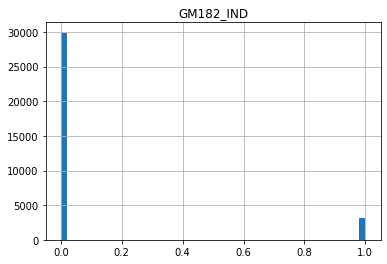

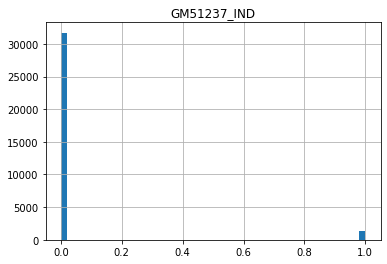

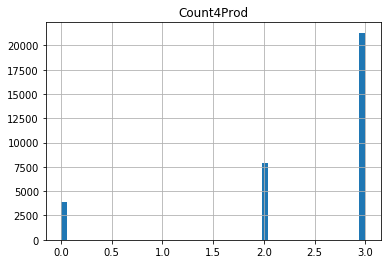

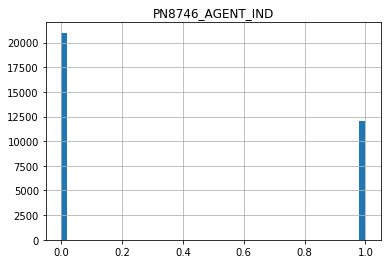

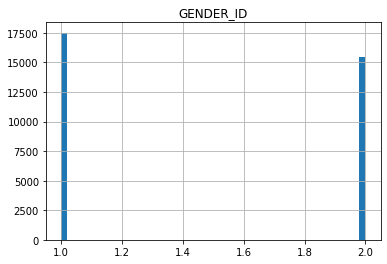

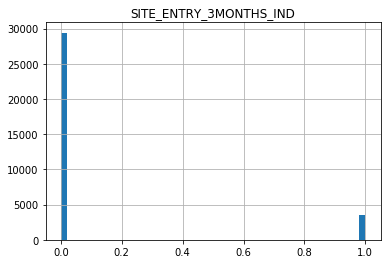

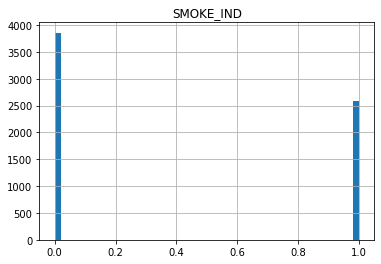

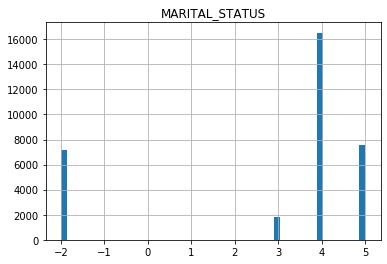

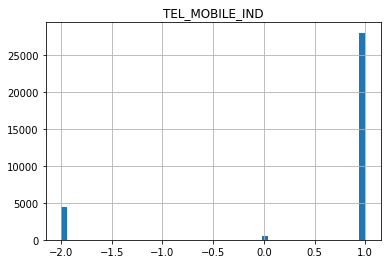

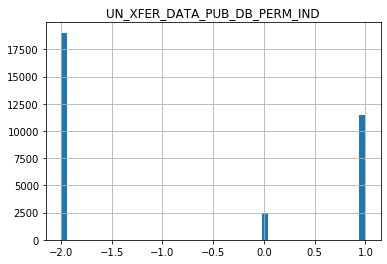

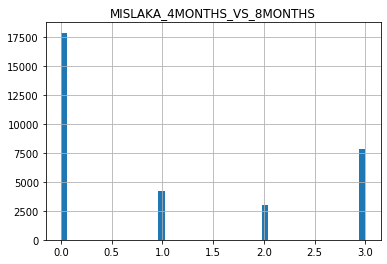

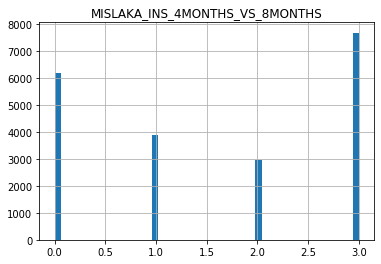

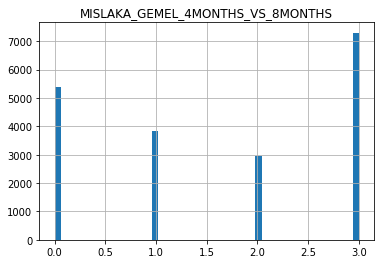

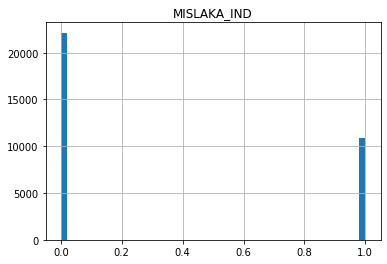

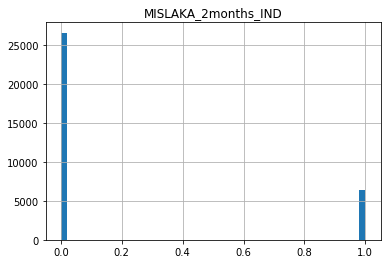

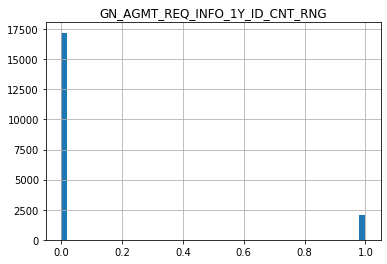

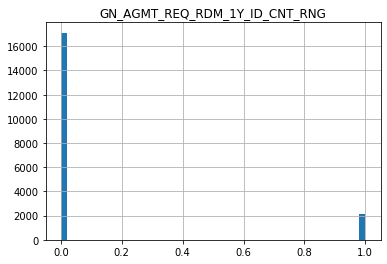

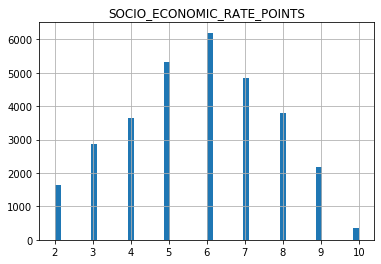

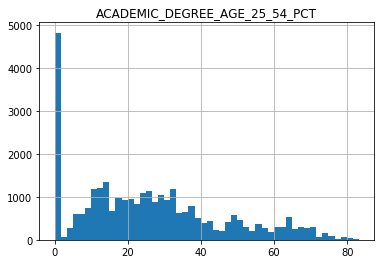

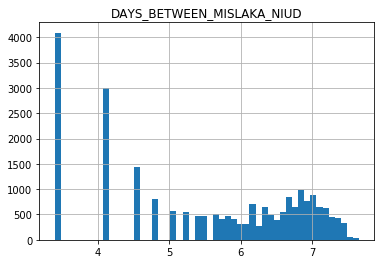

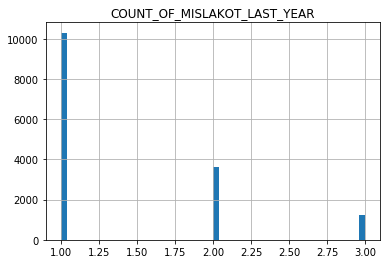

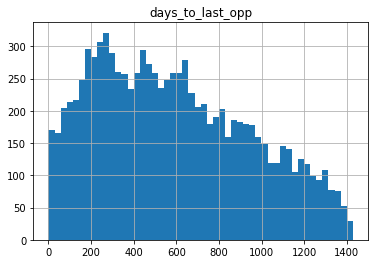

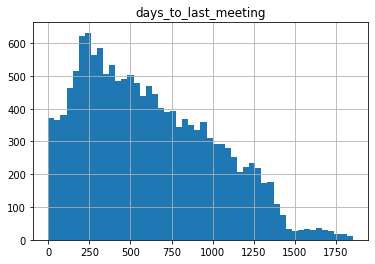

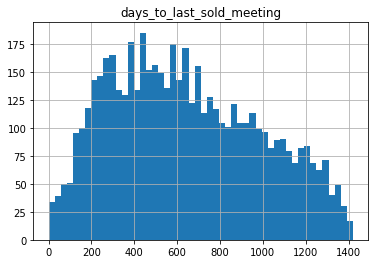

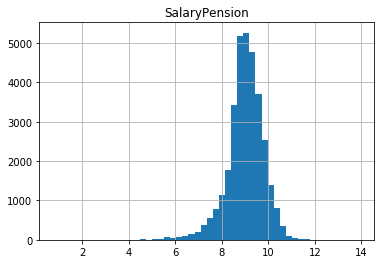

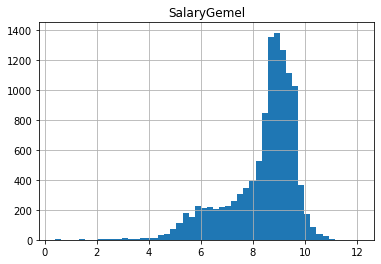

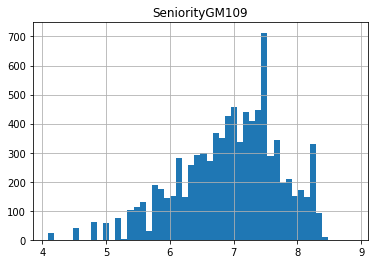

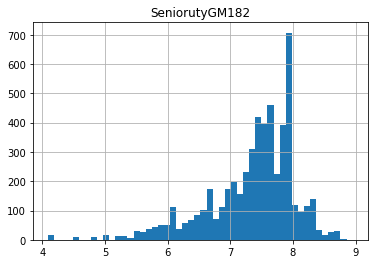

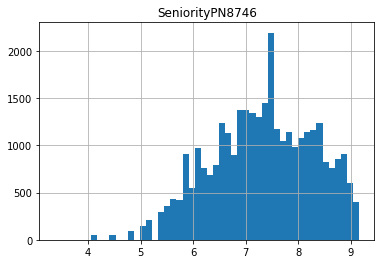

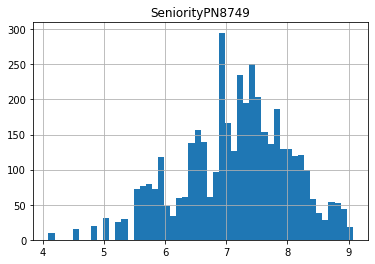

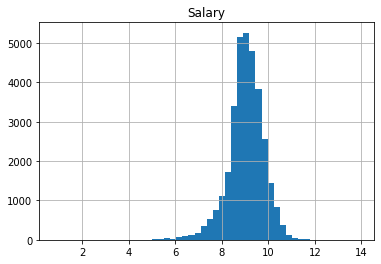

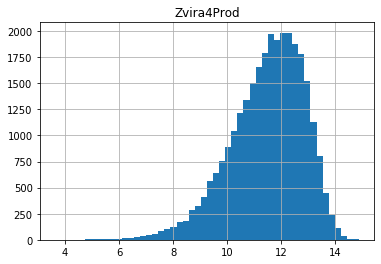

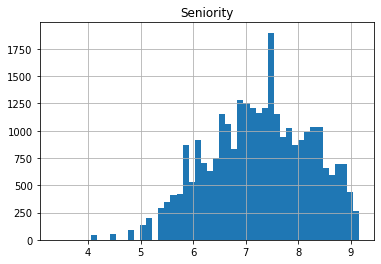

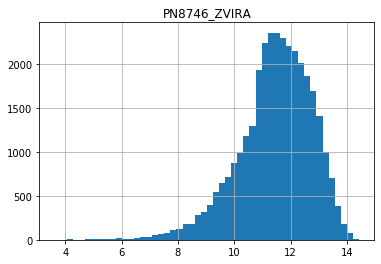

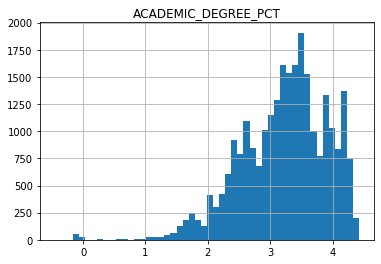

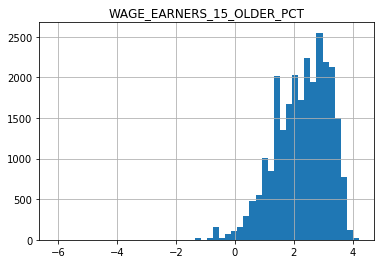

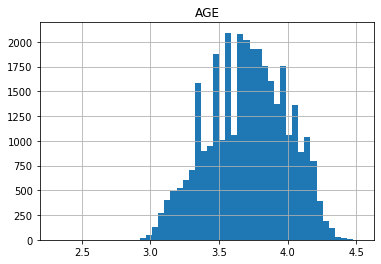

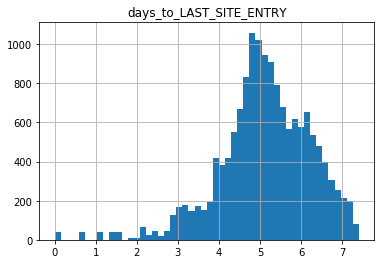

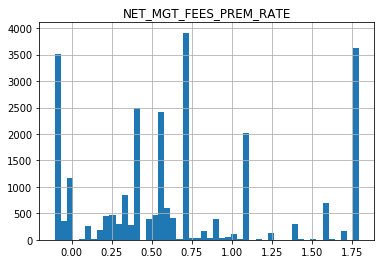

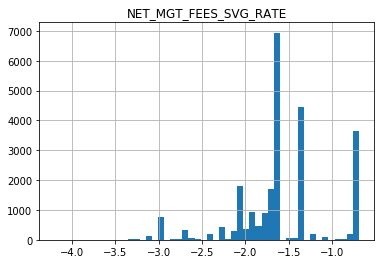

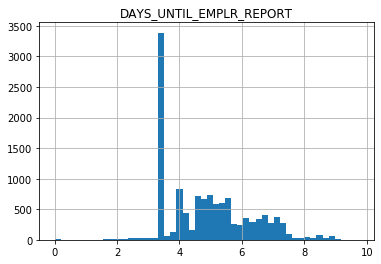

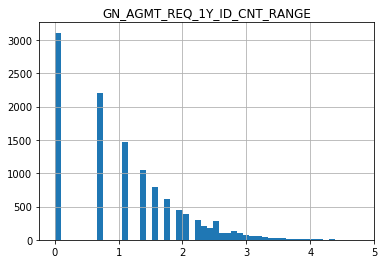

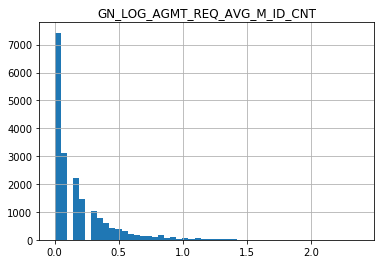

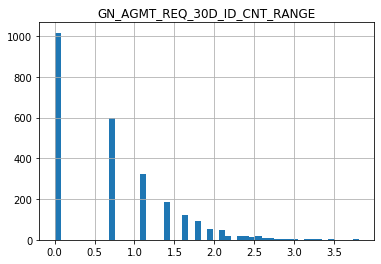

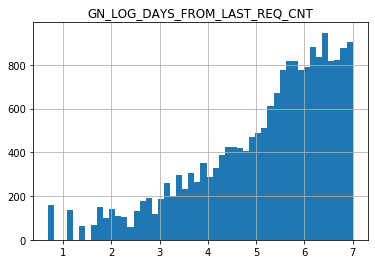

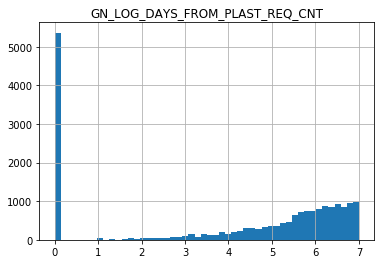

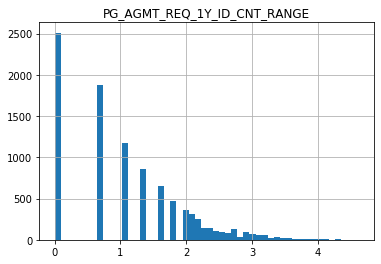

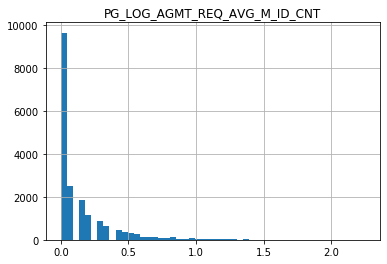

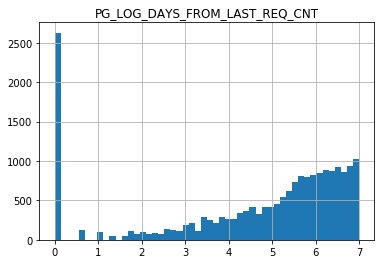

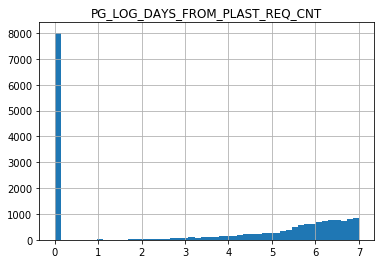

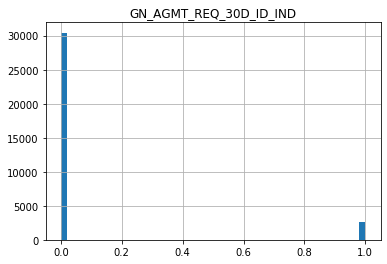

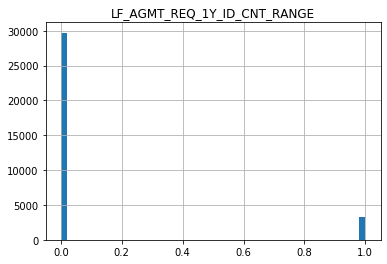

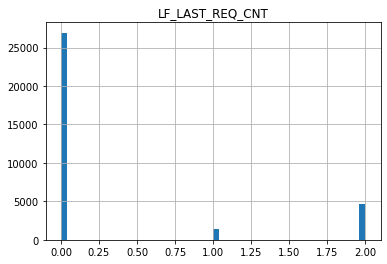

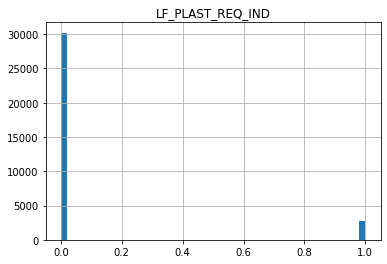

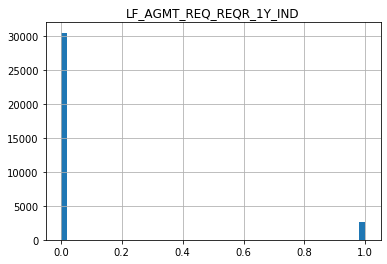

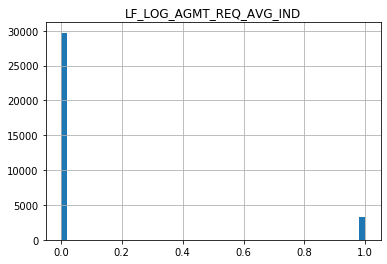

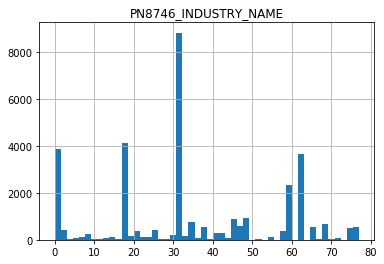

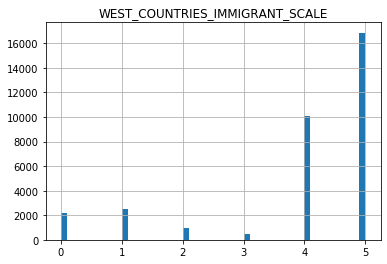

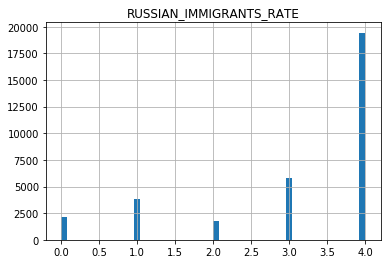

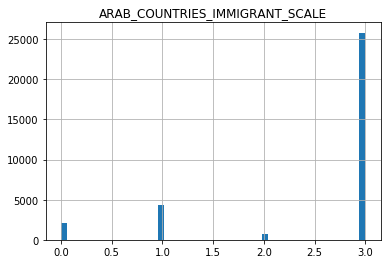

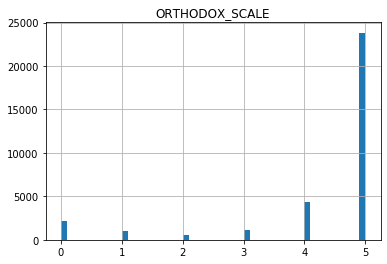

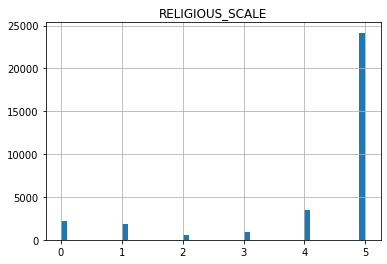

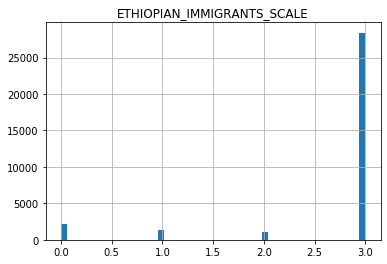

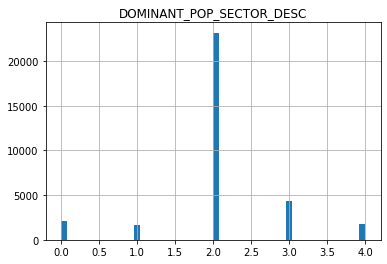

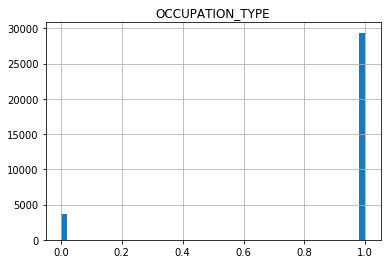

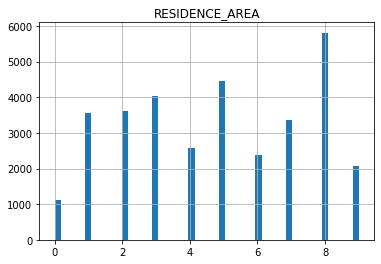

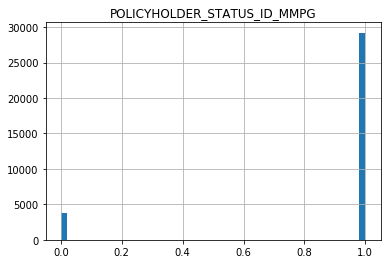

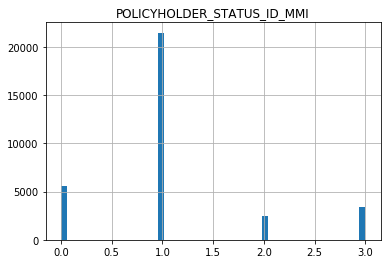

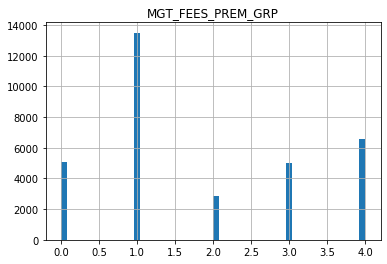

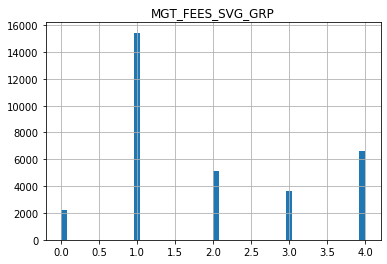

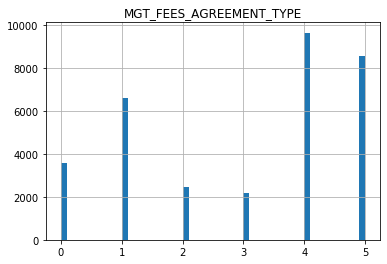

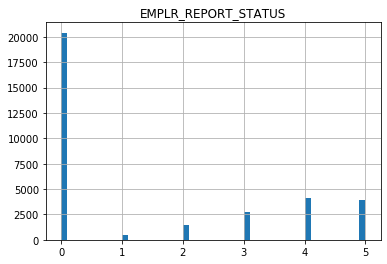

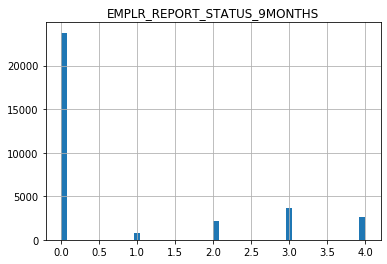

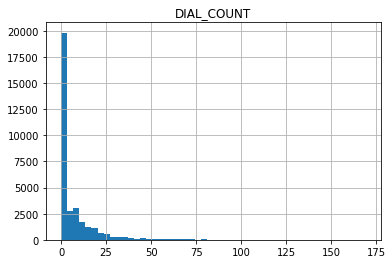

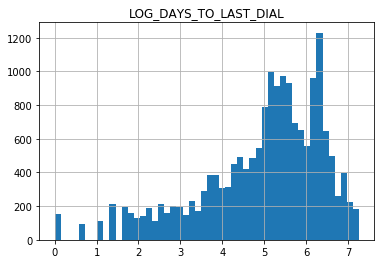

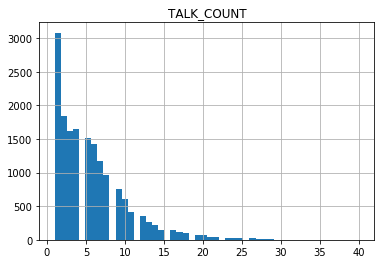

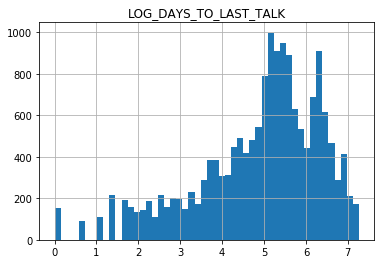

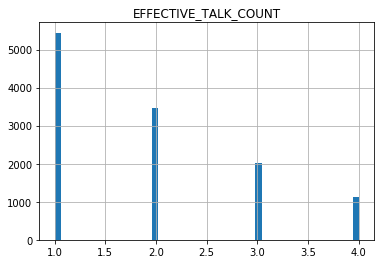

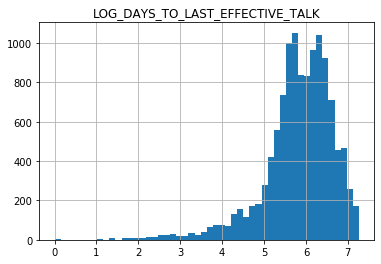

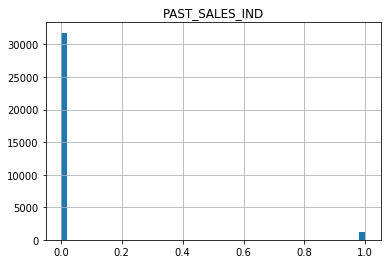

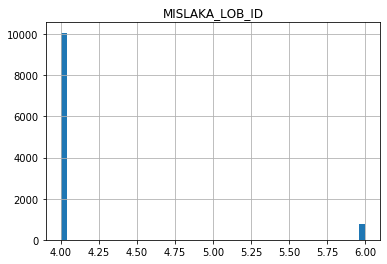

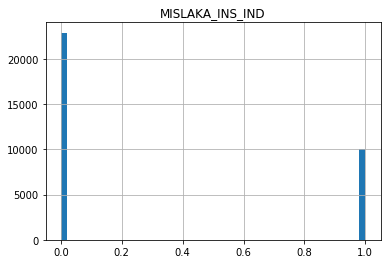

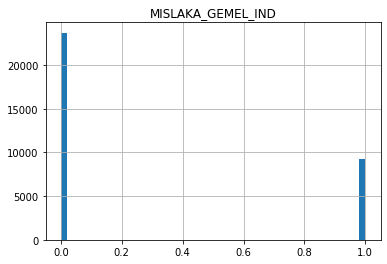

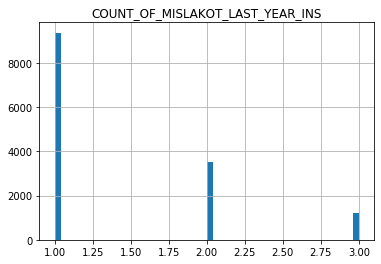

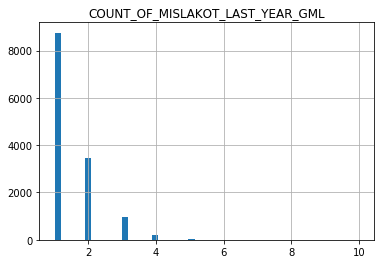

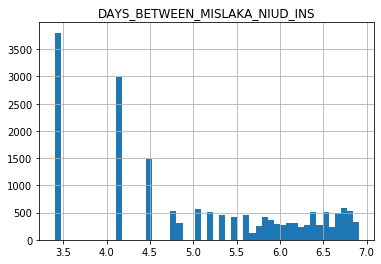

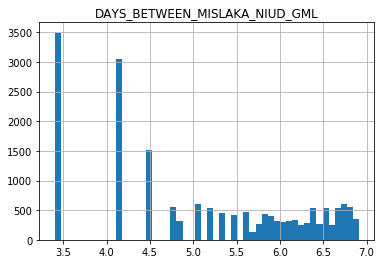

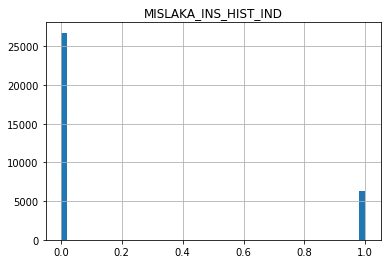

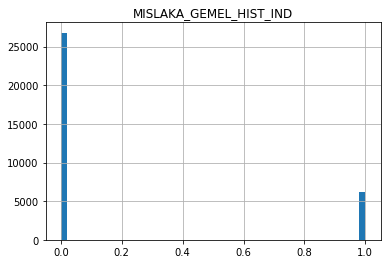

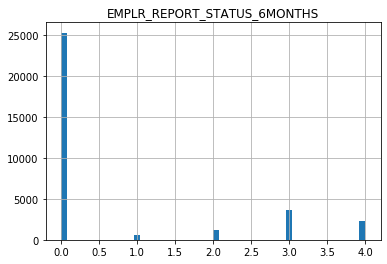

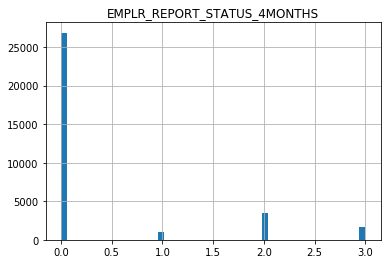

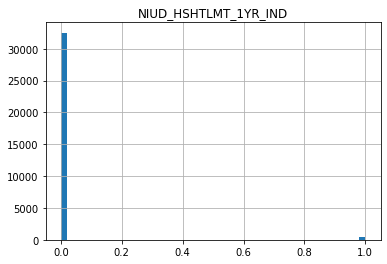

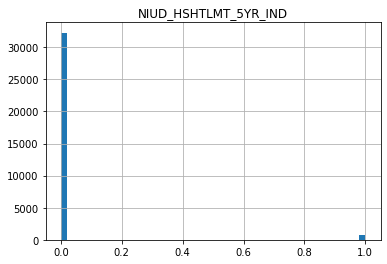

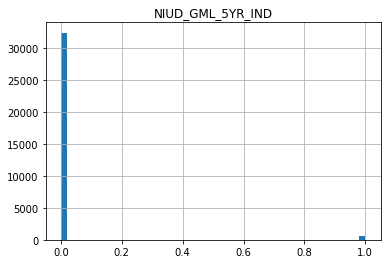

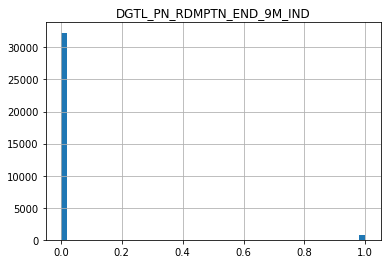

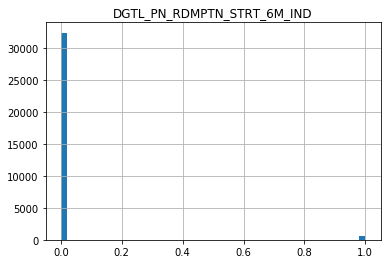

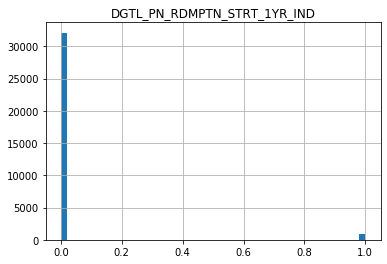

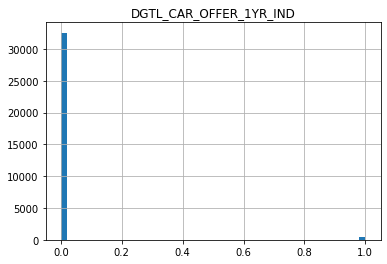

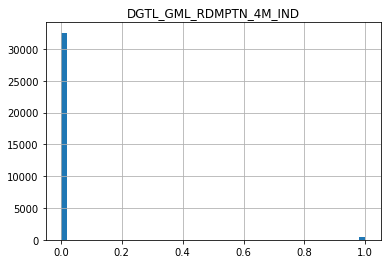

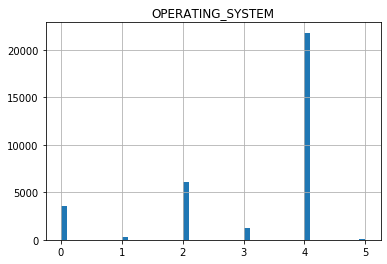

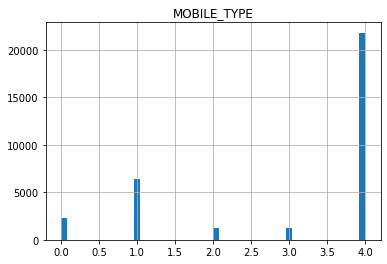

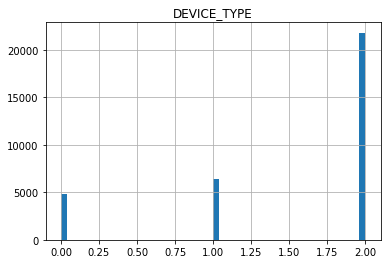

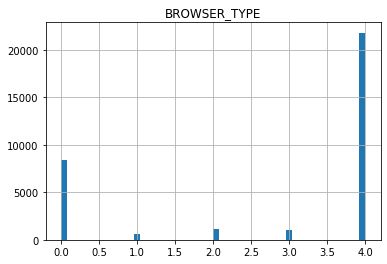

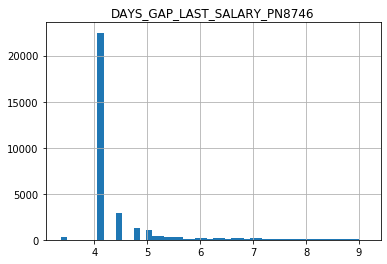

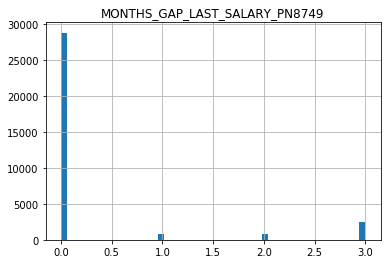

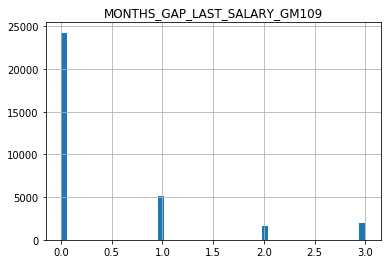

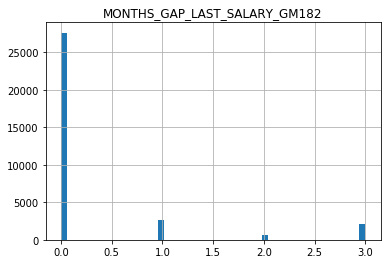

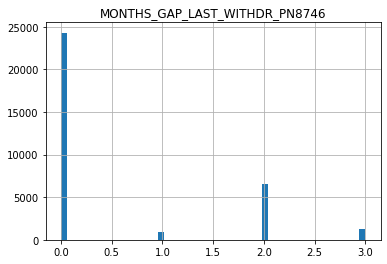

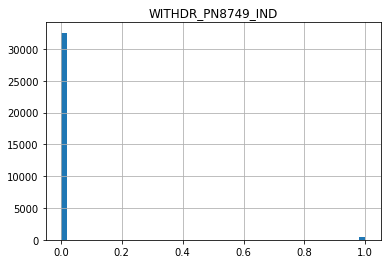

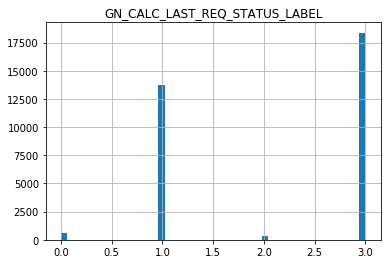

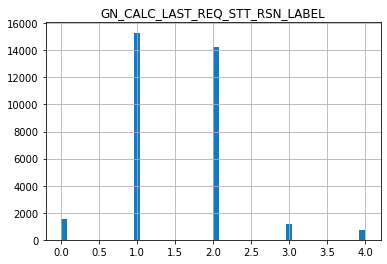

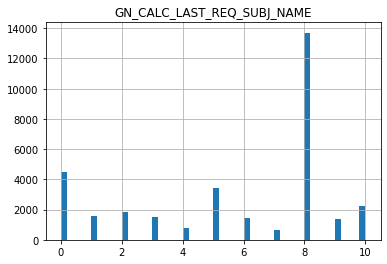

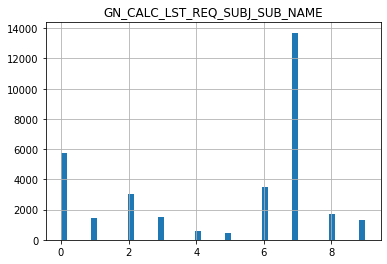

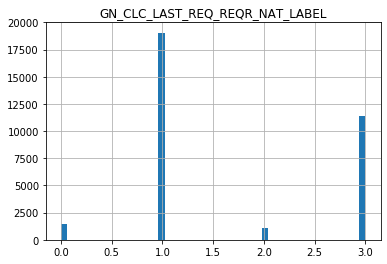

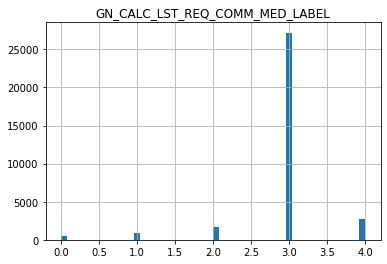

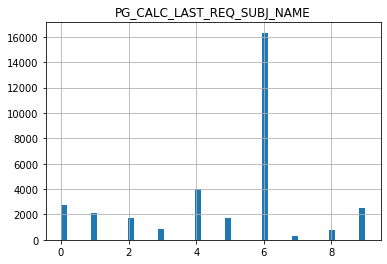

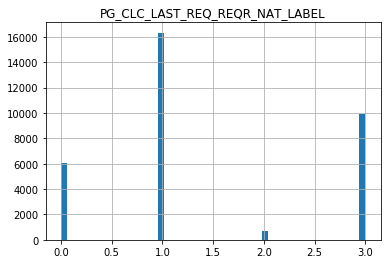

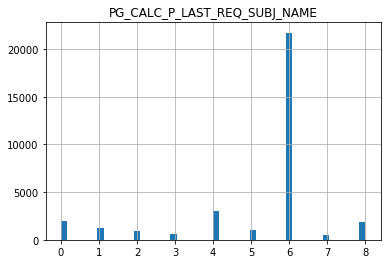

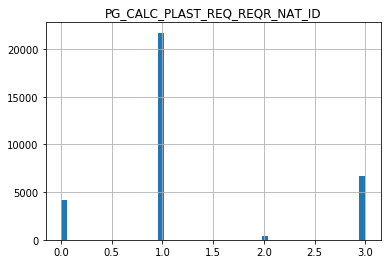

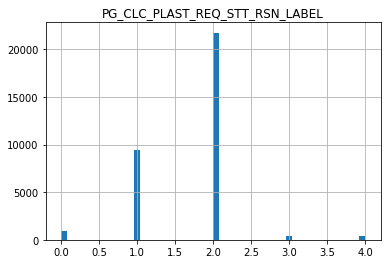

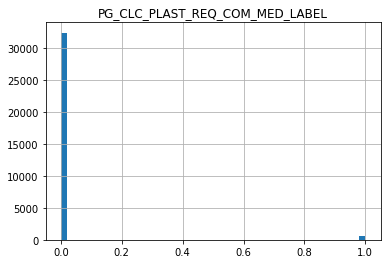

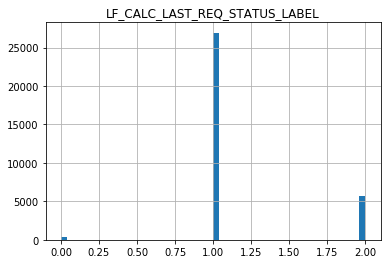

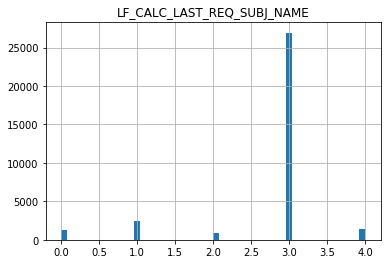

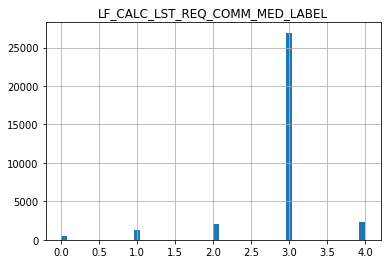

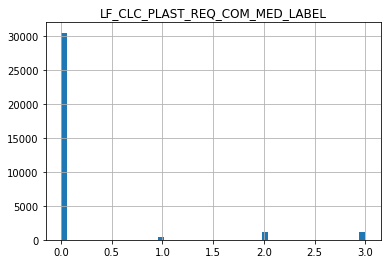

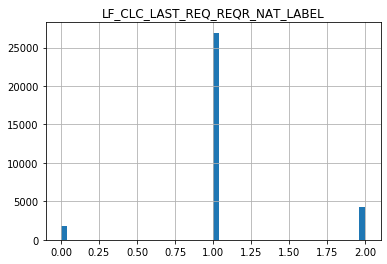

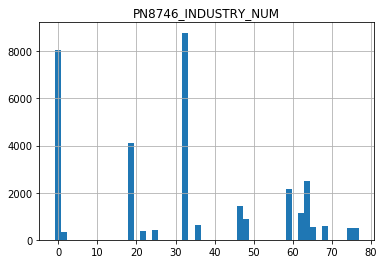

In [56]:
for col in df.columns: 
    try:      
        df[col] = pd.to_numeric(df[col]) 
        df.hist(column=col, bins=50)
    except ValueError:
        print('This column can not be represented as a histogram')

In [57]:
df['ACADEMIC_DEGREE_AGE_25_54_PCT'] = np.log(df['ACADEMIC_DEGREE_AGE_25_54_PCT'] + 1)
df['DAYS_BETWEEN_MISLAKA_NIUD']= np.log(df['DAYS_BETWEEN_MISLAKA_NIUD'] + 1)
df['NET_MGT_FEES_PREM_RATE']= np.log(df['NET_MGT_FEES_PREM_RATE'] + 1)
#df['NET_MGT_FEES_SVG_RATE']= np.log(df['NET_MGT_FEES_SVG_RATE'] + 1)
df['DAYS_UNTIL_EMPLR_REPORT']= np.log(df['DAYS_UNTIL_EMPLR_REPORT'] + 1)          
df['GN_AGMT_REQ_1Y_ID_CNT_RANGE']= np.log(df['GN_AGMT_REQ_1Y_ID_CNT_RANGE'] + 1)     
df['GN_LOG_AGMT_REQ_AVG_M_ID_CNT']= np.log(df['GN_LOG_AGMT_REQ_AVG_M_ID_CNT'] + 1)       
df['GN_AGMT_REQ_30D_ID_CNT_RANGE']= np.log(df['GN_AGMT_REQ_30D_ID_CNT_RANGE'] + 1)                
df['PG_AGMT_REQ_1Y_ID_CNT_RANGE']= np.log(df['PG_AGMT_REQ_1Y_ID_CNT_RANGE'] + 1)        
df['PG_LOG_AGMT_REQ_AVG_M_ID_CNT']= np.log(df['PG_LOG_AGMT_REQ_AVG_M_ID_CNT'] + 1)        
df['DIAL_COUNT']= np.log(df['DIAL_COUNT'] + 1) 
df['TALK_COUNT']= np.log(df['TALK_COUNT'] + 1) 
df['DAYS_BETWEEN_MISLAKA_NIUD_GML']= np.log(df['DAYS_BETWEEN_MISLAKA_NIUD_GML'] + 1)
df['DAYS_GAP_LAST_SALARY_PN8746']= np.log(df['DAYS_GAP_LAST_SALARY_PN8746'] + 1) 

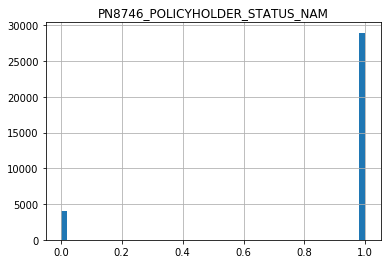

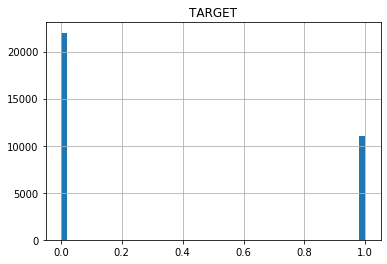

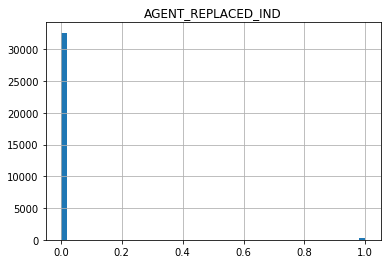

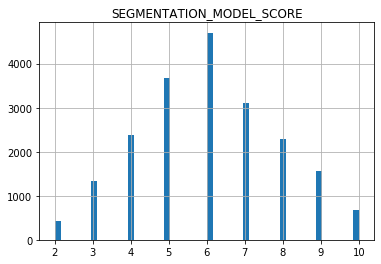

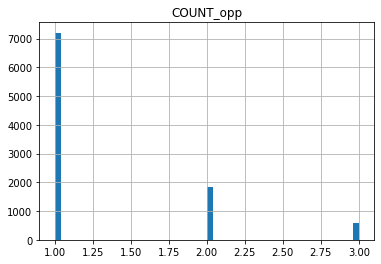

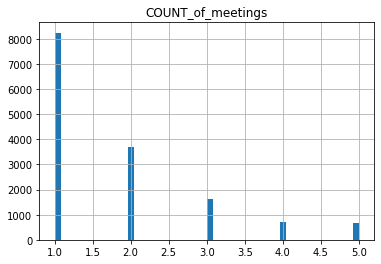

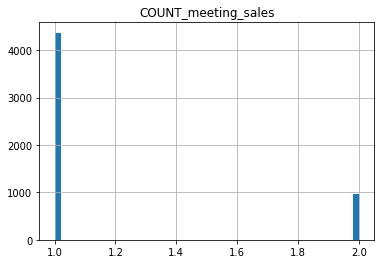

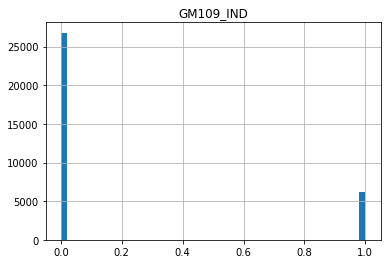

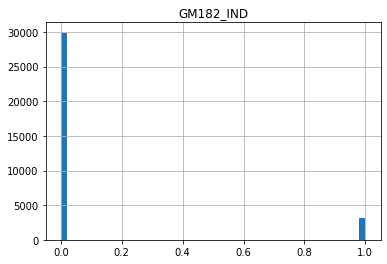

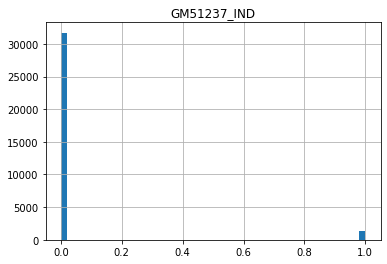

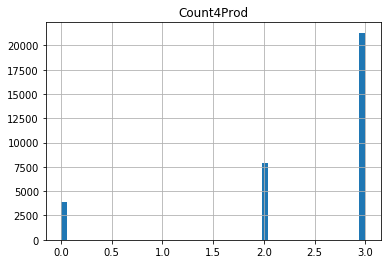

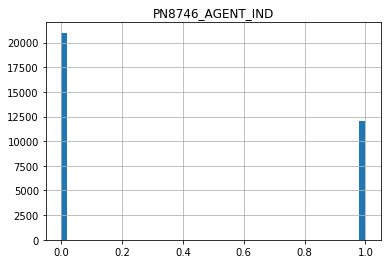

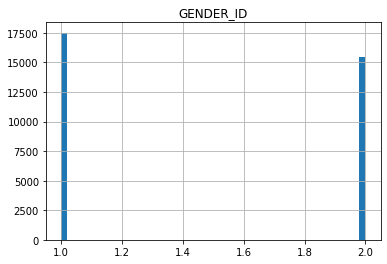

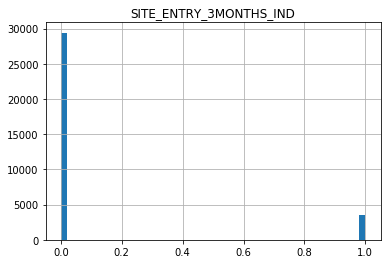

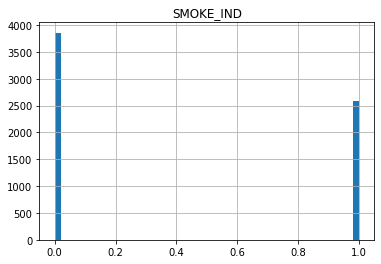

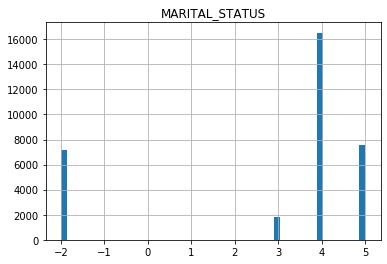

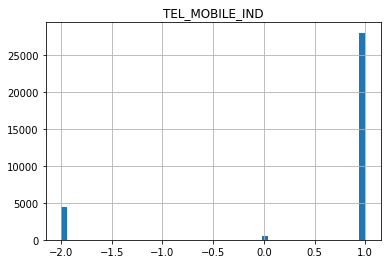

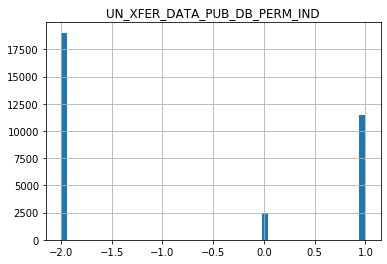

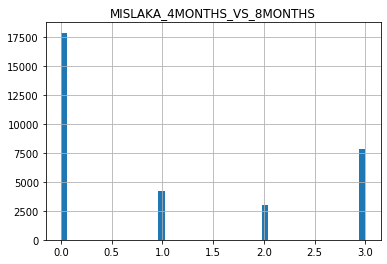

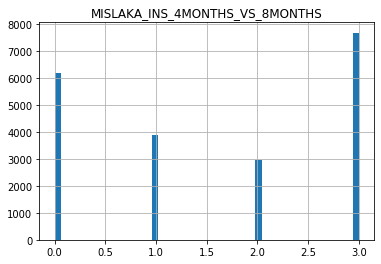

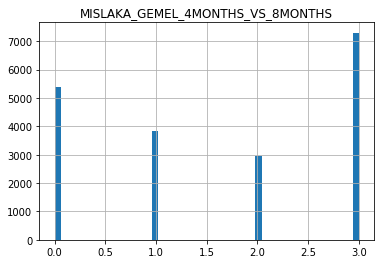

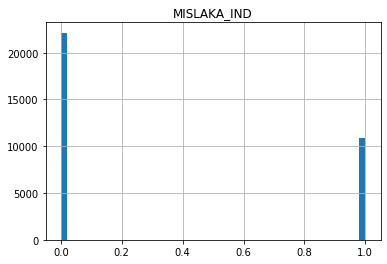

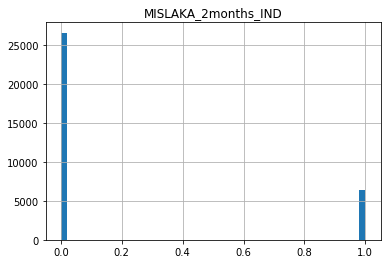

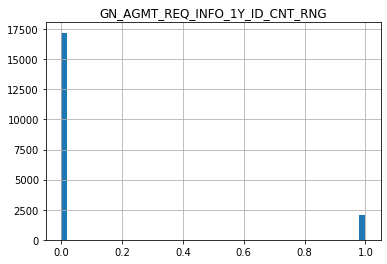

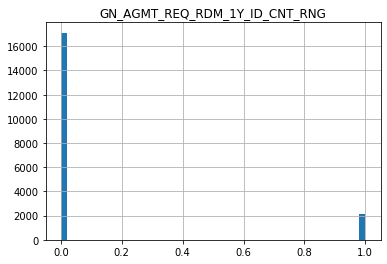

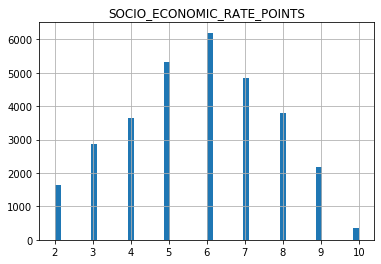

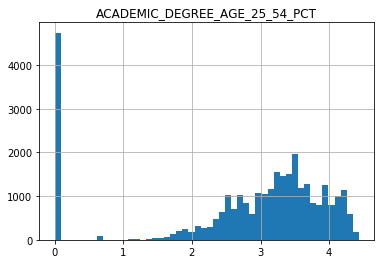

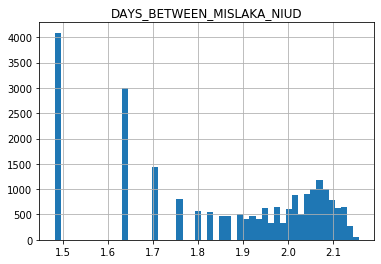

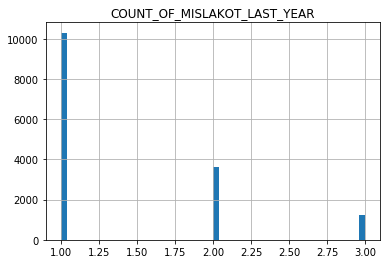

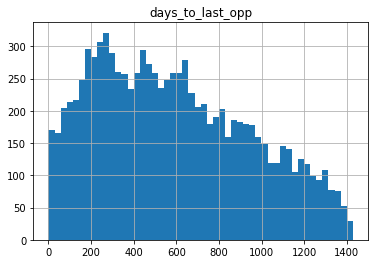

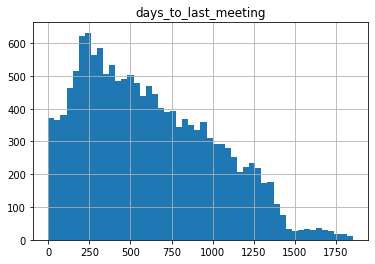

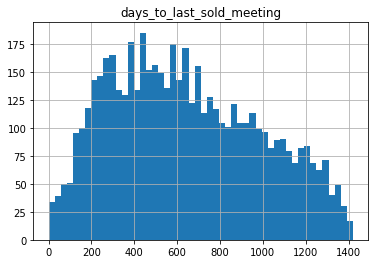

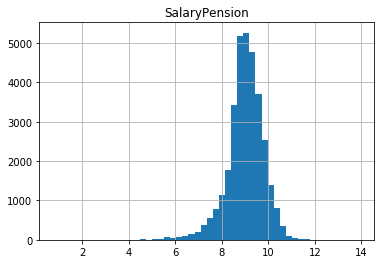

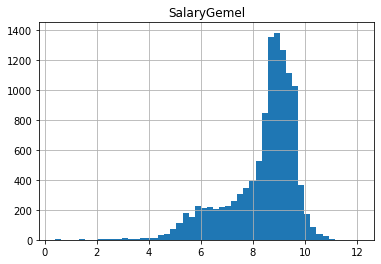

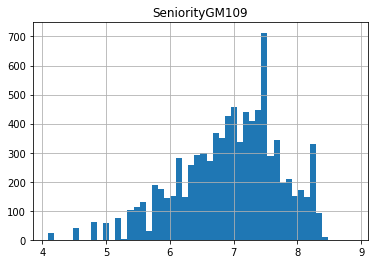

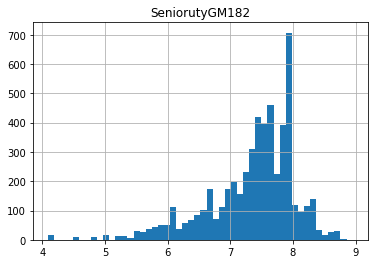

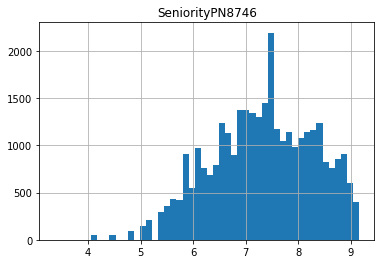

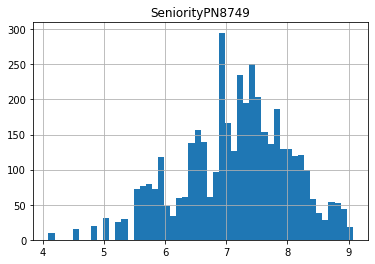

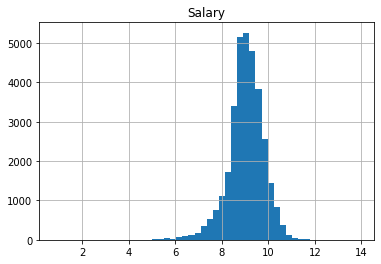

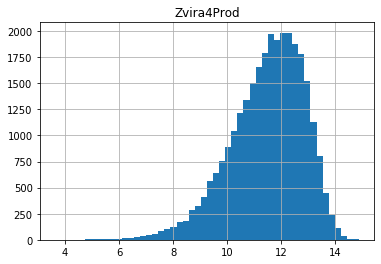

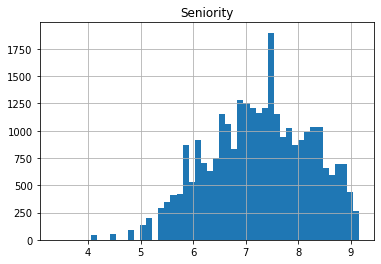

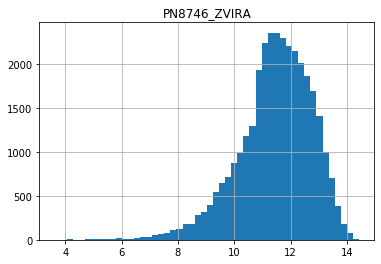

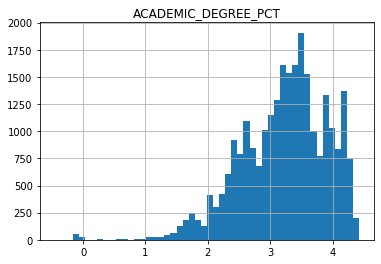

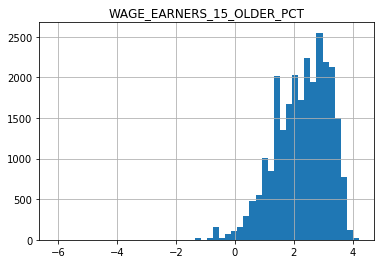

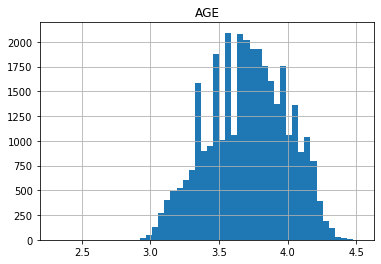

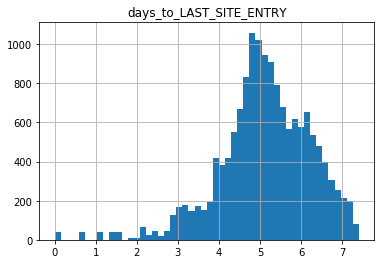

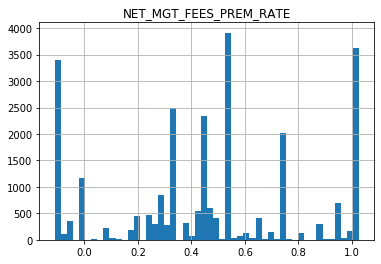

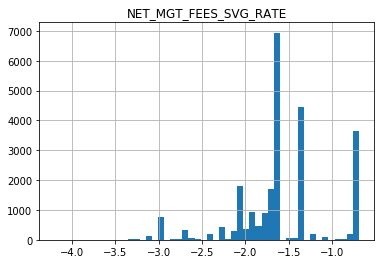

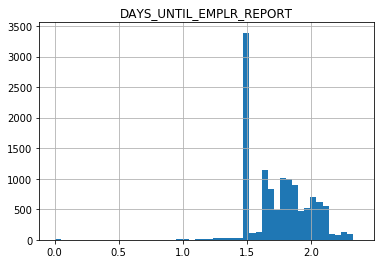

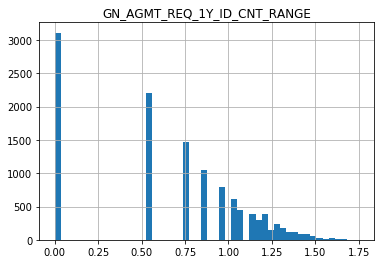

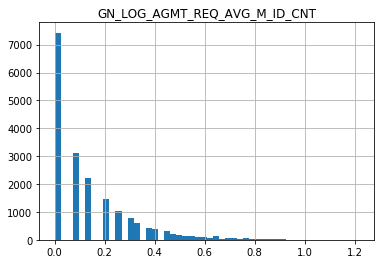

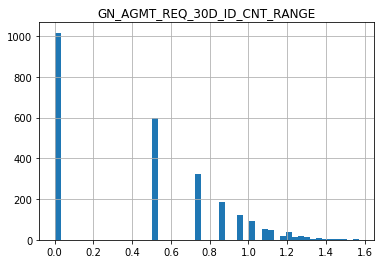

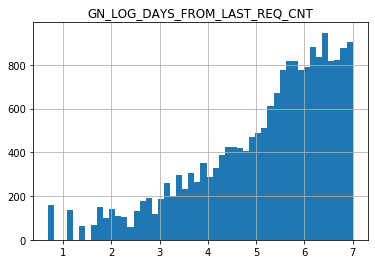

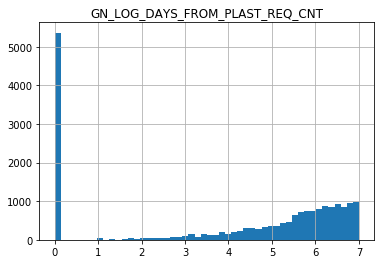

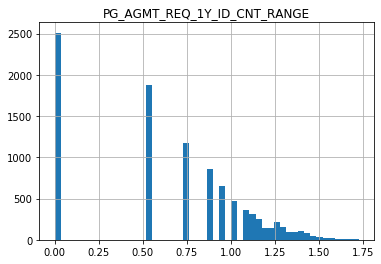

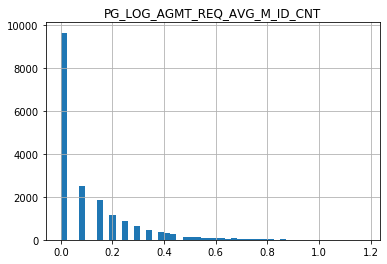

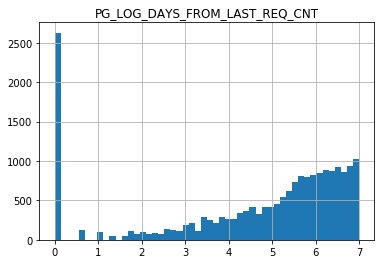

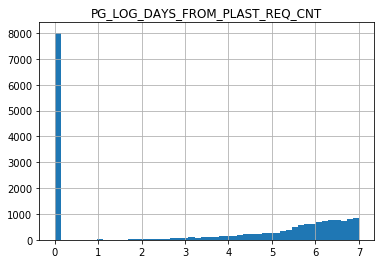

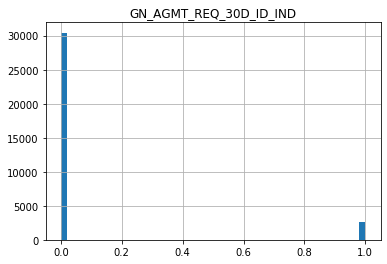

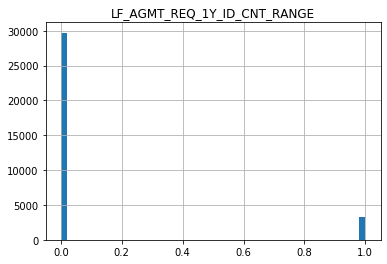

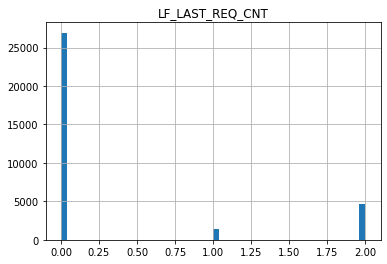

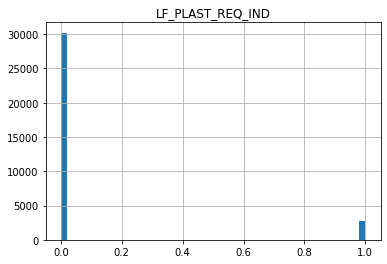

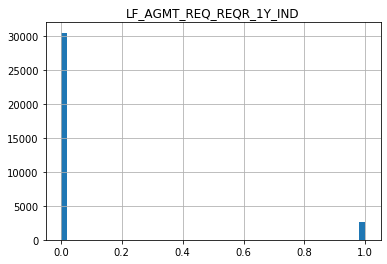

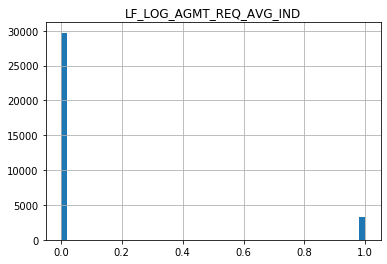

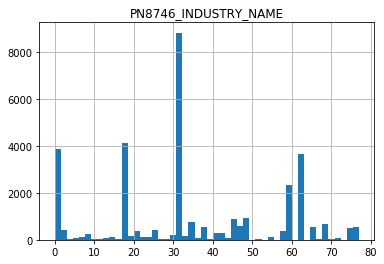

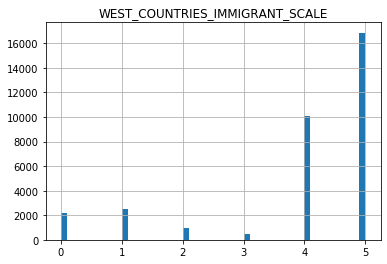

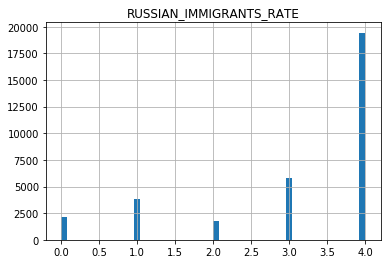

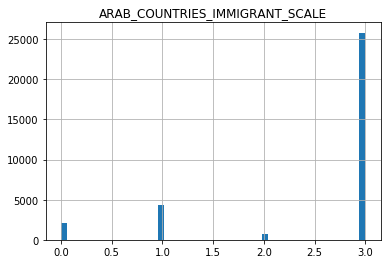

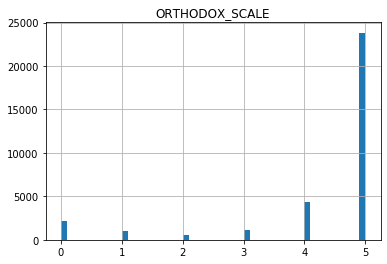

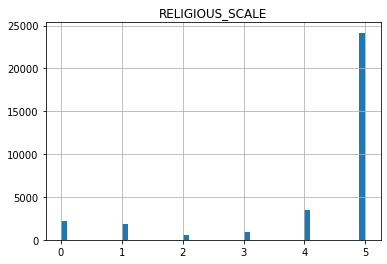

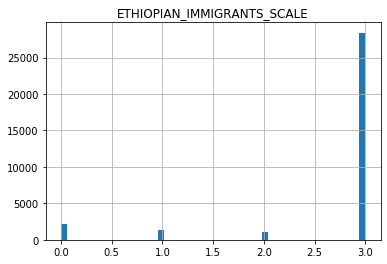

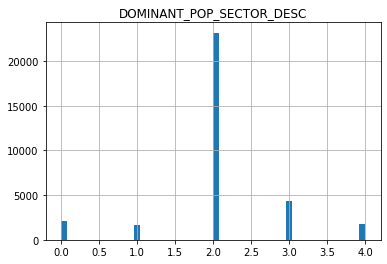

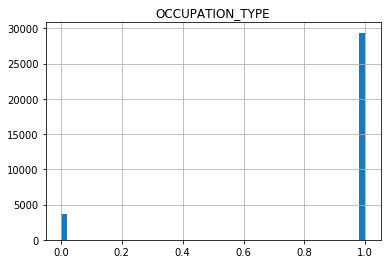

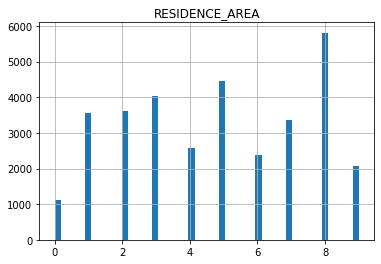

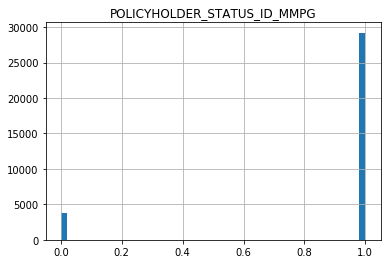

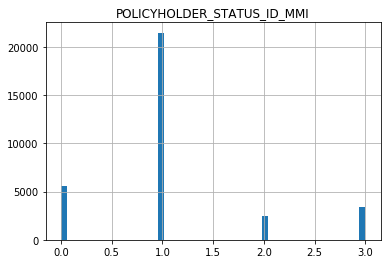

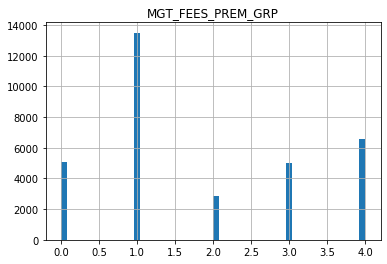

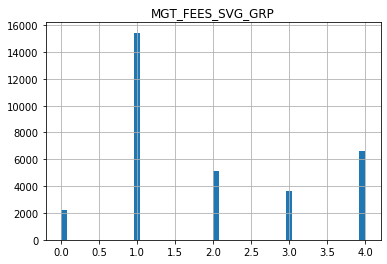

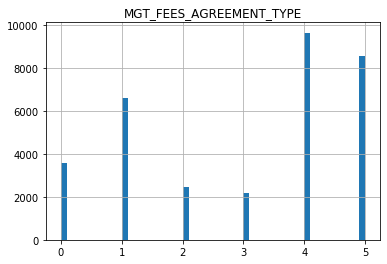

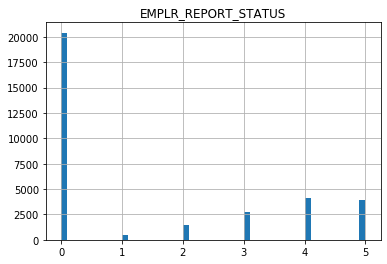

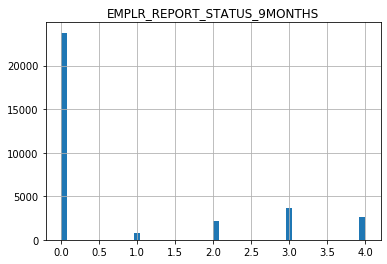

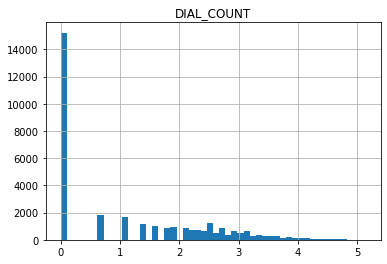

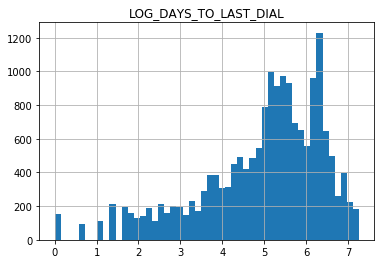

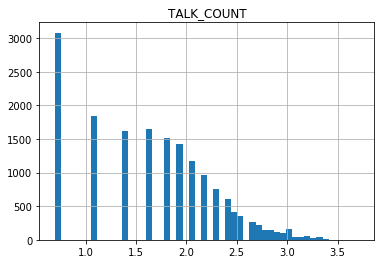

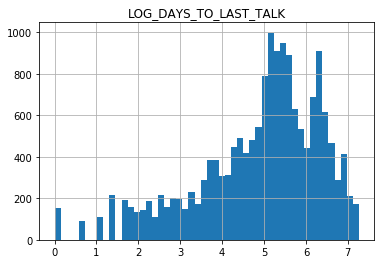

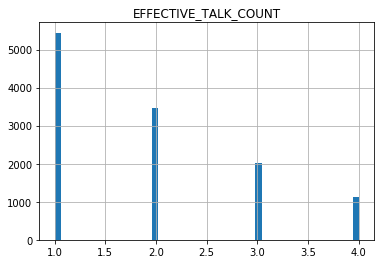

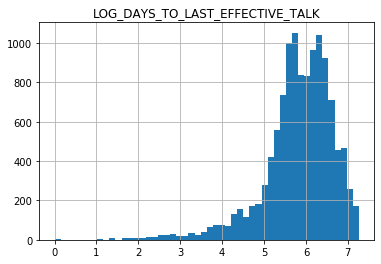

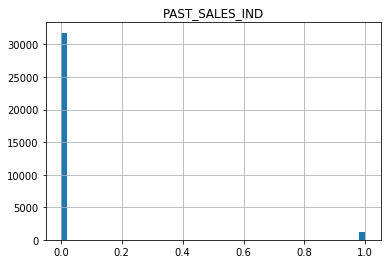

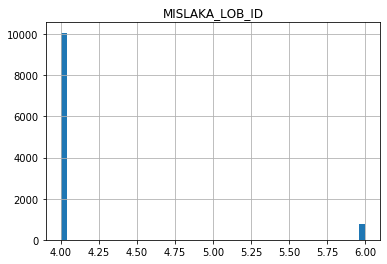

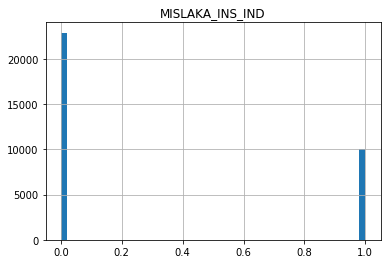

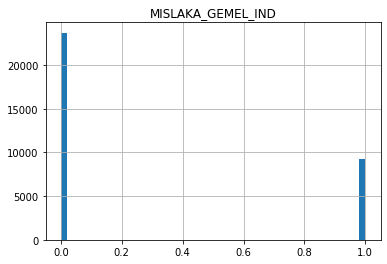

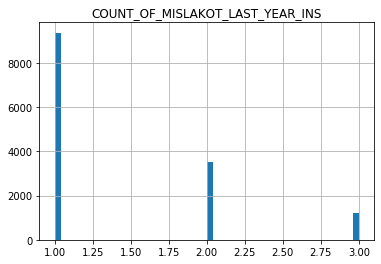

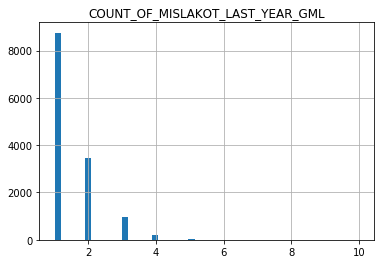

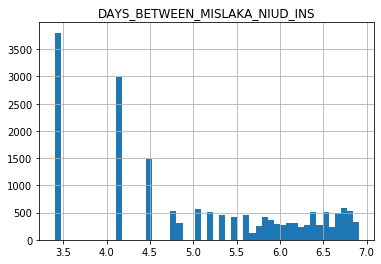

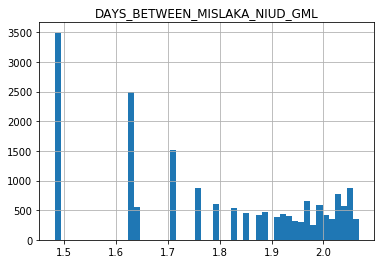

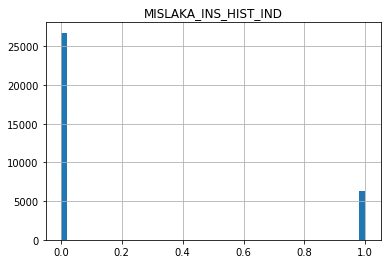

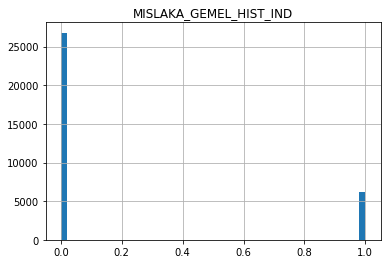

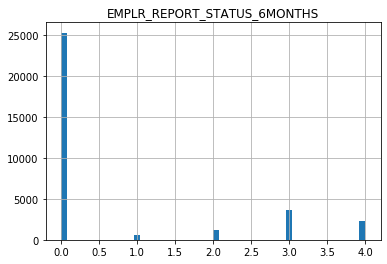

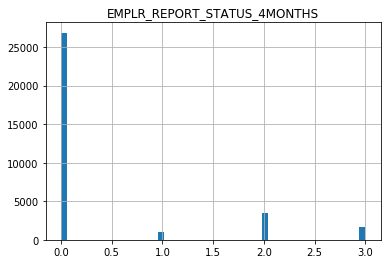

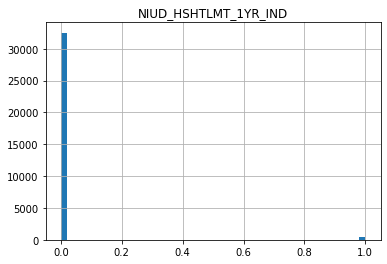

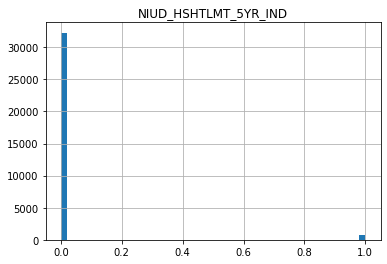

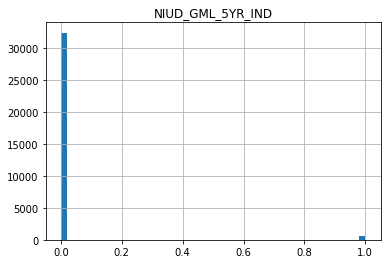

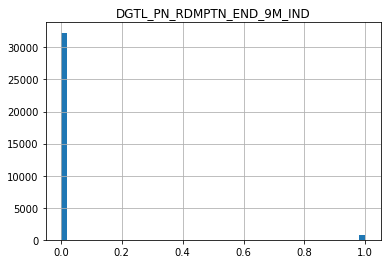

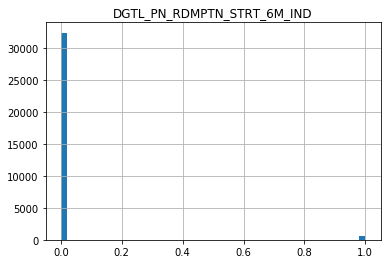

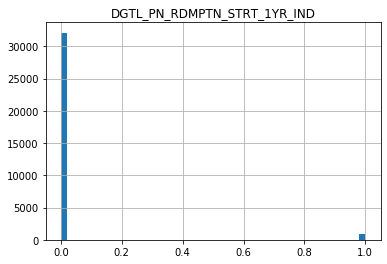

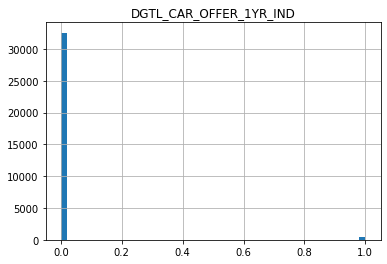

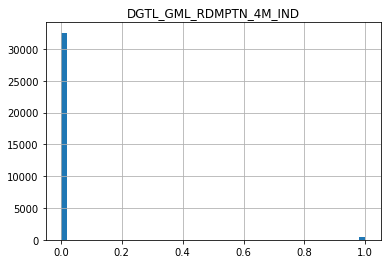

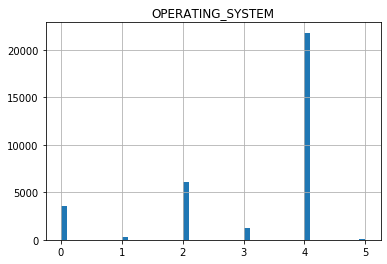

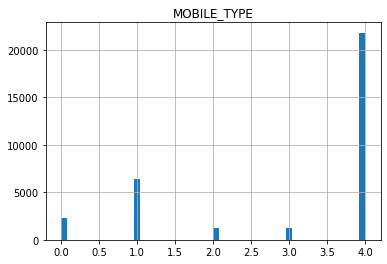

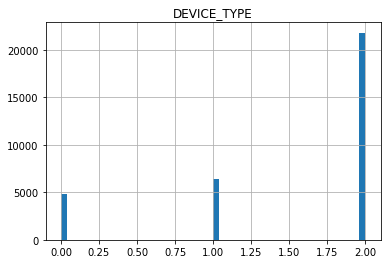

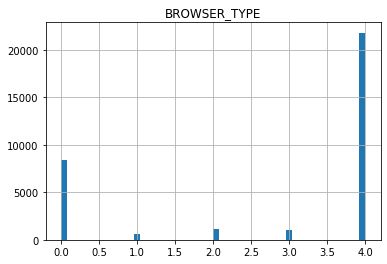

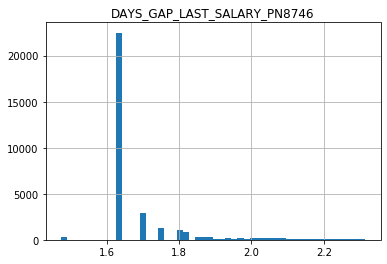

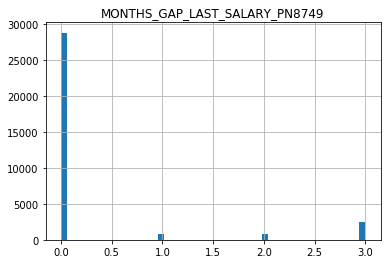

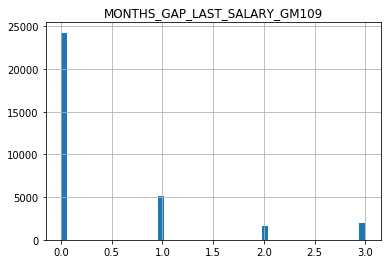

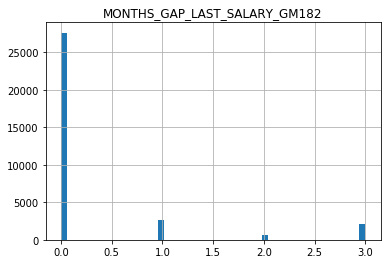

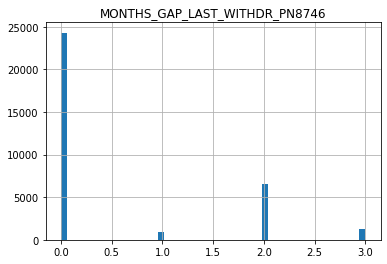

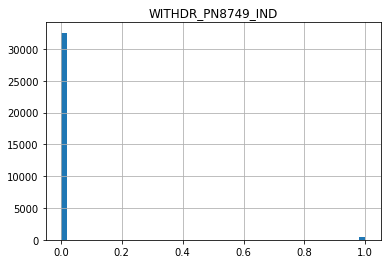

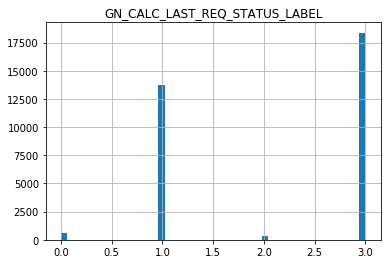

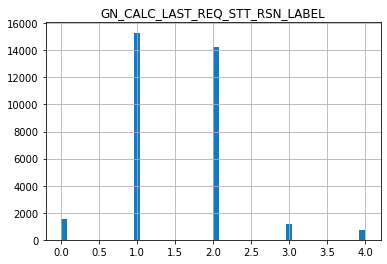

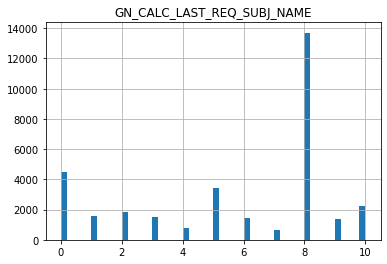

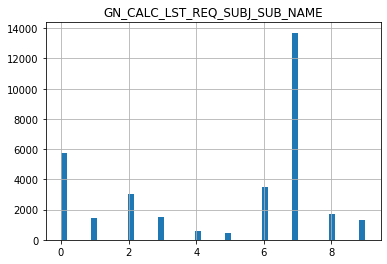

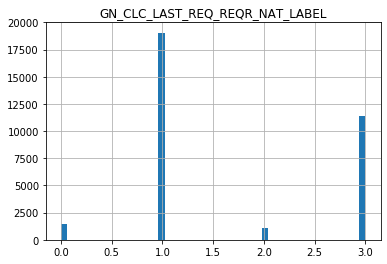

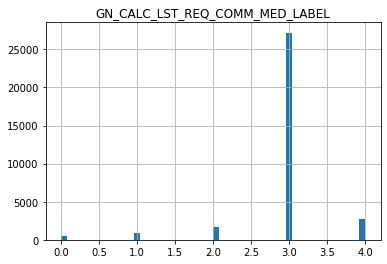

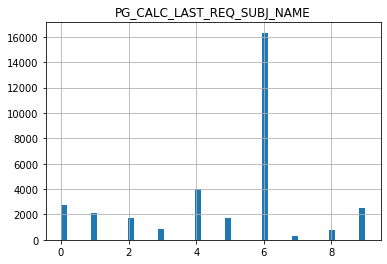

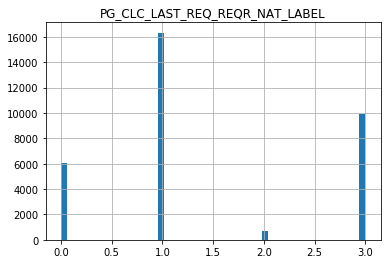

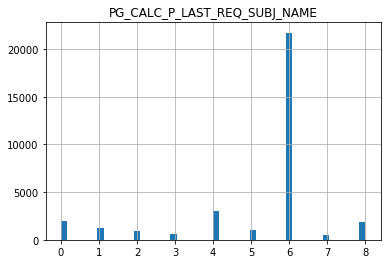

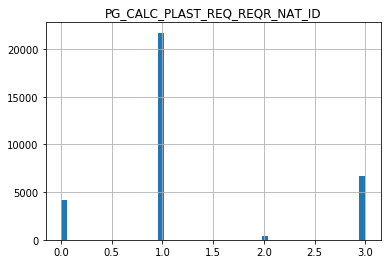

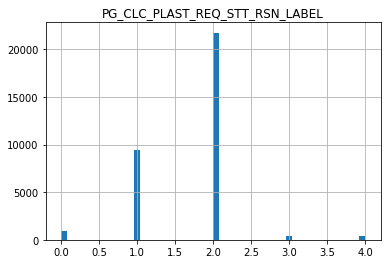

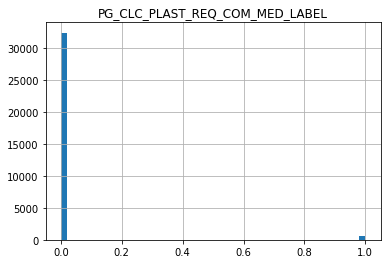

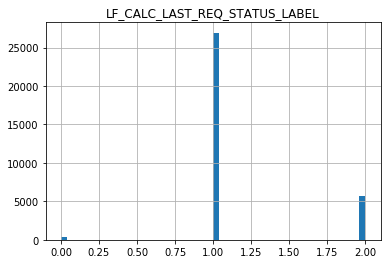

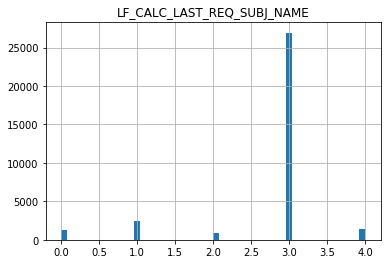

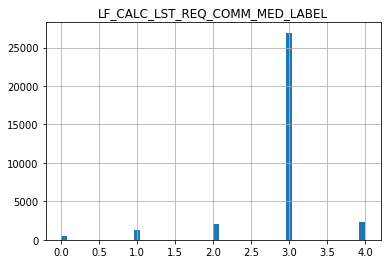

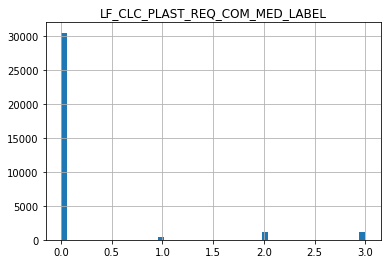

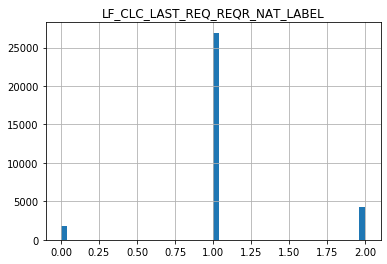

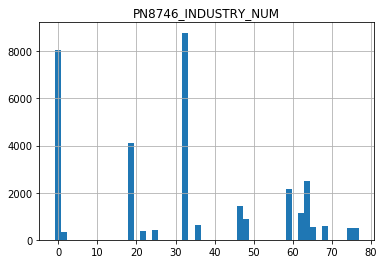

In [58]:
for col in df.columns: 
    try:      
        df[col] = pd.to_numeric(df[col]) 
        df.hist(column=col, bins=50)
    except ValueError:
        print('This column can not be represented as a histogram')

In [59]:
with pd.option_context('display.max_columns', None):
    print(df.columns.values)

['PN8746_POLICYHOLDER_STATUS_NAM' 'TARGET' 'AGENT_REPLACED_IND'
 'SEGMENTATION_MODEL_SCORE' 'COUNT_opp' 'COUNT_of_meetings'
 'COUNT_meeting_sales' 'GM109_IND' 'GM182_IND' 'GM51237_IND' 'Count4Prod'
 'PN8746_AGENT_IND' 'GENDER_ID' 'SITE_ENTRY_3MONTHS_IND' 'SMOKE_IND'
 'MARITAL_STATUS' 'TEL_MOBILE_IND' 'UN_XFER_DATA_PUB_DB_PERM_IND'
 'MISLAKA_4MONTHS_VS_8MONTHS' 'MISLAKA_INS_4MONTHS_VS_8MONTHS'
 'MISLAKA_GEMEL_4MONTHS_VS_8MONTHS' 'MISLAKA_IND' 'MISLAKA_2months_IND'
 'GN_AGMT_REQ_INFO_1Y_ID_CNT_RNG' 'GN_AGMT_REQ_RDM_1Y_ID_CNT_RNG'
 'SOCIO_ECONOMIC_RATE_POINTS' 'ACADEMIC_DEGREE_AGE_25_54_PCT'
 'DAYS_BETWEEN_MISLAKA_NIUD' 'COUNT_OF_MISLAKOT_LAST_YEAR'
 'days_to_last_opp' 'days_to_last_meeting' 'days_to_last_sold_meeting'
 'SalaryPension' 'SalaryGemel' 'SeniorityGM109' 'SeniorutyGM182'
 'SeniorityPN8746' 'SeniorityPN8749' 'Salary' 'Zvira4Prod' 'Seniority'
 'PN8746_ZVIRA' 'ACADEMIC_DEGREE_PCT' 'WAGE_EARNERS_15_OLDER_PCT' 'AGE'
 'days_to_LAST_SITE_ENTRY' 'NET_MGT_FEES_PREM_RATE'
 'NET_MGT_FEES

In [60]:
X = df.drop(columns=['TARGET'])

In [61]:
#from missingpy import MissForest
#imputer = MissForest()
#X_imputed = imputer.fit_transform(X)

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Columns: 134 entries, PN8746_POLICYHOLDER_STATUS_NAM to PN8746_INDUSTRY_NUM
dtypes: float64(64), int32(46), int64(24)
memory usage: 27.9 MB


In [63]:
#################### MISSING VALUES ############

In [64]:
nulls = (df.isnull().sum()/33000).to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

PN8746_POLICYHOLDER_STATUS_NAM 0.0
TARGET 0.0
AGENT_REPLACED_IND 0.0
SEGMENTATION_MODEL_SCORE 0.3896363636363636
COUNT_opp 0.7079090909090909
COUNT_of_meetings 0.5476666666666666
COUNT_meeting_sales 0.8383636363636363
GM109_IND 0.0
GM182_IND 0.0
GM51237_IND 0.0
Count4Prod 0.0
PN8746_AGENT_IND 0.0
GENDER_ID 3.0303030303030302e-05
SITE_ENTRY_3MONTHS_IND 0.0
SMOKE_IND 0.8047575757575758
MARITAL_STATUS 0.0
TEL_MOBILE_IND 0.0
UN_XFER_DATA_PUB_DB_PERM_IND 0.0
MISLAKA_4MONTHS_VS_8MONTHS 0.0
MISLAKA_INS_4MONTHS_VS_8MONTHS 0.37318181818181817
MISLAKA_GEMEL_4MONTHS_VS_8MONTHS 0.40993939393939394
MISLAKA_IND 0.0
MISLAKA_2months_IND 0.0
GN_AGMT_REQ_INFO_1Y_ID_CNT_RNG 0.41533333333333333
GN_AGMT_REQ_RDM_1Y_ID_CNT_RNG 0.41533333333333333
SOCIO_ECONOMIC_RATE_POINTS 0.06603030303030304
ACADEMIC_DEGREE_AGE_25_54_PCT 0.0649090909090909
DAYS_BETWEEN_MISLAKA_NIUD 0.28475757575757576
COUNT_OF_MISLAKOT_LAST_YEAR 0.542
days_to_last_opp 0.7079090909090909
days_to_last_meeting 0.5476666666666666
days_to_last_s

In [65]:
null0 = pd.DataFrame(nulls.loc[nulls[0].between(0,0.5, inclusive=False)])

In [66]:
null0

0
SEGMENTATION_MODEL_SCORE          0.389636
GENDER_ID                         0.000030
MISLAKA_INS_4MONTHS_VS_8MONTHS    0.373182
MISLAKA_GEMEL_4MONTHS_VS_8MONTHS  0.409939
GN_AGMT_REQ_INFO_1Y_ID_CNT_RNG    0.415333
GN_AGMT_REQ_RDM_1Y_ID_CNT_RNG     0.415333
SOCIO_ECONOMIC_RATE_POINTS        0.066030
ACADEMIC_DEGREE_AGE_25_54_PCT     0.064909
DAYS_BETWEEN_MISLAKA_NIUD         0.284758
SalaryPension                     0.001424
SeniorityPN8746                   0.021273
Salary                            0.001091
Zvira4Prod                        0.116697
Seniority                         0.128000
ACADEMIC_DEGREE_PCT               0.208606
WAGE_EARNERS_15_OLDER_PCT         0.211636
NET_MGT_FEES_PREM_RATE            0.199970
NET_MGT_FEES_SVG_RATE             0.266091
GN_LOG_AGMT_REQ_AVG_M_ID_CNT      0.415333
GN_LOG_DAYS_FROM_LAST_REQ_CNT     0.415333
GN_LOG_DAYS_FROM_PLAST_REQ_CNT    0.415333
PG_LOG_AGMT_REQ_AVG_M_ID_CNT      0.415333
PG_LOG_DAYS_FROM_LAST_REQ_CNT     0.415333
PG_LOG_DAYS_FROM_PLAST_REQ_CNT    0.415333
LOG_DAYS_TO_LAST_DIAL             0.461242
TALK_COUNT                        0.491091
LOG_DAYS_TO_LAST_TALK             0.491091
DAYS_BETWEEN_MISLAKA_NIUD_INS     0.459303
DAYS_BETWEEN_MISLAKA_NIUD_GML     0.453242
DAYS_GAP_LAST_SALARY_PN8746       0.002000

In [67]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
imputed_x = pd.DataFrame(impute_it.fit_transform(X))

In [68]:
nulls1 = (imputed_x.isnull().sum()/33000).to_frame()
for index, row in nulls1.iterrows():
    print(index, row[0])

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 0.0
60 0.0
61 0.0
62 0.0
63 0.0
64 0.0
65 0.0
66 0.0
67 0.0
68 0.0
69 0.0
70 0.0
71 0.0
72 0.0
73 0.0
74 0.0
75 0.0
76 0.0
77 0.0
78 0.0
79 0.0
80 0.0
81 0.0
82 0.0
83 0.0
84 0.0
85 0.0
86 0.0
87 0.0
88 0.0
89 0.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 0.0
103 0.0
104 0.0
105 0.0
106 0.0
107 0.0
108 0.0
109 0.0
110 0.0
111 0.0
112 0.0
113 0.0
114 0.0
115 0.0
116 0.0
117 0.0
118 0.0
119 0.0
120 0.0
121 0.0
122 0.0
123 0.0
124 0.0
125 0.0
126 0.0
127 0.0
128 0.0
129 0.0
130 0.0
131 0.0
132 0.0
133 0.0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


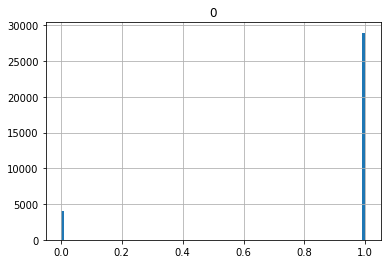

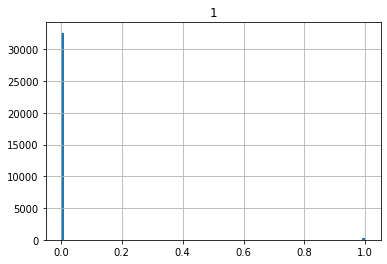

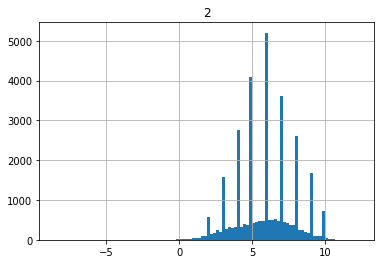

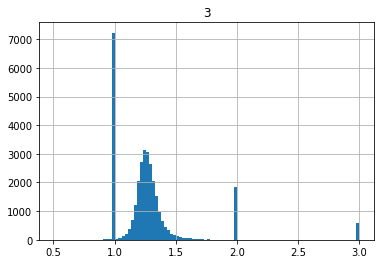

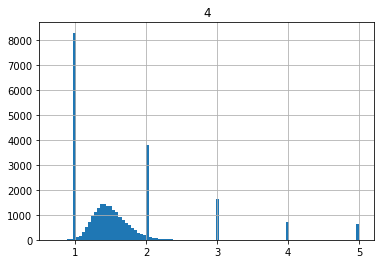

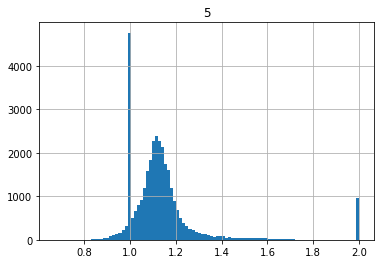

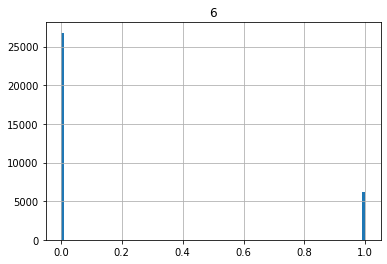

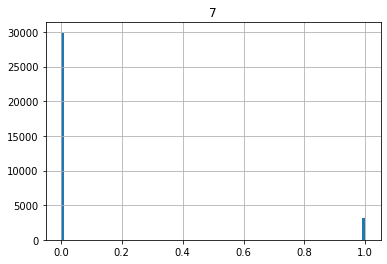

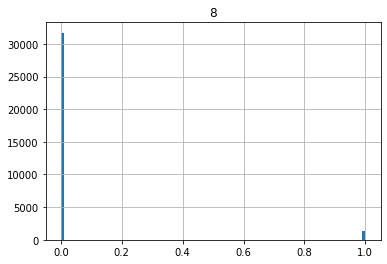

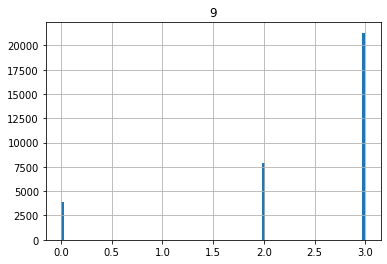

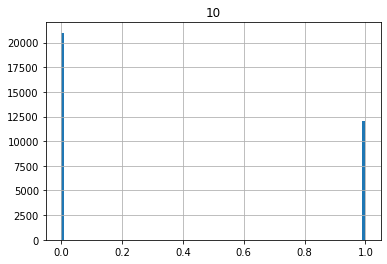

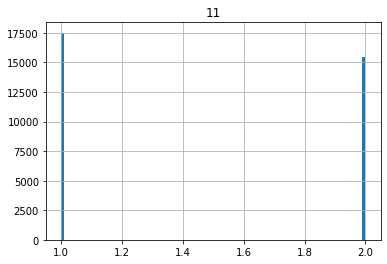

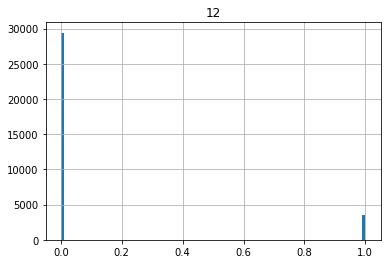

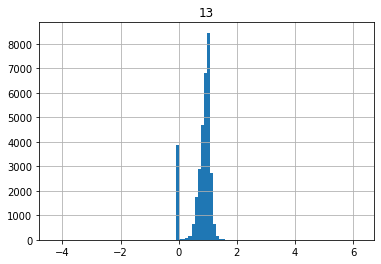

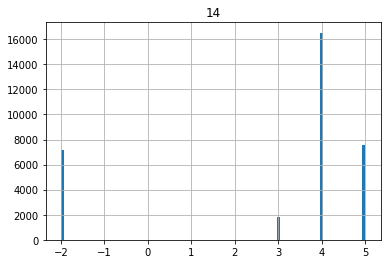

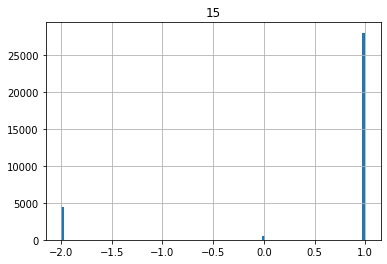

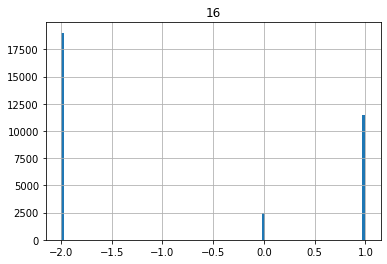

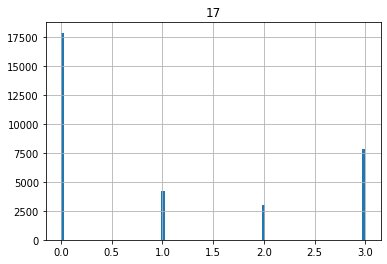

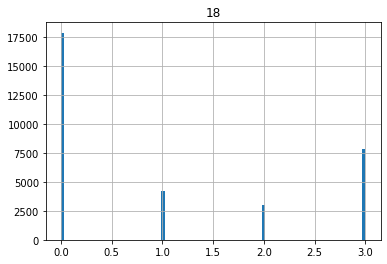

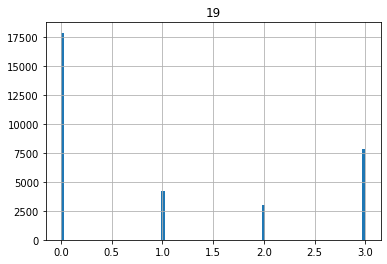

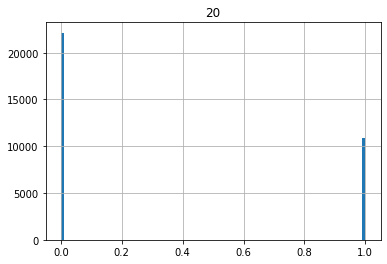

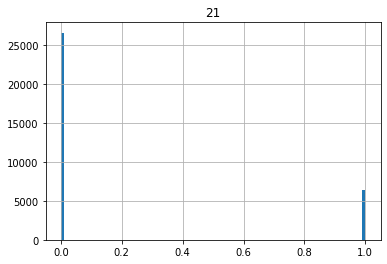

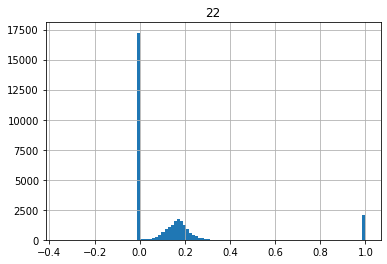

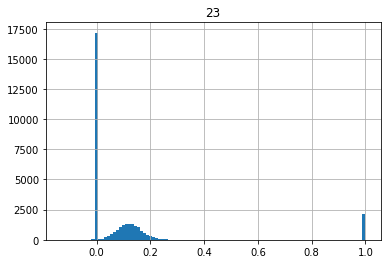

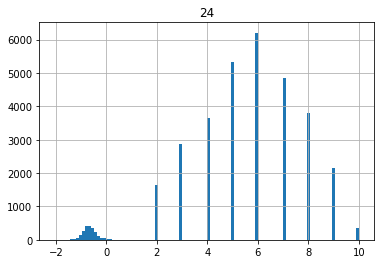

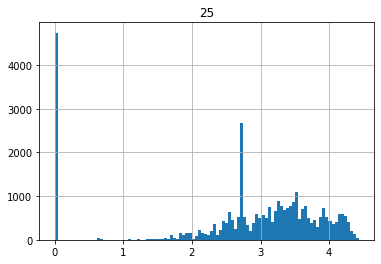

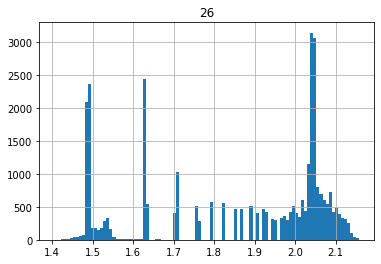

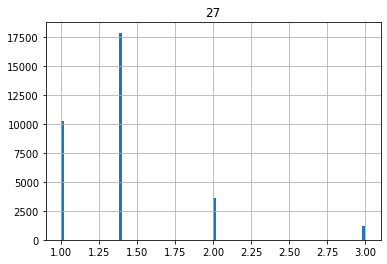

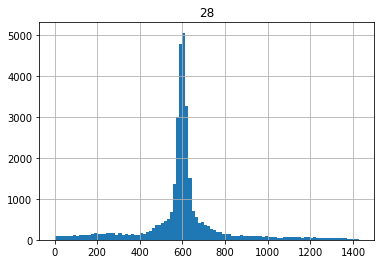

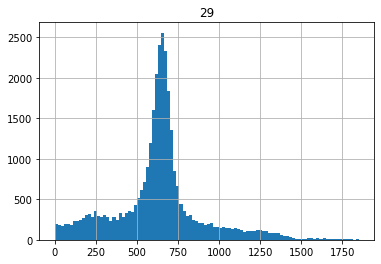

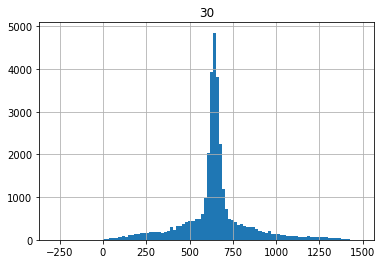

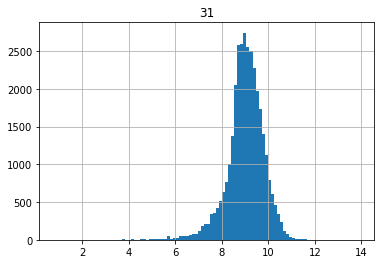

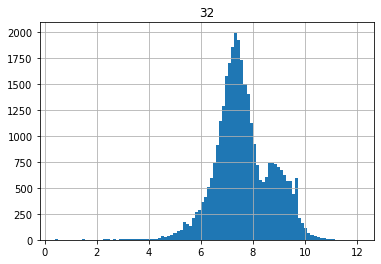

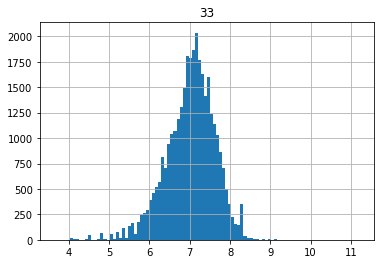

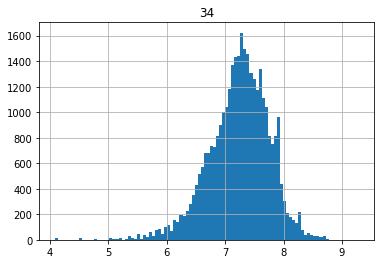

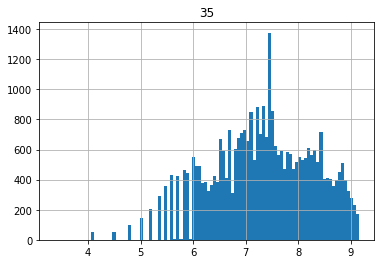

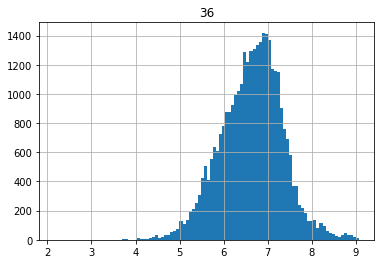

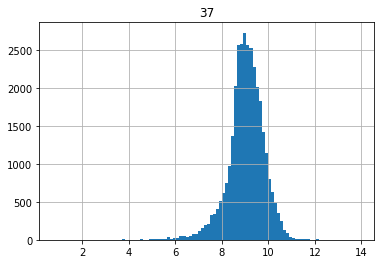

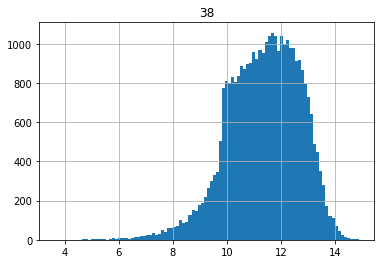

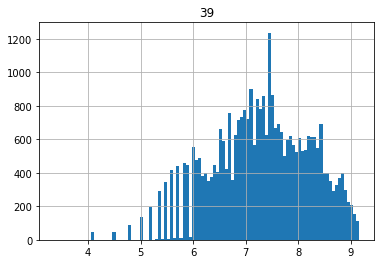

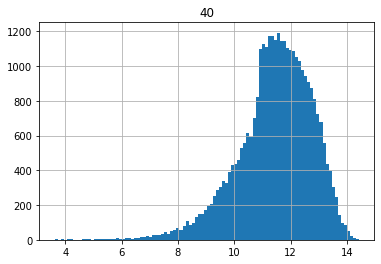

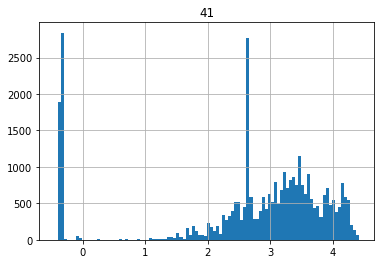

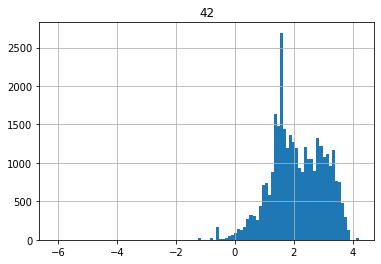

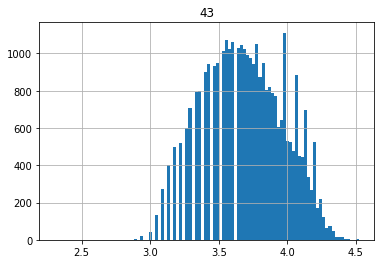

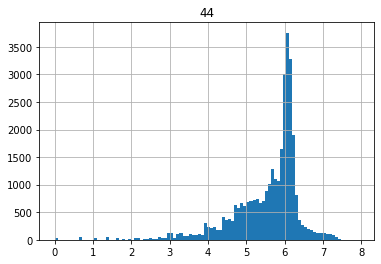

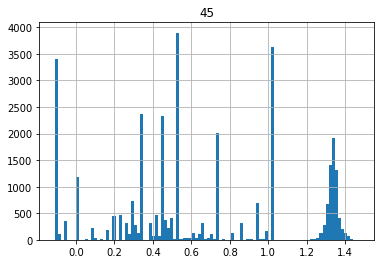

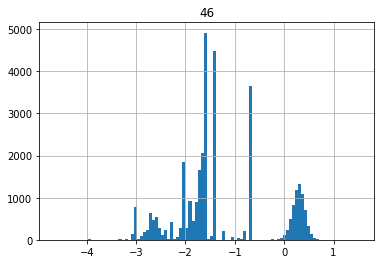

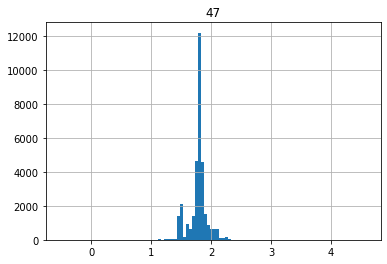

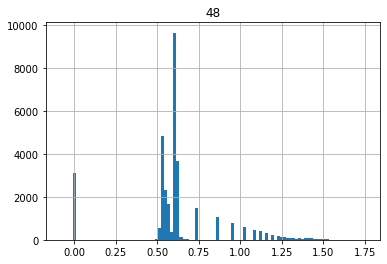

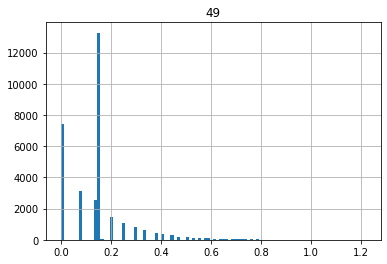

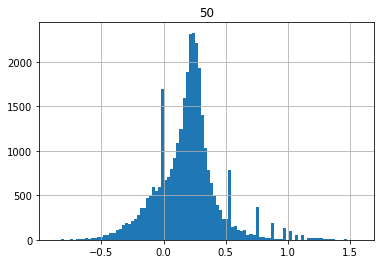

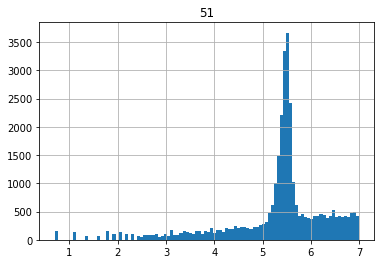

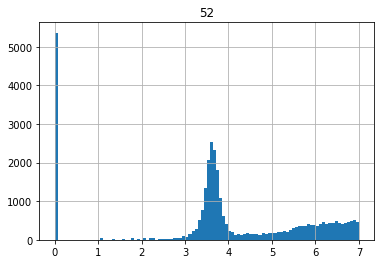

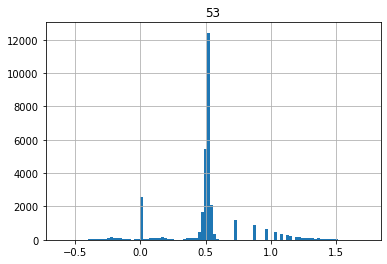

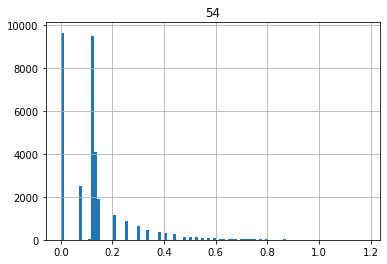

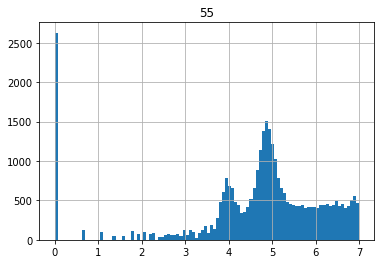

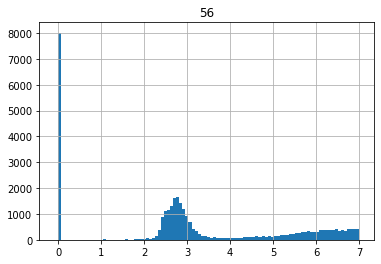

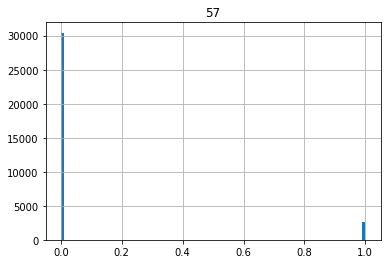

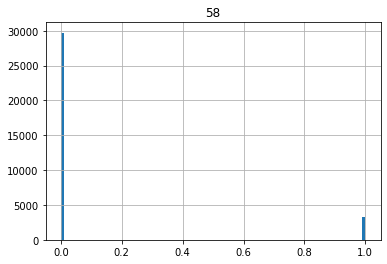

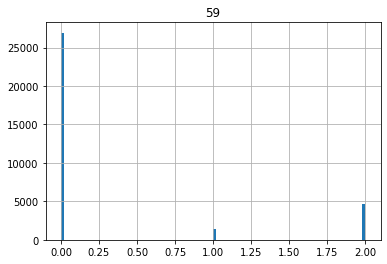

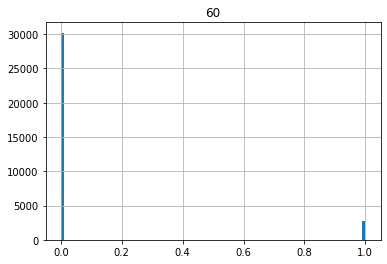

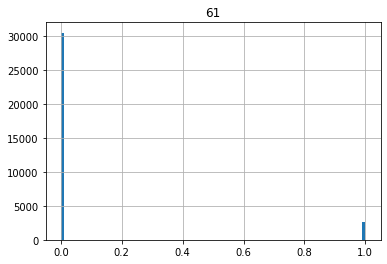

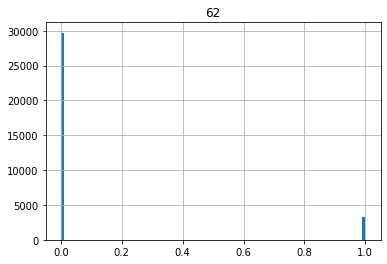

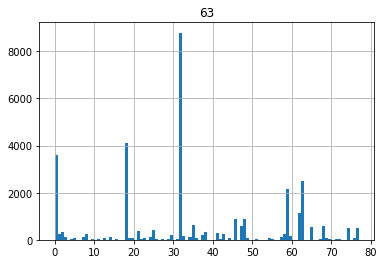

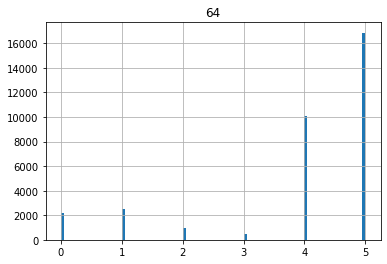

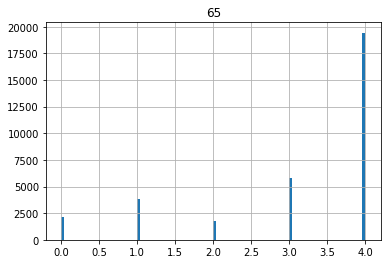

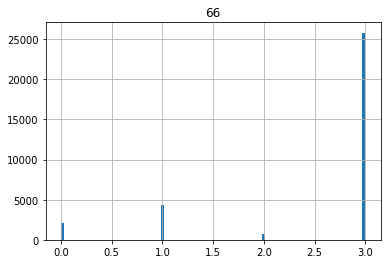

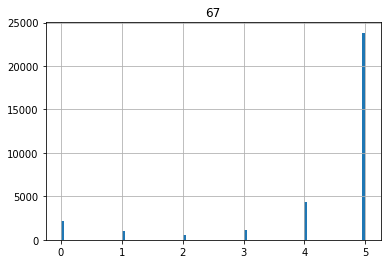

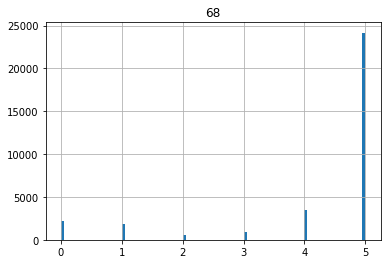

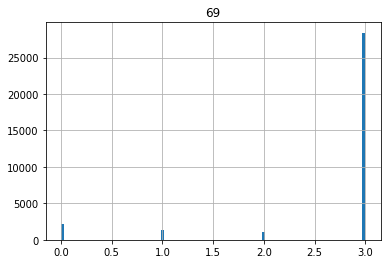

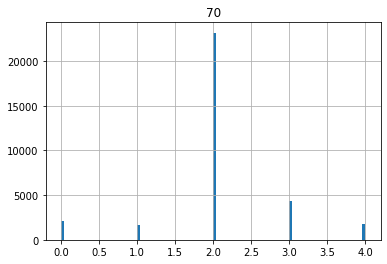

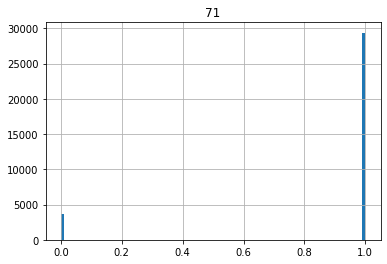

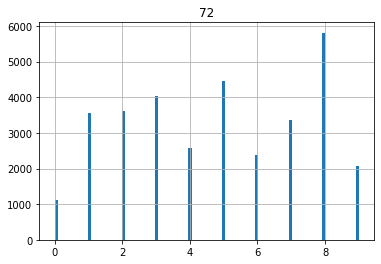

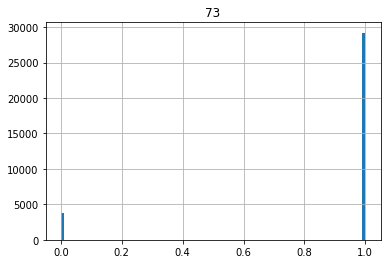

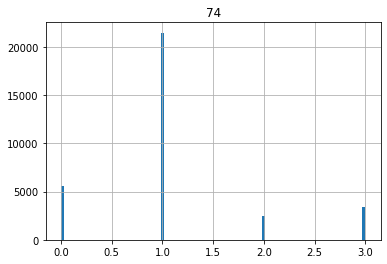

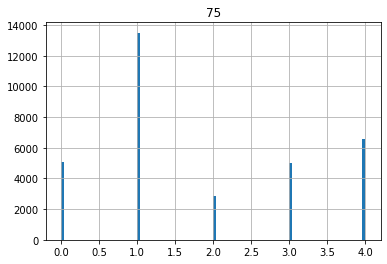

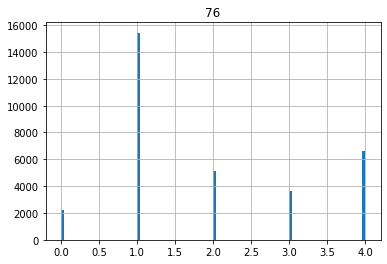

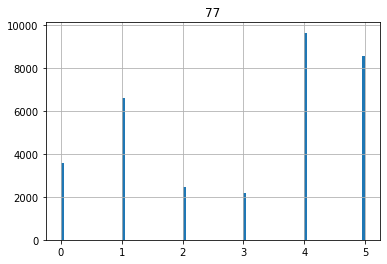

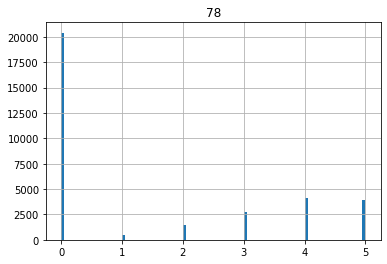

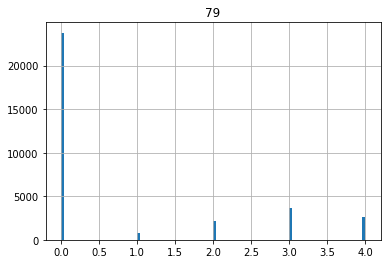

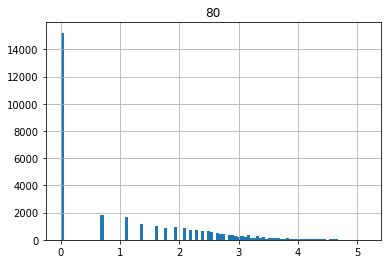

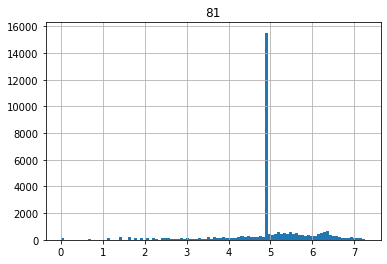

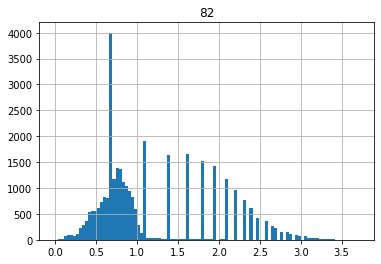

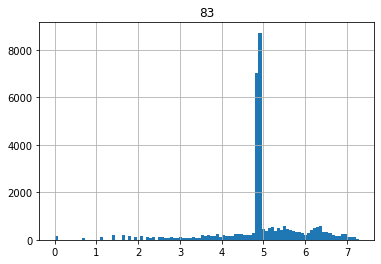

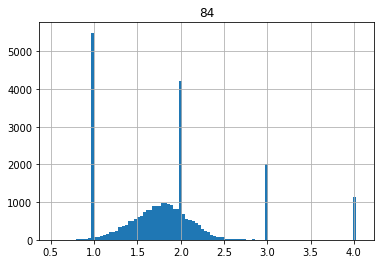

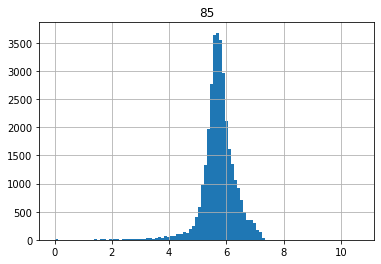

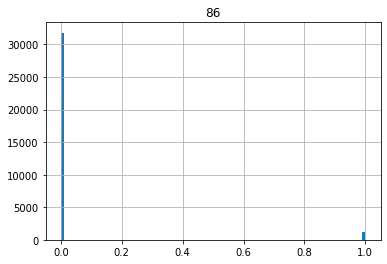

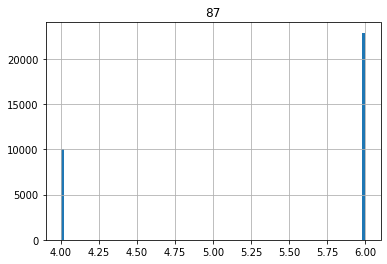

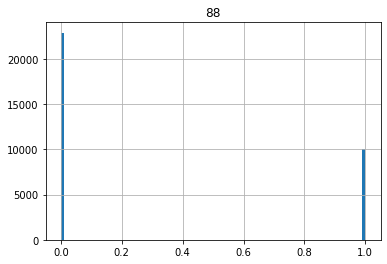

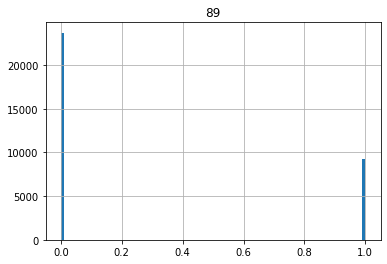

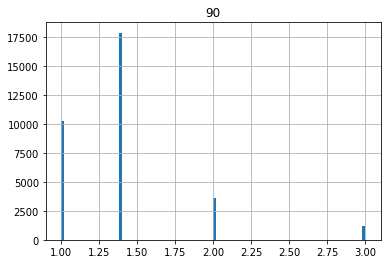

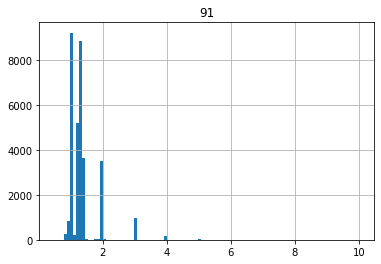

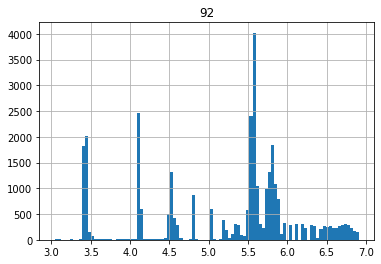

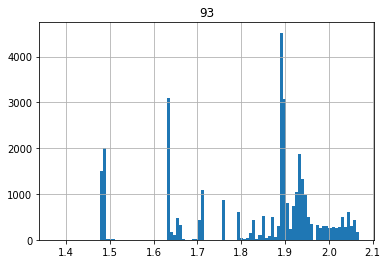

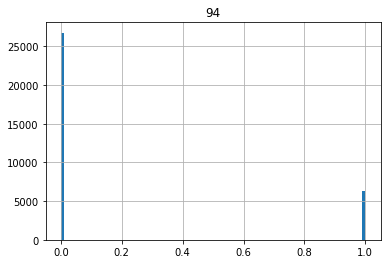

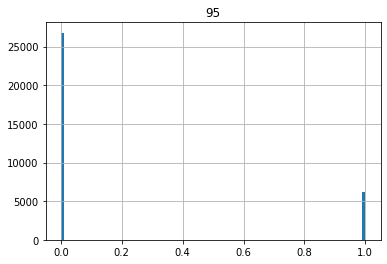

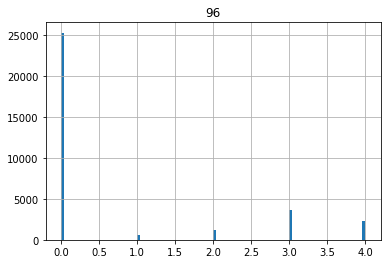

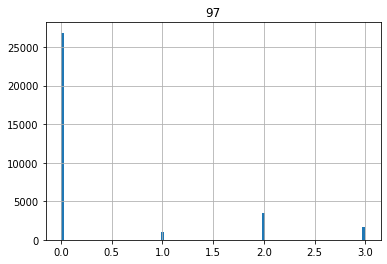

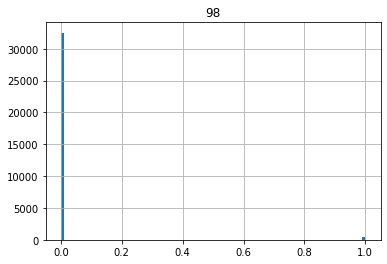

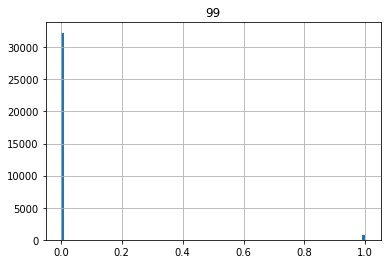

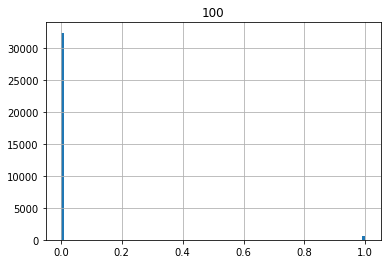

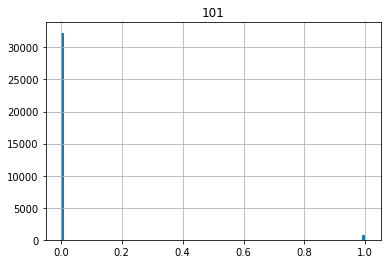

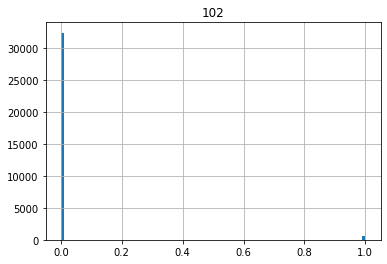

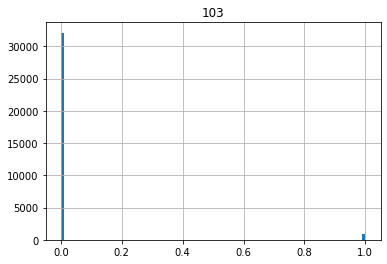

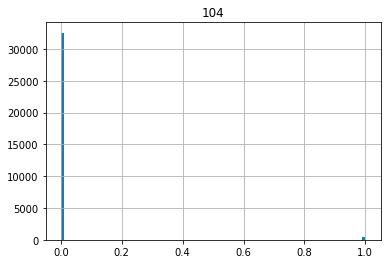

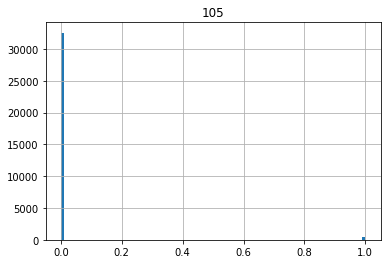

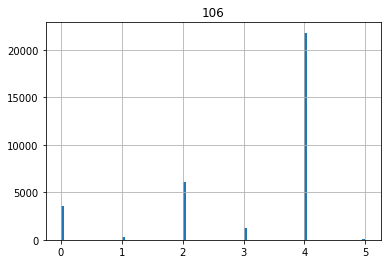

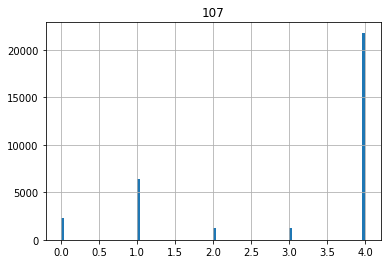

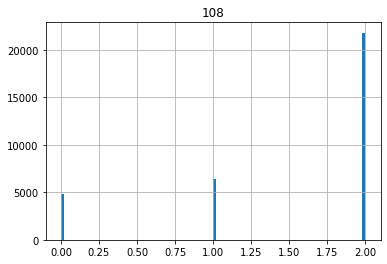

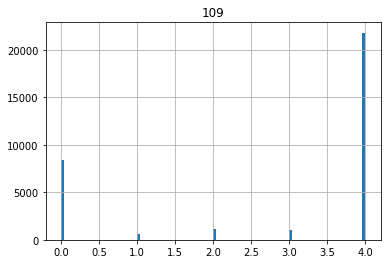

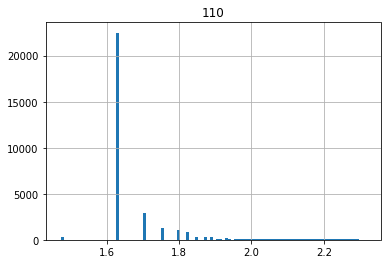

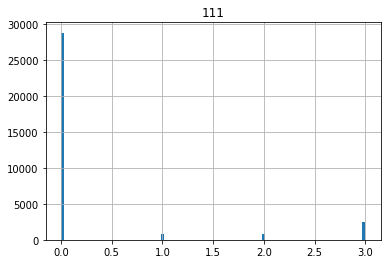

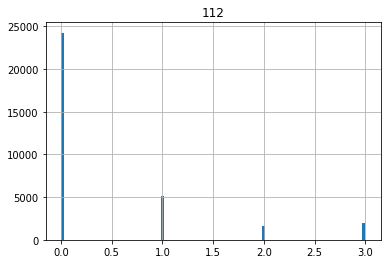

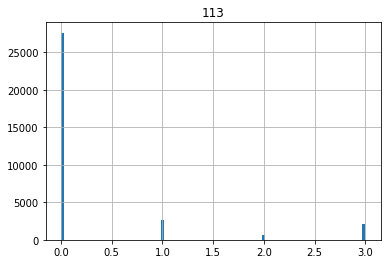

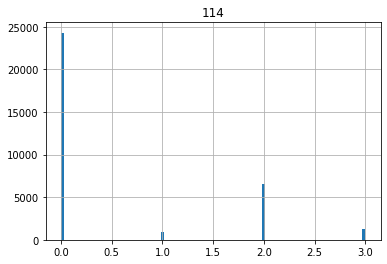

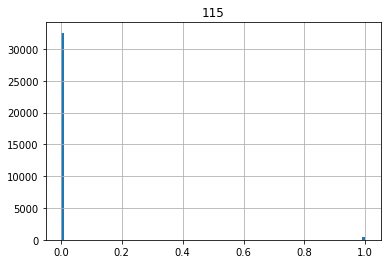

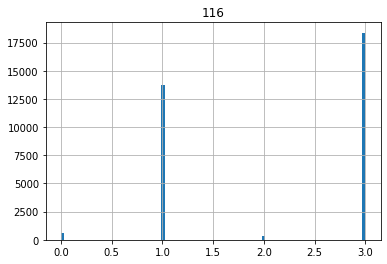

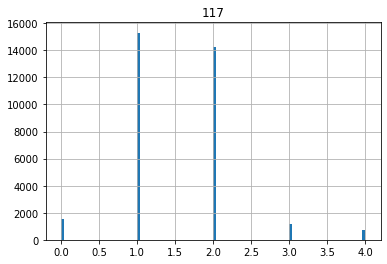

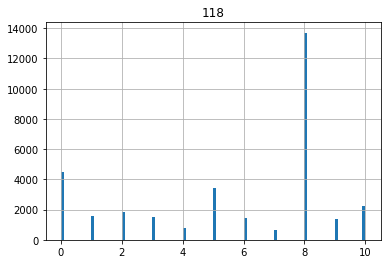

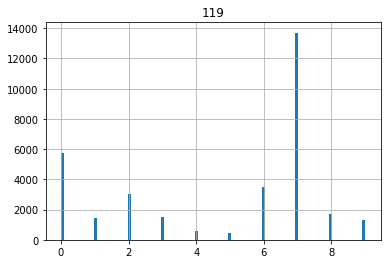

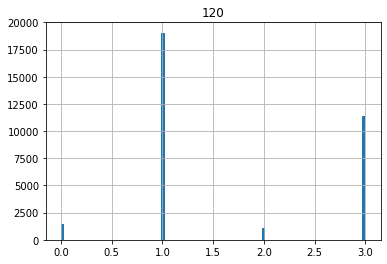

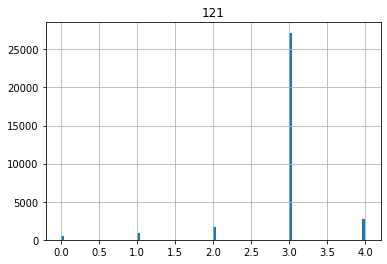

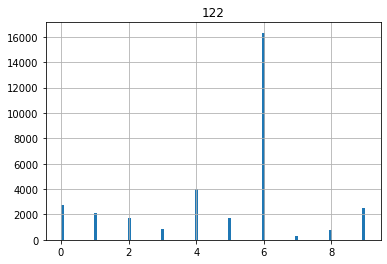

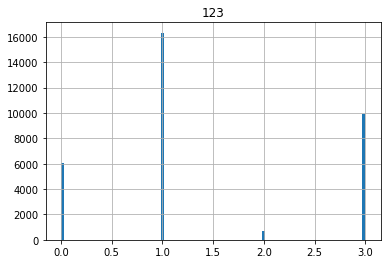

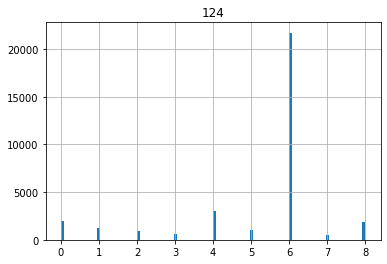

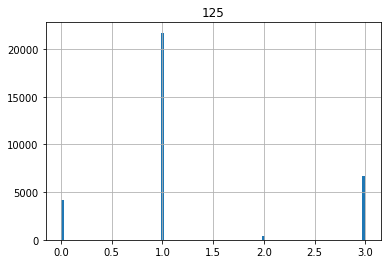

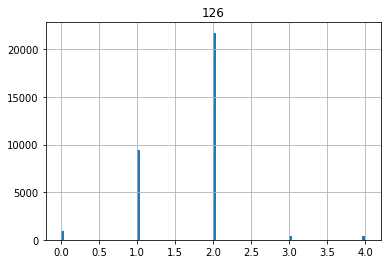

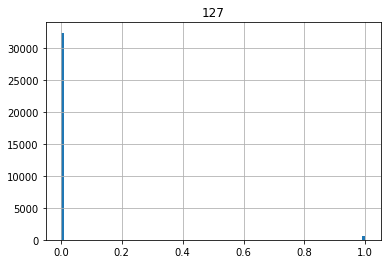

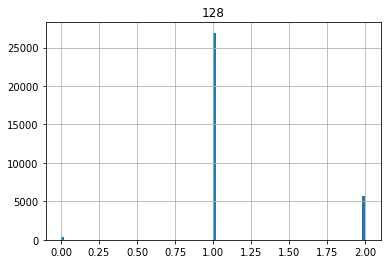

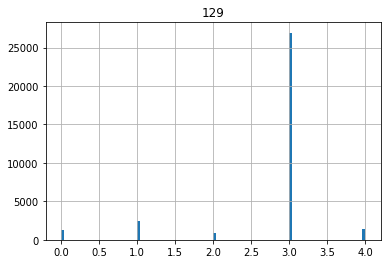

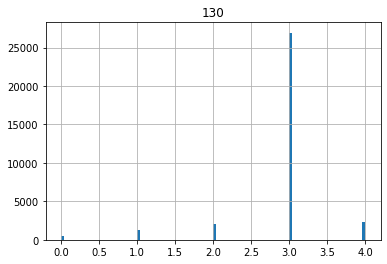

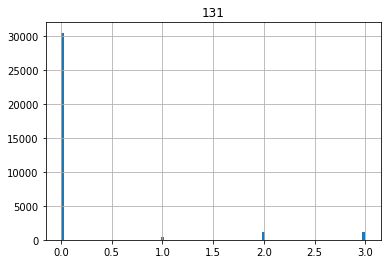

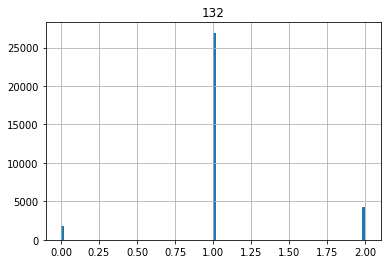

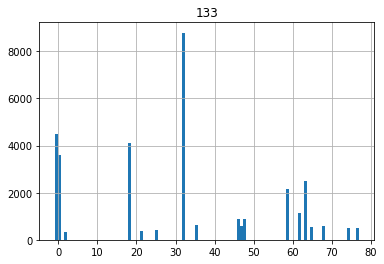

In [69]:
for col in imputed_x.columns: 
    try:      
        imputed_x[col] = pd.to_numeric(imputed_x[col]) 
        imputed_x.hist(column=col, bins=100)
    except ValueError:
        print('This column can not be represented as a histogram')

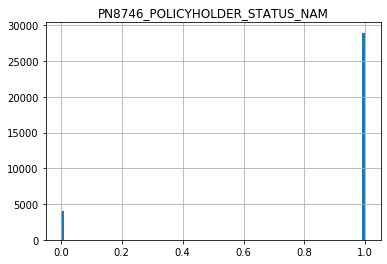

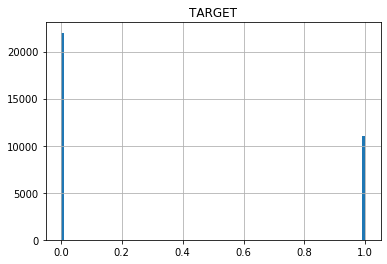

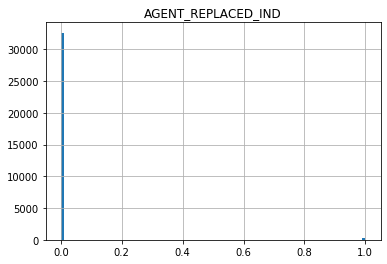

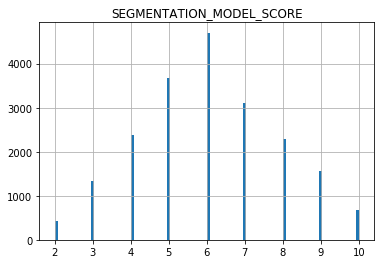

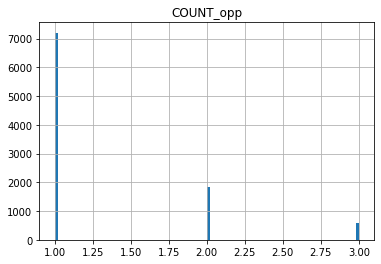

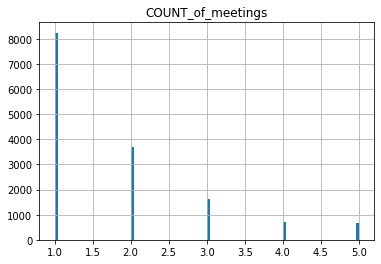

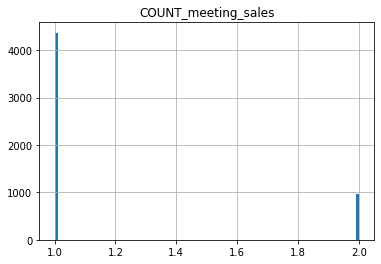

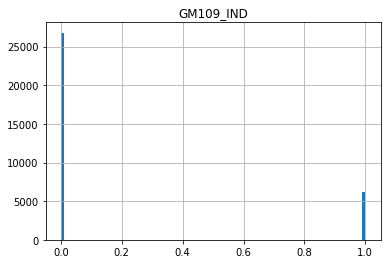

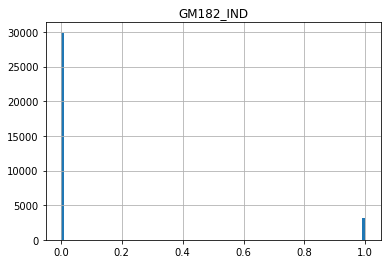

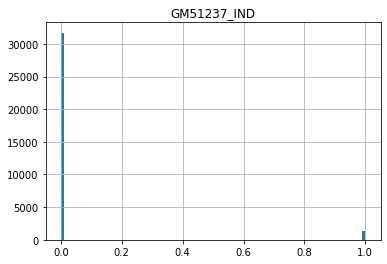

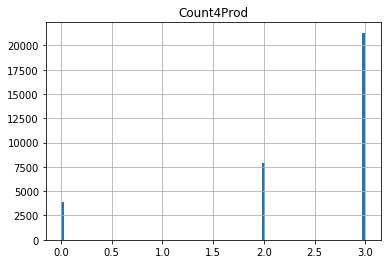

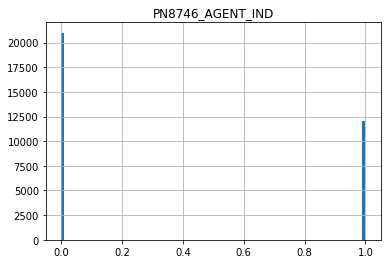

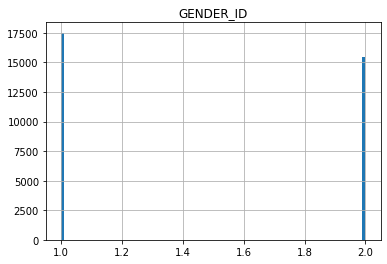

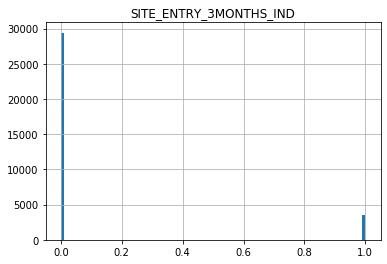

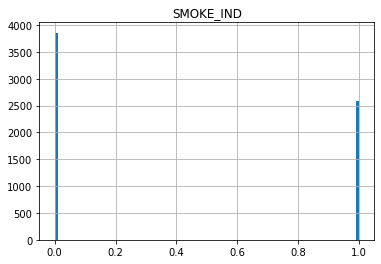

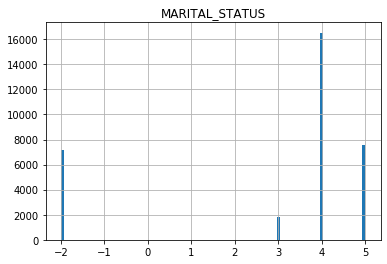

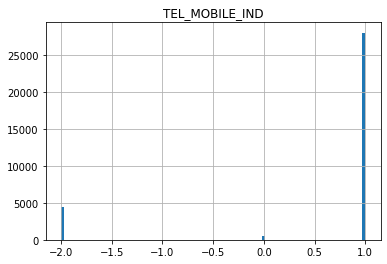

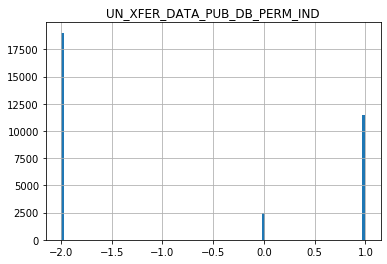

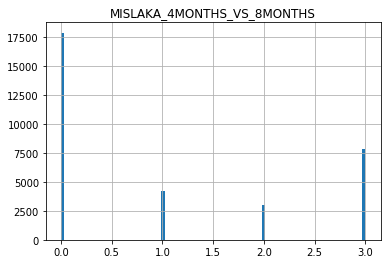

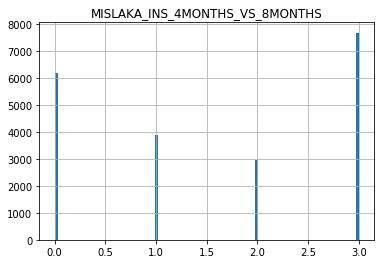

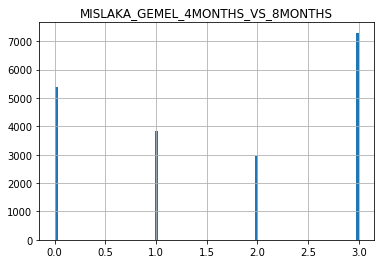

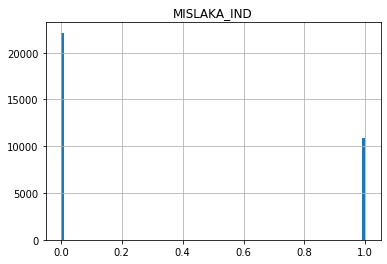

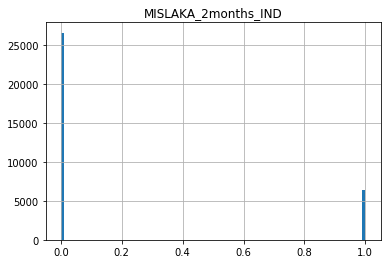

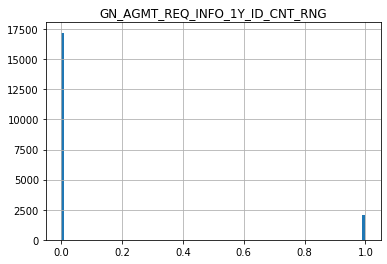

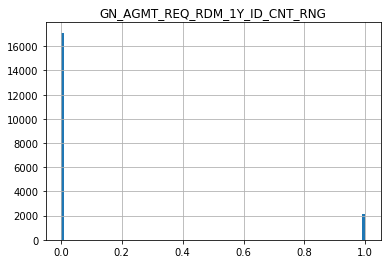

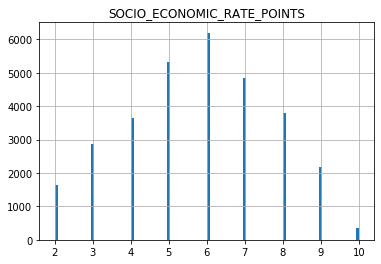

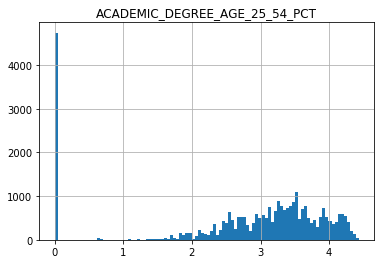

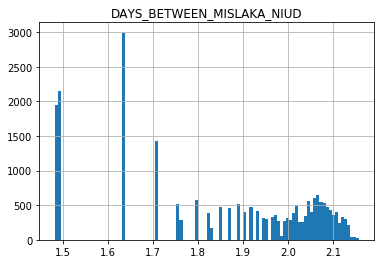

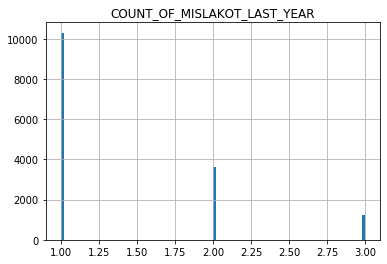

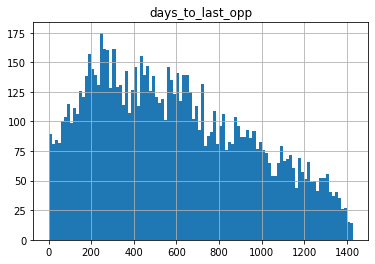

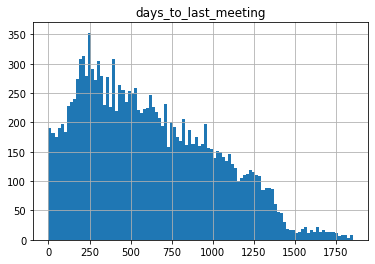

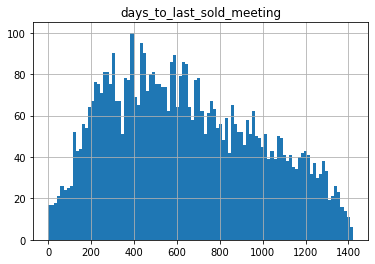

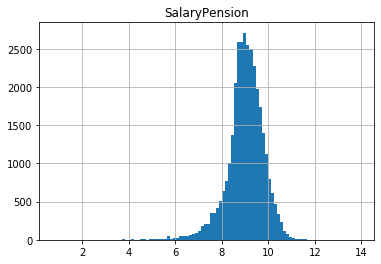

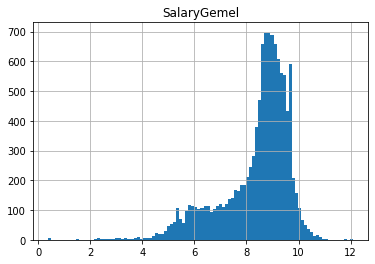

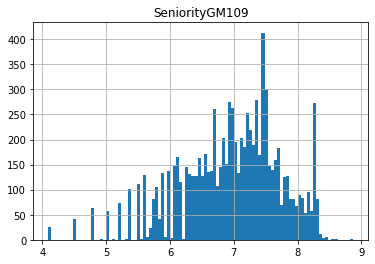

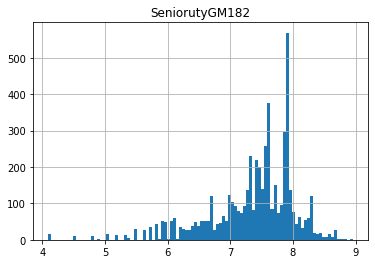

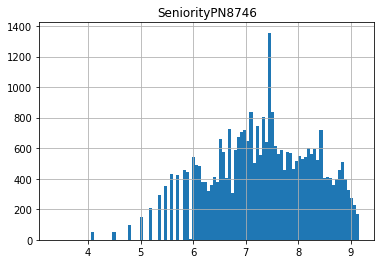

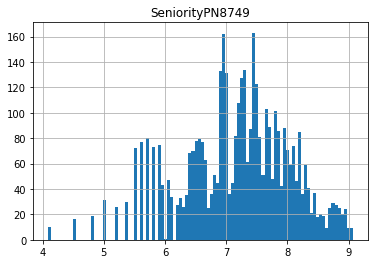

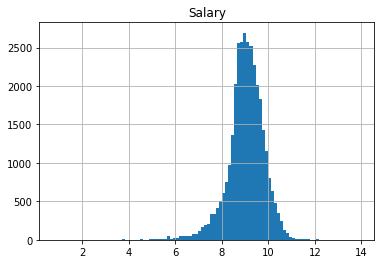

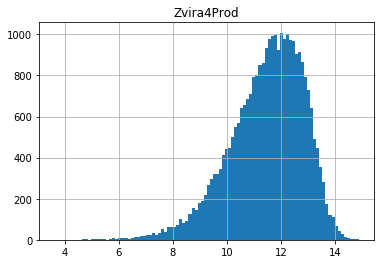

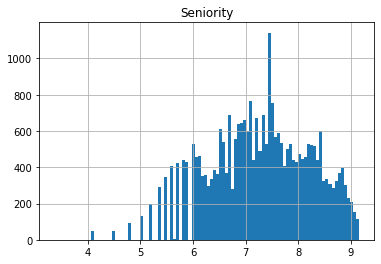

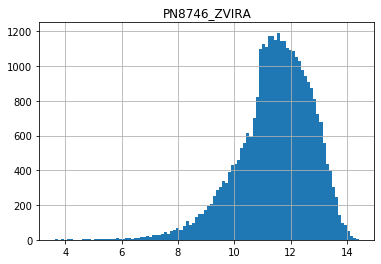

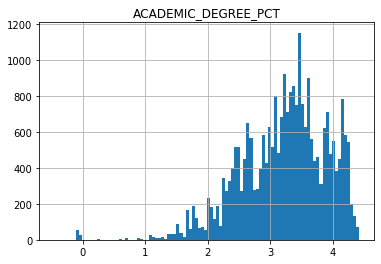

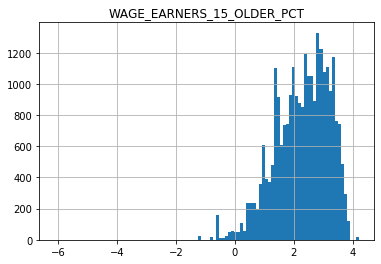

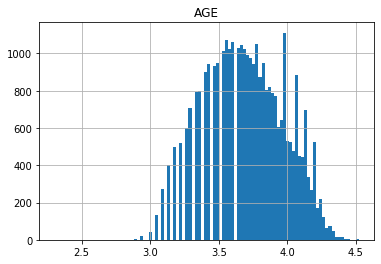

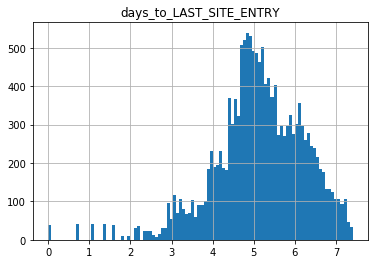

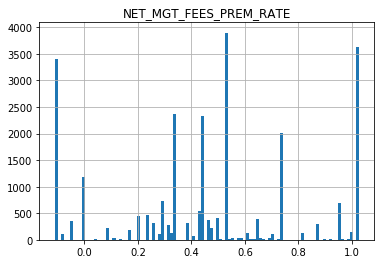

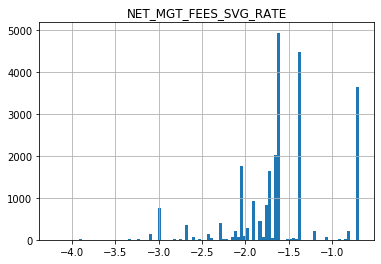

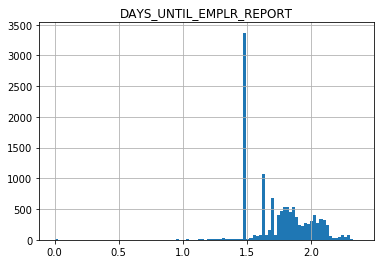

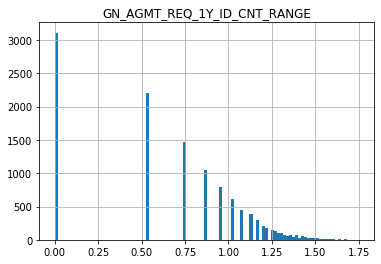

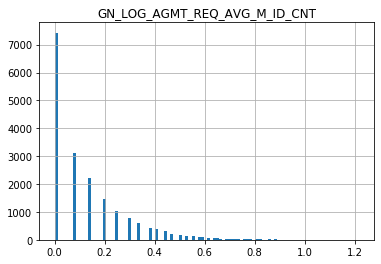

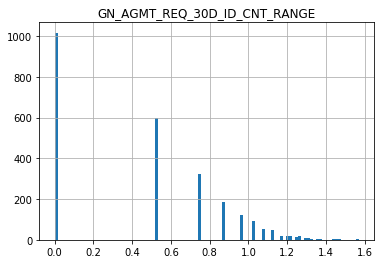

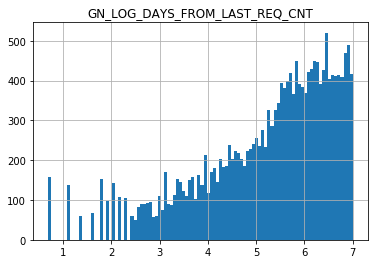

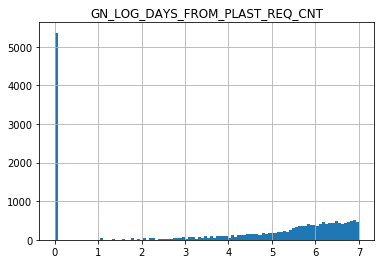

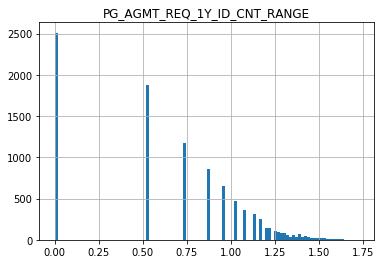

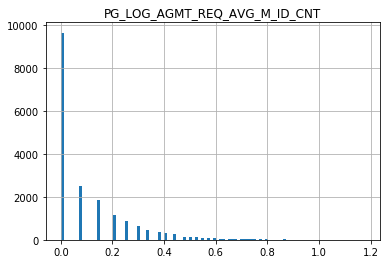

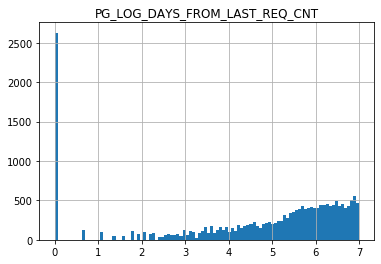

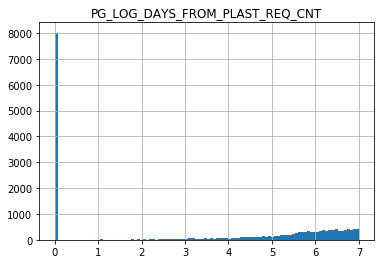

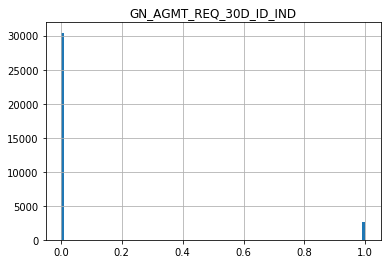

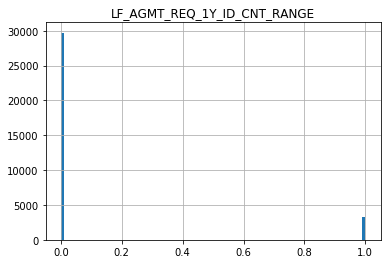

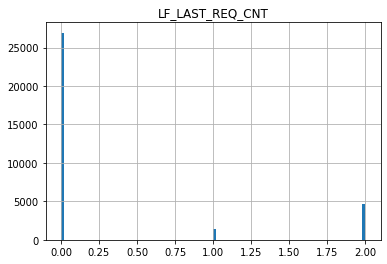

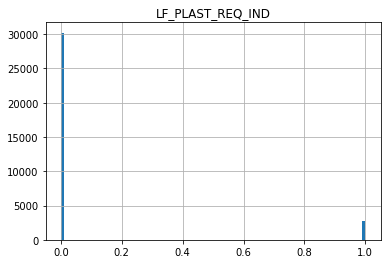

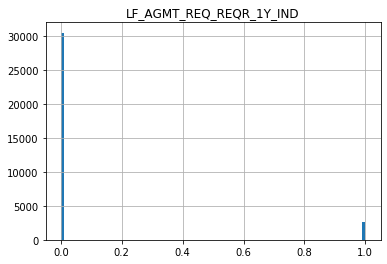

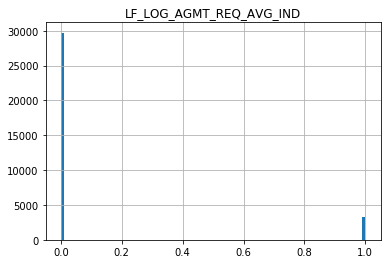

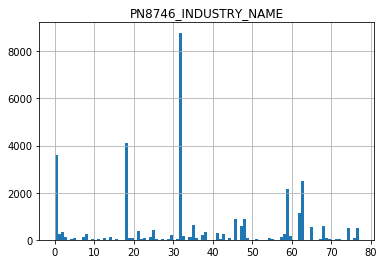

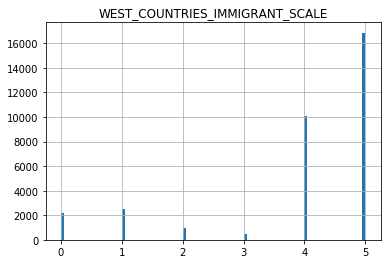

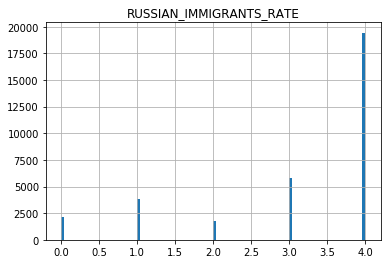

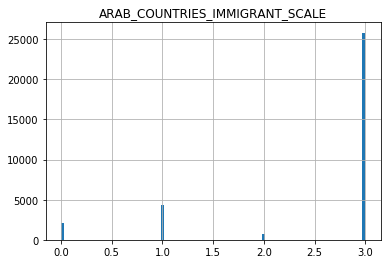

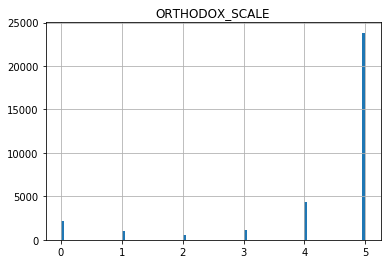

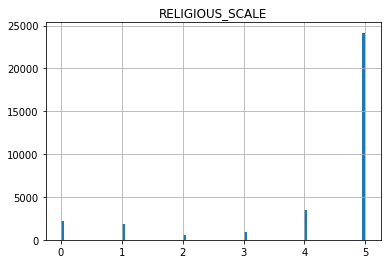

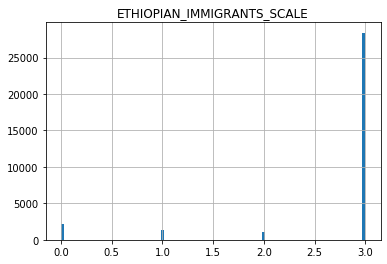

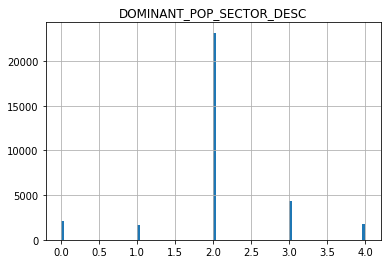

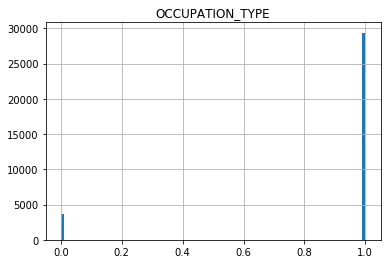

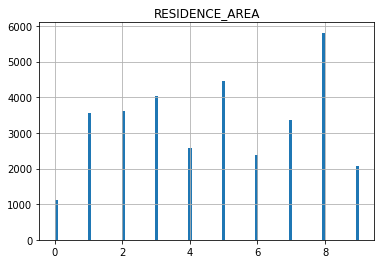

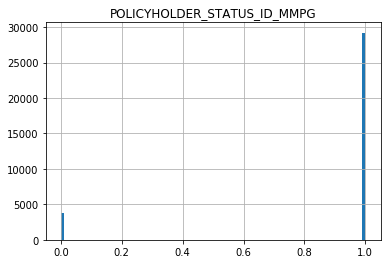

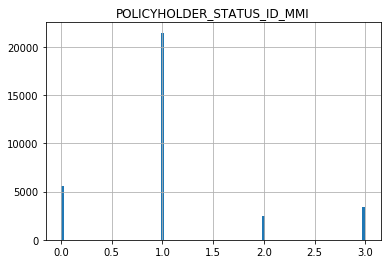

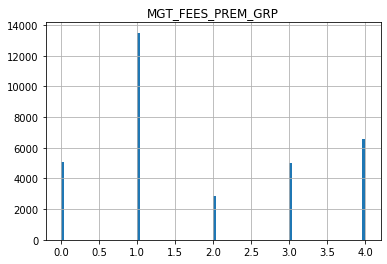

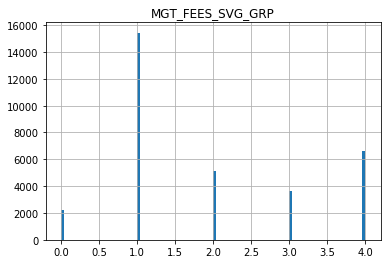

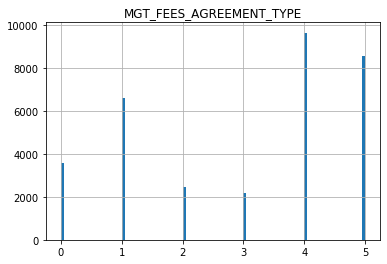

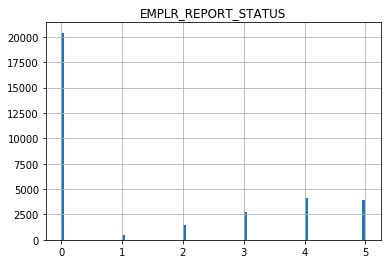

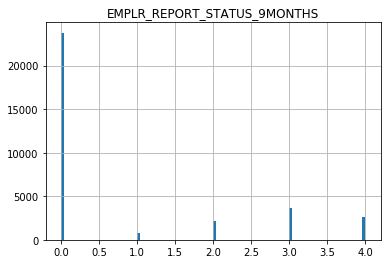

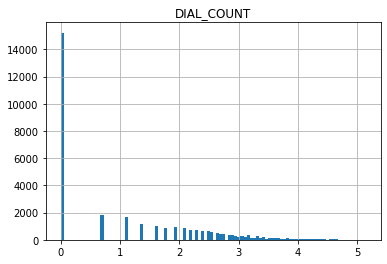

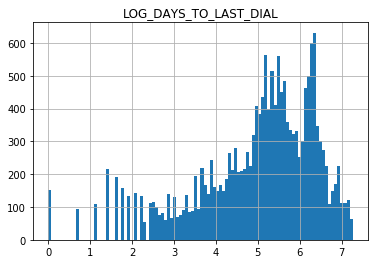

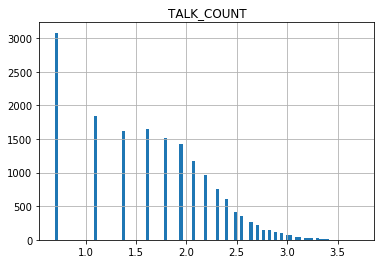

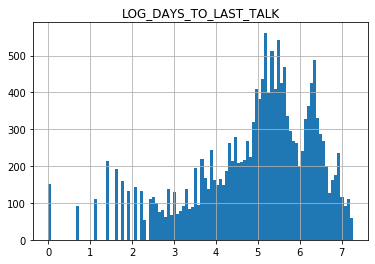

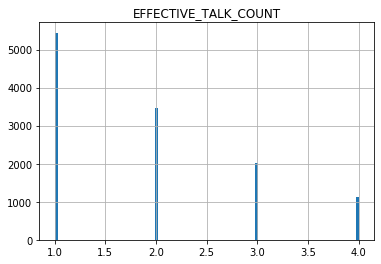

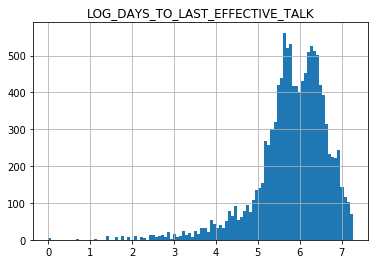

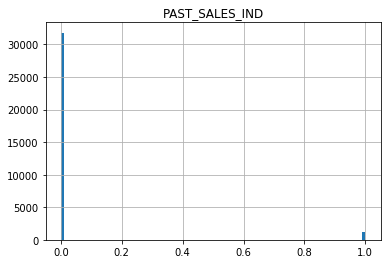

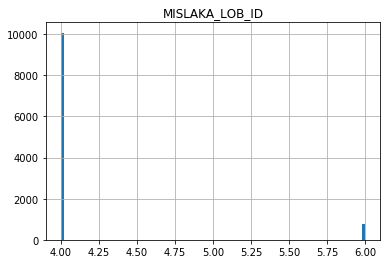

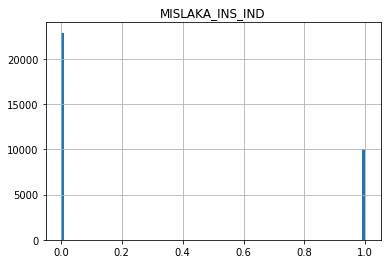

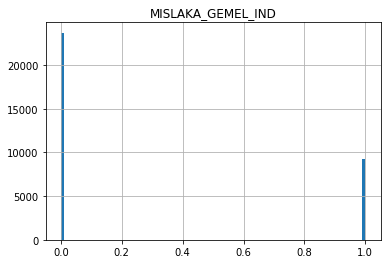

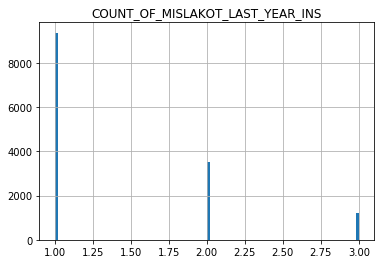

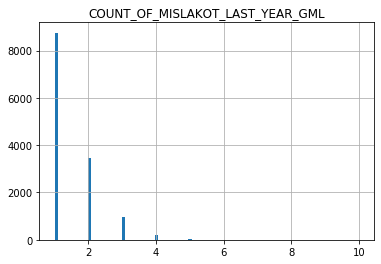

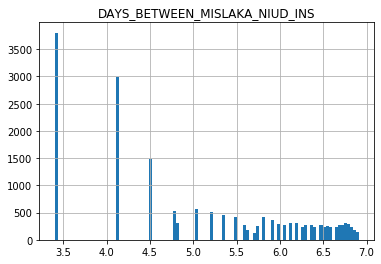

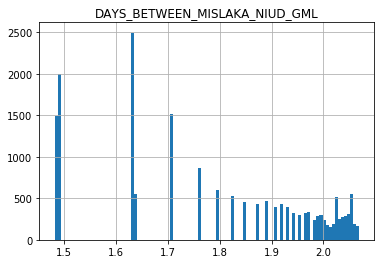

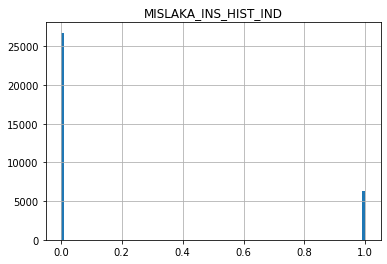

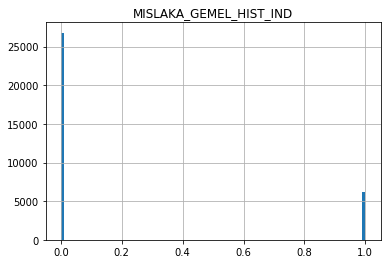

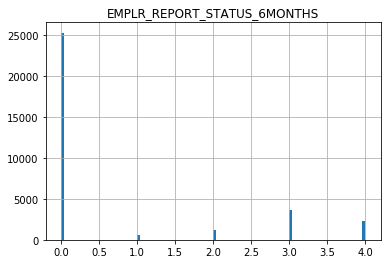

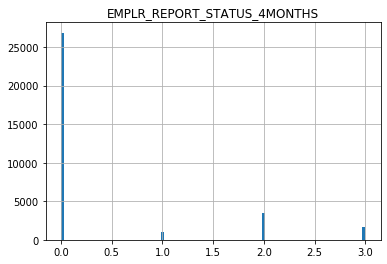

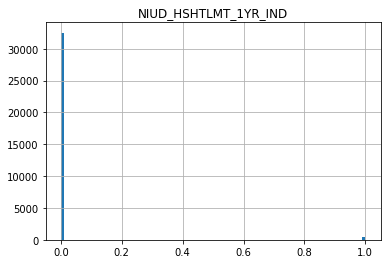

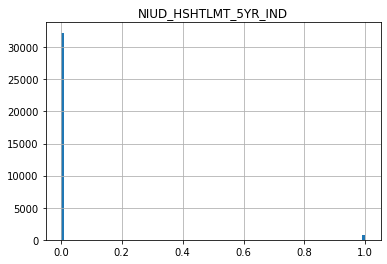

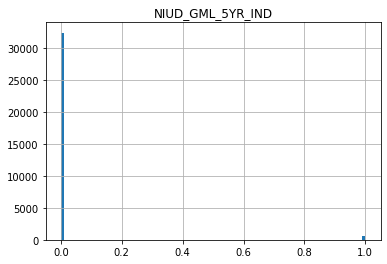

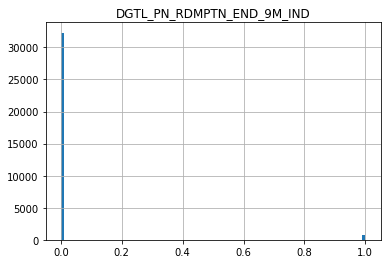

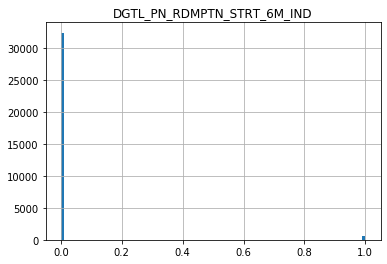

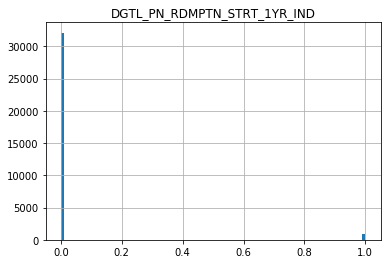

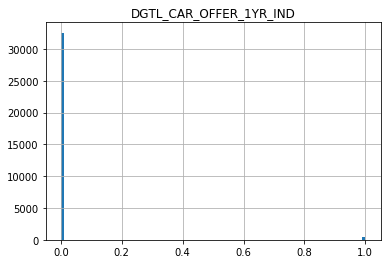

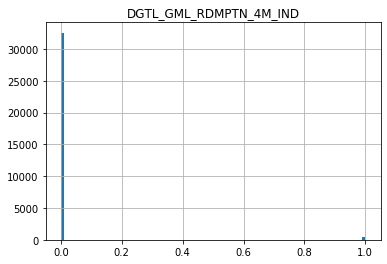

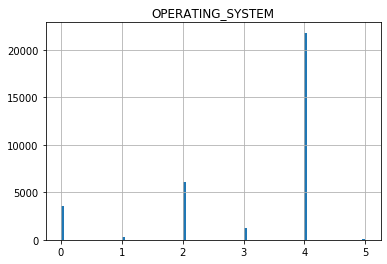

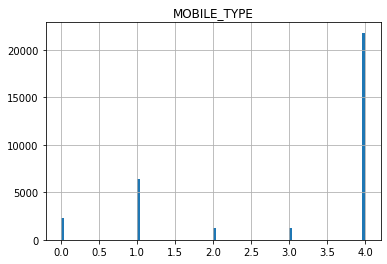

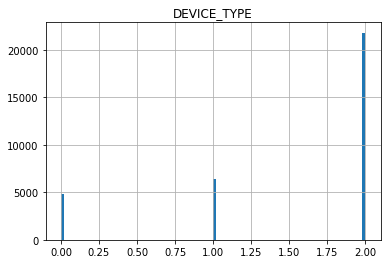

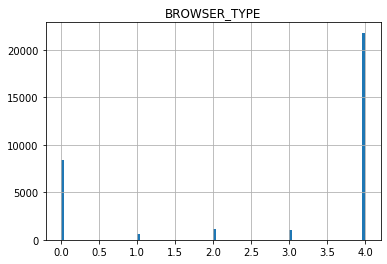

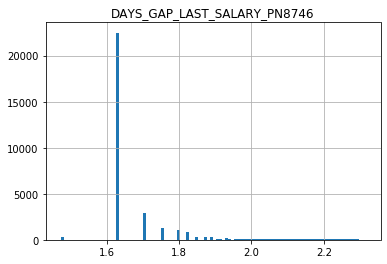

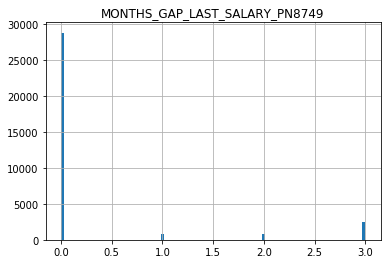

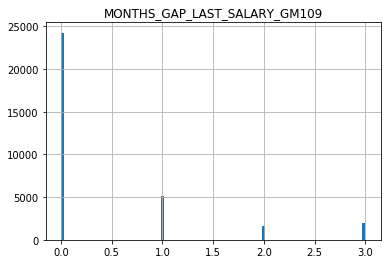

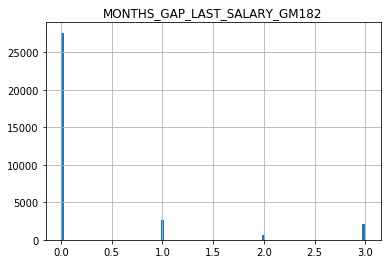

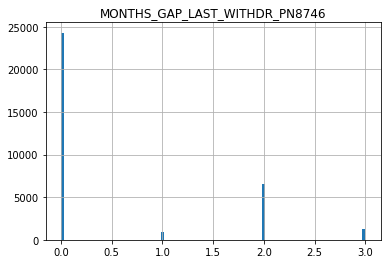

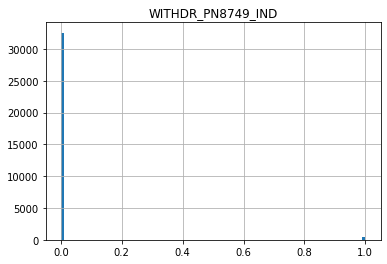

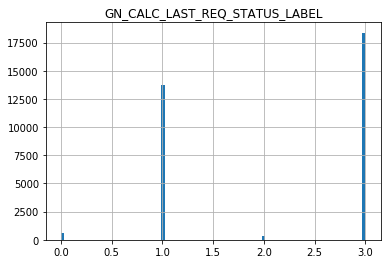

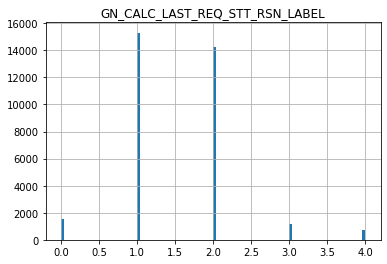

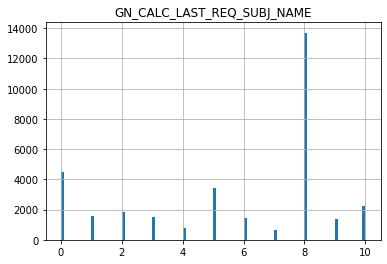

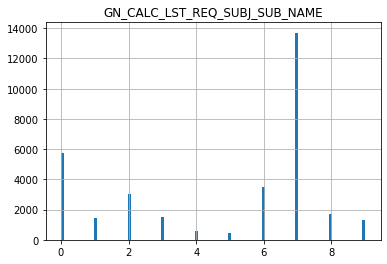

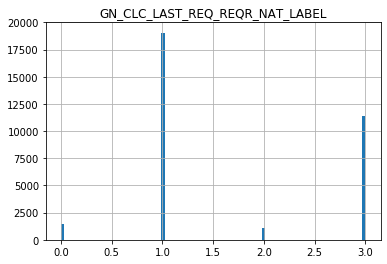

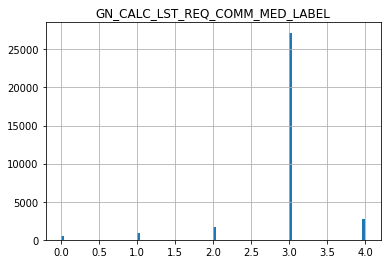

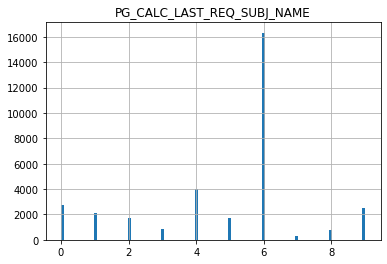

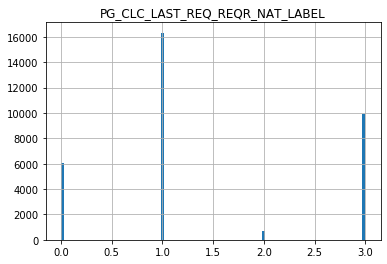

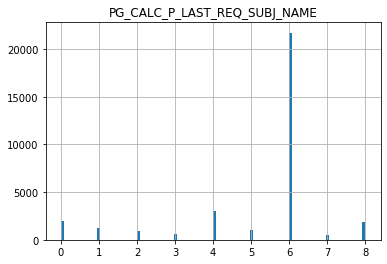

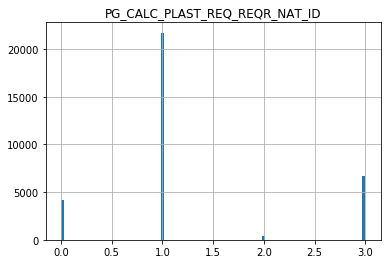

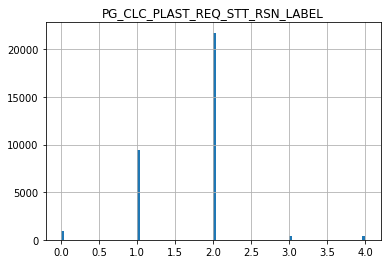

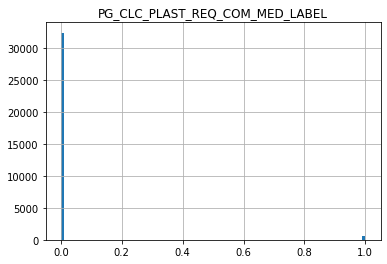

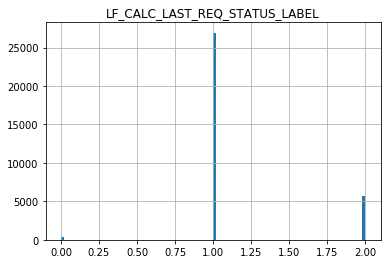

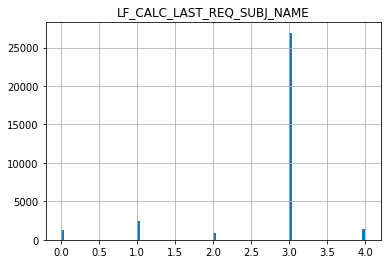

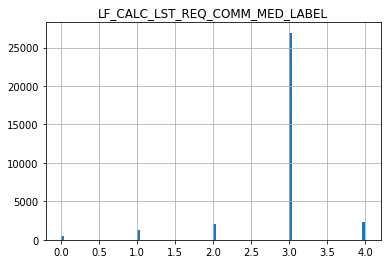

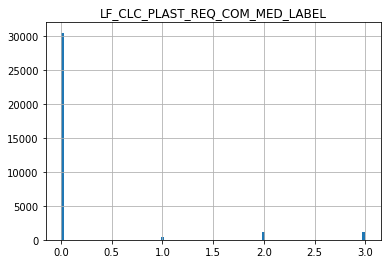

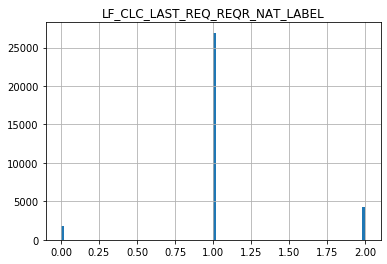

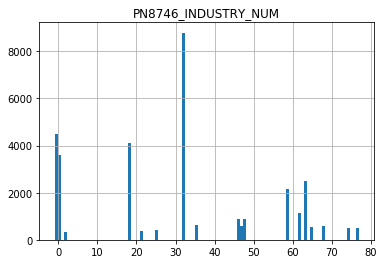

In [70]:
for col in df.columns: 
    try:      
        df[col] = pd.to_numeric(df[col]) 
        df.hist(column=col, bins=100)
    except ValueError:
        print('This column can not be represented as a histogram')

In [71]:
df['IMP_SEGMENTATION_MODEL_SCORE']=imputed_x[2]
df['IMP_DAYS_BETWEEN_MISLAKA_NIUD']=imputed_x[26]
df['IMP_SalaryPension']=imputed_x[31]
df['IMP_SeniorityPN8746']=imputed_x[35]
df['IMP_NET_MGT_FEES_SVG_RATE']=imputed_x[46]
df['IMP_PG_LOG_AGMT_REQ_AVG_M_ID_CNT']=imputed_x[54]
df['IMP_ACADEMIC_DEGREE_AGE_25_54_PCT']=imputed_x[25]
df['IMP_SalaryGemel']=imputed_x[32]
df['IMP_ACADEMIC_DEGREE_PCT']=imputed_x[41]
df['IMP_NET_MGT_FEES_PREM_RATE']=imputed_x[45]
df['IMP_GN_LOG_AGMT_REQ_AVG_M_ID_CNT']=imputed_x[49]
df['IMP_PG_LOG_DAYS_FROM_LAST_REQ_CNT']=imputed_x[55]
df['IMP_SeniorityGM109']=imputed_x[33]
df['IMP_Salary']=imputed_x[37]
df['IMP_WAGE_EARNERS_15_OLDER_PCT']=imputed_x[42]
df['IMP_Zvira4Prod']=imputed_x[38]
df['IMP_Seniority']=imputed_x[39]

In [72]:
#with pd.option_context('display.max_columns', None):
 #   print(df.columns.values)
#df.info()

In [73]:
#############  AUTOMATED FEATURE TRANSFORMATION  ##################
#import featuretools as ft
# Create new features using specified primitives
#features, feature_names = ft.dfs(entityset = es, target_entity = 'clients', 
 #                                agg_primitives = ['mean', 'max', 'percent_true', 'last'],
  #                               trans_primitives = ['years', 'month', 'subtract', 'divide'])


In [74]:
############## FEATURE SELECTION  ##############

In [75]:
cor=df[df.columns[1:]].corr()['TARGET'][:].sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(cor)

TARGET                               1.000000
MISLAKA_4MONTHS_VS_8MONTHS           0.726660
MISLAKA_IND                          0.724321
MISLAKA_INS_IND                      0.707274
MISLAKA_GEMEL_IND                    0.680975
MISLAKA_INS_4MONTHS_VS_8MONTHS       0.663099
MISLAKA_GEMEL_4MONTHS_VS_8MONTHS     0.656696
MISLAKA_2months_IND                  0.520080
EMPLR_REPORT_STATUS_6MONTHS          0.435949
EMPLR_REPORT_STATUS_4MONTHS          0.435135
EMPLR_REPORT_STATUS_9MONTHS          0.420302
EMPLR_REPORT_STATUS                  0.380579
MISLAKA_INS_HIST_IND                 0.209258
MISLAKA_GEMEL_HIST_IND               0.208842
DAYS_GAP_LAST_SALARY_PN8746          0.158491
COUNT_OF_MISLAKOT_LAST_YEAR          0.145404
NIUD_HSHTLMT_1YR_IND                 0.138012
SITE_ENTRY_3MONTHS_IND               0.134336
LF_AGMT_REQ_1Y_ID_CNT_RANGE          0.131510
LF_LOG_AGMT_REQ_AVG_IND              0.131510
NIUD_HSHTLMT_5YR_IND                 0.131235
GN_AGMT_REQ_30D_ID_IND            

In [76]:
df = df.drop(columns=[
    'DGTL_CAR_OFFER_1YR_IND',
    'MGT_FEES_PREM_GRP',
    'PN8746_ZVIRA',
    'PG_CLC_PLAST_REQ_COM_MED_LABEL',
    'GM51237_IND',
    'PG_AGMT_REQ_1Y_ID_CNT_RANGE',
    'GN_AGMT_REQ_INFO_1Y_ID_CNT_RNG',
    'ACADEMIC_DEGREE_AGE_25_54_PCT',
    'IMP_ACADEMIC_DEGREE_AGE_25_54_PCT',
    'ORTHODOX_SCALE',
    'IMP_NET_MGT_FEES_PREM_RATE',
    'IMP_ACADEMIC_DEGREE_PCT',
    'GN_AGMT_REQ_RDM_1Y_ID_CNT_RNG',
    'DIAL_COUNT',
    'GN_AGMT_REQ_1Y_ID_CNT_RANGE',
    'ETHIOPIAN_IMMIGRANTS_SCALE',
    'MONTHS_GAP_LAST_SALARY_GM182',
    'GN_LOG_DAYS_FROM_PLAST_REQ_CNT',
    'PG_LOG_DAYS_FROM_PLAST_REQ_CNT',
    'Zvira4Prod',
    'GM109_IND',
    'SeniorutyGM182',
    'EFFECTIVE_TALK_COUNT',
    'PAST_SALES_IND',
    'OCCUPATION_TYPE',
    'LOG_DAYS_TO_LAST_TALK',
    'LOG_DAYS_TO_LAST_DIAL',
    'RELIGIOUS_SCALE',
    'SMOKE_IND',
    'LOG_DAYS_TO_LAST_EFFECTIVE_TALK',
    'IMP_SeniorityGM109'
])

In [77]:
#from sklearn.feature_selection import chi2
#X = df.drop('TARGET',axis=1)
#y = df['TARGET']
#label_encoder = LabelEncoder()
#m = pd.DataFrame(label_encoder.fit_transform(X))
#chi_scores = chi2(X,y)
#chi_scores

In [78]:
#X = df.drop('TARGET',axis=1)
#y = df['TARGET']
#from sklearn.feature_selection import RFE
#from sklearn.tree import DecisionTreeClassifier
## define the method
#rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
## fit the model
#rfe.fit(X, y)
## transform the data
#X, y = rfe.transform(X, y) 

In [79]:
################## ALGORITHMS ##################

In [80]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split
arrayT = np.nan_to_num(df['TARGET'].values)
arrayF = np.nan_to_num(df.drop(columns=['TARGET']).values)
X = arrayF
y = arrayT
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

In [81]:
######### RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf.fit(X_train, Y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(X_validation)

In [82]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_validation, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_validation, y_pred)))

Mean Absolute Error: 0.13806848484848486
Root Mean Squared Error: 0.2575546940050606


In [83]:
rf_cv_score = cross_val_score(rf, X, y, cv=10, scoring='roc_auc')
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())

NameError: name 'y_test' is not defined

In [ ]:
########### LOGISSTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,Y_train)
y_pred=logistic_regression.predict(X_validation)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_validation, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_validation, y_pred)))
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'r2'
results = model_selection.cross_val_score(Linear_regression, X, y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

In [ ]:
confusion_matrix = pd.crosstab(Y_validation, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

In [ ]:
########### XGBOOST
from numpy import loadtxt
from xgboost import XGBClassifier
# fit model no training data
XGB = XGBClassifier()
XGB.fit(X_train, Y_train)
y_pred=XGB.predict(X_validation)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_validation, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_validation, y_pred)))
print('Accuracy: ',metrics.accuracy_score(Y_validation, y_pred))
plt.show()

In [ ]:
confusion_matrix = pd.crosstab(Y_validation, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

In [ ]:
XGB_TUNED = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.9,
                      objective='binary:logistic', 
                      n_estimators=900, 
                      reg_alpha = 0.3,
                      max_depth=5, 
                      gamma=10)
XGB_TUNED.fit(X_train, Y_train)
y_pred=XGB_TUNED.predict(X_validation)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_validation, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_validation, y_pred)))
print('Accuracy: ',metrics.accuracy_score(Y_validation, y_pred))
plt.show()

In [ ]:
confusion_matrix = pd.crosstab(Y_validation, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

In [ ]:
########### NEURAL NETWORKS
#from sklearn.neural_network import MLPClassifier
#from sklearn.neural_network import MLPRegressor
#mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
#mlp.fit(X_train,Y_train)
##predict_train = mlp.predict(X_train)
#y_pred=mlp.predict(X_validation)
##print(confusion_matrix(Y_train,predict_train))
##print(classification_report(Y_train,predict_train))
#print(confusion_matrix(Y_validation,y_pred))
#print(classification_report(Y_validation,y_pred))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import model_selection
Linear_regression= LinearRegression()
Linear_regression.fit(X_train,Y_train)
y_pred=Linear_regression.predict(X_validation)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_validation, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_validation, y_pred)))
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'r2'
results = model_selection.cross_val_score(Linear_regression, X, y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

In [ ]:
##################### GRADIENT BOOSTING
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
model.fit(X_train,Y_train)
y_pred=model.predict(X_validation)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_validation, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_validation, y_pred)))
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'r2'
results = model_selection.cross_val_score(Linear_regression, X, y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

In [ ]:
confusion_matrix = pd.crosstab(Y_validation, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

In [ ]:
GBM_TUNED = GradientBoostingClassifier(
    criterion='friedman_mse', init=None,
     learning_rate=0.1, loss='deviance', max_depth=6,
     max_features=None, max_leaf_nodes=None,
     min_impurity_split=1e-07, min_samples_leaf=1,
     min_samples_split=2, min_weight_fraction_leaf=0.0,
     n_estimators=100, presort='auto', random_state=None,
     subsample=1, verbose=0, warm_start=False)

GBM_TUNED.fit(X_train, Y_train)
y_pred=GBM_TUNED.predict(X_validation)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_validation, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_validation, y_pred)))
print('Accuracy: ',metrics.accuracy_score(Y_validation, y_pred))
plt.show()

In [ ]:
confusion_matrix = pd.crosstab(Y_validation, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

In [ ]:
from sklearn import metrics
from sklearn import model_selection
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train,Y_train)
y_pred=model.predict(X_validation)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_validation, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_validation, y_pred)))
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'r2'
#results = model_selection.cross_val_score(Linear_regression, X, y, cv=kfold, scoring=scoring)
#print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))
confusion_matrix = pd.crosstab(Y_validation, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

In [ ]:
LGBM_TUNED = LGBMClassifier(
    criterion='friedman_mse', init=None,
     learning_rate=0.1, loss='deviance', max_depth=8,
     max_features=None, max_leaf_nodes=None,
     min_impurity_split=1e-07, min_samples_leaf=1,
     min_samples_split=2, min_weight_fraction_leaf=0.0,
     n_estimators=1000, presort='auto', random_state=None,
     subsample=1, verbose=0, warm_start=False)

LGBM_TUNED.fit(X_train, Y_train)
y_pred=LGBM_TUNED.predict(X_validation)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_validation, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_validation, y_pred)))
print('Accuracy: ',metrics.accuracy_score(Y_validation, y_pred))
plt.show()
confusion_matrix = pd.crosstab(Y_validation, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix